# SOMMAIRE
## analyse des éléments constitutifs de la base 
### Affichage des classes pour les variables catégorielles
### Détermination des buildings non résidentiel  
- Cohérence entre les infos BuildingType Non résidentiel et les informations Primary Property Type
- Analyse cohérence entre BuildingType et LargestPropertyUseType et correction des anomalies
### Correction de la base 
- Suppression des enregistrements où les cibles ne sont pas renseignées
- Correction de la feature nombre de batiment à 0 
## analyse des features
- Analyses consommation d'énergie et intensité consommation énergie par type d'usage 
- Analyse Surface par catégorie d'usage (Largest / 2 /3 ) 
- Vérification cohérence surface par usage vs surface building et surface totale 
- Analyse emission Gaz Effet Serre par usage 
- Surface par type d'usage principal
- Détermination des usages les plus consommmateurs d'énergie
- Analyse feature Outlier et nettoyage
- Analyse feature ComplianceStatus et nettoyage
- Analyse prise en compte des surface de parking dans les surfaces et consommations 
- Analyse cohérence entre les informations par type d'énergie et l'énergie totale consommée 
- Analyse consommation par surface en fonction de l'année de construction
- Analyse consommation par niveau du score EnergyStars
- Analyse consommation par nombre d'étage
- Analyse consommation en fonction du nombre de batiments
- Analyse par géographie
## Création feature 
- Regroupement des années par décennies et analyse
- Feature creation : % usage des types d'énergie 
- Création feature energie consommé par les catégorie d'usages 
- Création feature surface occupé par les catégorie d'usages
- Création feature % de surface occupé par les catégorie d'usages 
- Regroupement des quartiers par correction des typos.
- Analyse Skewness et passage au log
## analyse corrélation entre les features et les cibles 
- matrice de correlation
- analyse CHI2 contingency 





FIN DU SOMMAIRE






In [1]:
import pandas as pd
pd.set_option('display.max_rows', 5)
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
import category_encoders as ce
from scipy.stats import chi2_contingency

In [2]:
building = pd.read_csv(r'C:\Users\Hugues\Box Sync\jupyter\cours\OCR-P4\2016_Building_Energy_Benchmarking.csv')

Eléments constitutif de la base 

In [3]:
building.shape # nb ligne et colonne de la base 

(3376, 46)

In [4]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
building.describe( include = 'all').transpose() # description de la base 

count unique  top freq          mean           std  \
OSEBuildingID          3376.0    NaN  NaN  NaN  21208.991114  12223.757015   
DataYear               3376.0    NaN  NaN  NaN        2016.0           0.0   
...                       ...    ...  ...  ...           ...           ...   
TotalGHGEmissions      3367.0    NaN  NaN  NaN    119.723971    538.832227   
GHGEmissionsIntensity  3367.0    NaN  NaN  NaN      1.175916      1.821452   

                          min       25%      50%       75%       max  
OSEBuildingID             1.0  19990.75  23112.0  25994.25   50226.0  
DataYear               2016.0    2016.0   2016.0    2016.0    2016.0  
...                       ...       ...      ...       ...       ...  
TotalGHGEmissions        -0.8     9.495    33.92     93.94  16870.98  
GHGEmissionsIntensity   -0.02      0.21     0.61      1.37     34.09  

[46 rows x 11 columns]

<AxesSubplot:>

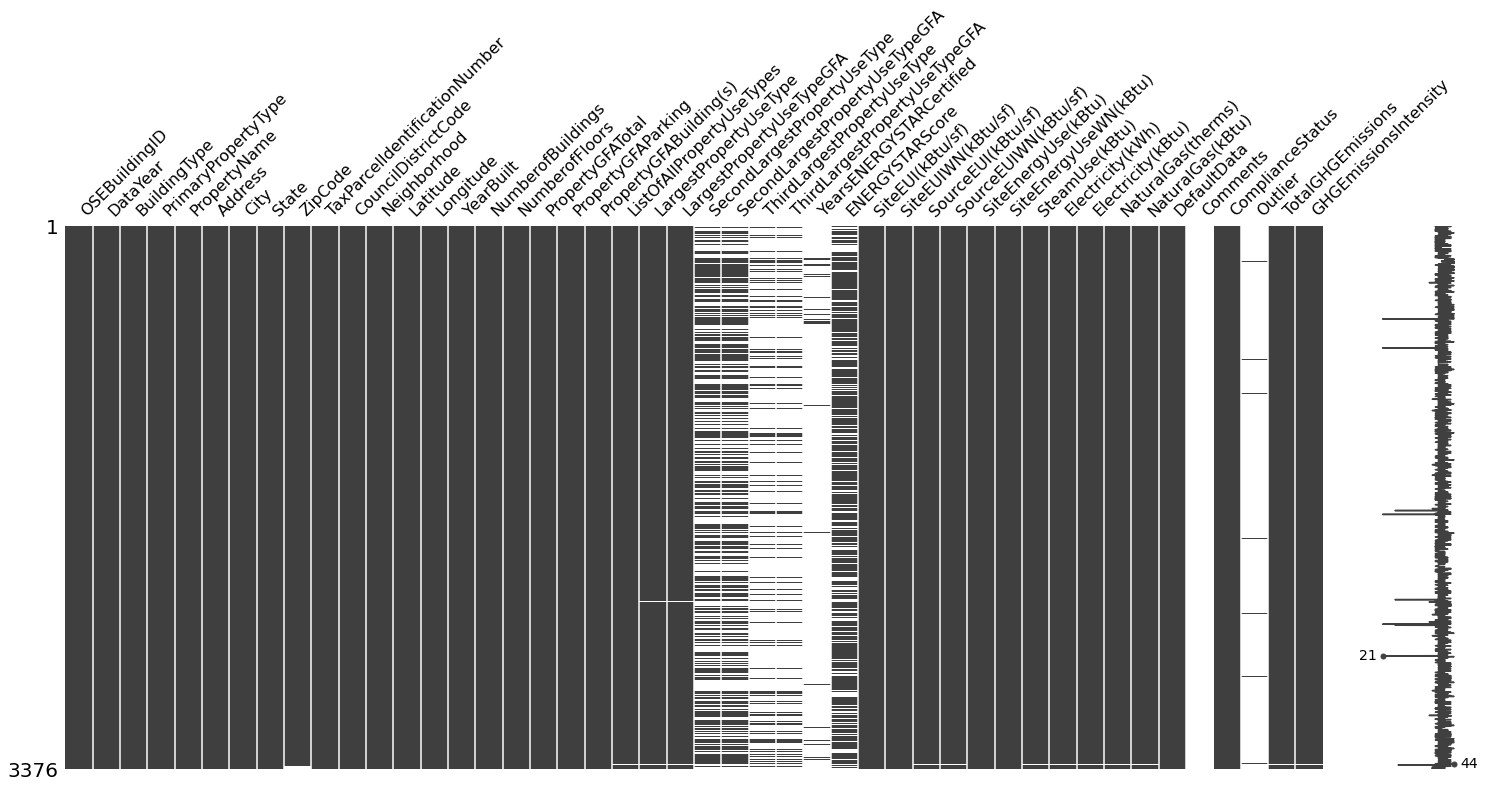

In [6]:
msno.matrix(building)
#La base est trés bien renseignés 
# La plupart des données manquantes concernent les catégories 2eme et 3eme usages des immeubles qui peuvent ne pas exister
# Les données EnergyStar ne sont pas disponibles pour tous les immeubles (ce n'est pas forcement une anomalie)

Affichage des classes pour les variables catégorielles 

In [7]:
building['BuildingType'].unique() #les classes de BuildingType

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [8]:
building["PrimaryPropertyType"].unique() #Les classes de "PrimaryPropertyTypes"

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [9]:
building["Neighborhood"].unique() 

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [10]:
building['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indust

In [11]:
building['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Laboratory', 'Refrigerated Warehouse',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Movie Theater', 'Supermarket/Grocery Store', 'Medical Office',
       'Other - Recreation', 'Convenience Store without Gas Station',
       'Performing Arts', 'College/University', 'Other - Restaurant/Bar',
       'Adult Education', 'Enclosed Mall', 'Multifamily Housing',
       'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Branch', 'Food Service', 'Worship Facility',


In [12]:
building['ThirdLargestPropertyUseType'].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly',
       'Non-Refrigerated Warehouse', 'Other', 'Distribution Center',
       'Food Service', 'Other - Services', 'Medical Office', 'Parking',
       'Other - Utility', 'Other - Lodging/Residential', 'K-12 School',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Pre-school/Daycare', 'Convenience Store without Gas Station',
       'Financial Office', 'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Recreation', 'Self-Storage Facility',
       'Other - Technology/Science', 'Refrigerated Warehouse',
       'Fast Food Restaurant', 'Bar/Nightclub',
       'Manufacturing/Industrial Plant', 'Food Sales',
       'Supermarket/Grocery Store', 'Other/Specialty Hospital',
       'Worship Facility', 'Stri

In [13]:
building['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [14]:
building['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

Cohérence entre les infos BuildingType Non résidentiel et les l'information Primary Property Type puis suppression des anomalies

In [15]:
building[(building['BuildingType']=="NonResidential" )|
         (building['BuildingType']=="Nonresidential COS") |
         (building['BuildingType']=="Nonresidential WA") | (building['BuildingType']=="Campus")|
         (building['BuildingType']=="SPS-District K-12")][['BuildingType',
        'PrimaryPropertyType']].groupby('PrimaryPropertyType').value_counts()

PrimaryPropertyType  BuildingType      
Distribution Center  NonResidential        51
                     Nonresidential COS     2
                                           ..
Warehouse            Nonresidential COS     7
Worship Facility     NonResidential        71
Length: 39, dtype: int64

In [16]:
# #nous avons des BulldingType Non Residential ou Campus  avec un PrimaryPropertyType Low Rise Family
#pour 3 enregistrements ce qui est contradictoire 

In [17]:
building.loc[((building['BuildingType']=="NonResidential" )| (building['BuildingType']=="Nonresidential COS") |
              ( building['BuildingType']=="Nonresidential WA") | (building['BuildingType']=="Campus") | 
              (building['BuildingType']=="SPS-District K-12"))& (building['PrimaryPropertyType'] 
                                                                 == "Low-Rise Multifamily") ]

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
644           19445      2016  NonResidential  Low-Rise Multifamily   
1300          21481      2016          Campus  Low-Rise Multifamily   
2450          25674      2016  NonResidential  Low-Rise Multifamily   

                PropertyName             Address     City State  ZipCode  \
644           Pacific Pointe  2108 N Pacific St.  Seattle    WA  98103.0   
1300         Sanitary Market   1525 FIrst Avenue  Seattle    WA  98101.0   
2450  (ID25674) COMET TAVERN       916 E PIKE ST  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
644                     0354000254  ...      5.111956e+05         1744199.0   
1300                    1976200210  ...      1.107372e+06         3778355.0   
2450                    6003500480  ...      3.332500e+03           11370.0   

      NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
644          2529.819824          252982.0        False       NaN   
1300            0.000000               0.0        False       NaN   
2450          968.300171           96830.0        False       NaN   

      ComplianceStatus      Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
644          Compliant          NaN              25.60                   0.28  
1300         Compliant          NaN              26.34                   0.58  
2450     Non-Compliant  Low outlier               5.22                   0.16  

[3 rows x 46 columns]

In [18]:
row_to_change = building.loc[((building['BuildingType']=="NonResidential" )| 
                              (building['BuildingType']=="Nonresidential COS") |
                              ( building['BuildingType']=="Nonresidential WA") |
                              (building['BuildingType']=="Campus") | 
                              (building['BuildingType']=="SPS-District K-12"))& 
                             (building['PrimaryPropertyType'] == "Low-Rise Multifamily") ].index.tolist() 
#correction du buildingtype pour les 3 anomalies  

In [19]:
building.loc[row_to_change,'PrimaryPropertyType'] = "Mixed Use Property" 
##correction du PrimaryPropertyType pour les 3 anomalies  

création nouvelle base regroupant uniquement les batiments non résidentiel 

In [20]:
buildingnr = building[((building['BuildingType']=="NonResidential" )|
                       (building['BuildingType']=="Nonresidential COS") | 
                       (building['BuildingType']=="Nonresidential WA") |
                       (building['BuildingType']=="Campus")| (building['BuildingType']=="SPS-District K-12"))]

In [21]:
#Nous retenons uniquement les building non résidentiel en retenant les enregistrements Non Residential Campus 
# et  SPS- District K-12 ( école)  dans Builiding Type

In [22]:
buildingnr.shape

(1668, 46)

Suppression des enregistrement ou les cibles ne sont pas renseignées 

In [23]:
buildingnr.describe(include = 'all')

OSEBuildingID  DataYear BuildingType PrimaryPropertyType PropertyName  \
count         1668.00    1668.0         1668                1668         1668   
unique            NaN       NaN            5                  21         1664   
...               ...       ...          ...                 ...          ...   
75%          24602.25    2016.0          NaN                 NaN          NaN   
max          50226.00    2016.0          NaN                 NaN          NaN   

       Address  City State  ZipCode TaxParcelIdentificationNumber  ...  \
count     1668  1668  1668   1652.0                          1668  ...   
unique    1647     1     1      NaN                          1587  ...   
...        ...   ...   ...      ...                           ...  ...   
75%        NaN   NaN   NaN  98125.0                           NaN  ...   
max        NaN   NaN   NaN  98199.0                           NaN  ...   

        Electricity(kWh) Electricity(kBtu)  NaturalGas(therms)  \
count       1.666000e+03      1.666000e+03        1.666000e+03   
unique               NaN               NaN                 NaN   
...                  ...               ...                 ...   
75%         1.420747e+06      4.847589e+06        1.520000e+04   
max         1.925775e+08      6.570744e+08        2.979090e+06   

        NaturalGas(kBtu)  DefaultData  Comments  ComplianceStatus  Outlier  \
count       1.666000e+03         1668       0.0              1668       17   
unique               NaN            2       NaN                 4        2   
...                  ...          ...       ...               ...      ...   
75%         1.520000e+06          NaN       NaN               NaN      NaN   
max         2.979090e+08          NaN       NaN               NaN      NaN   

        TotalGHGEmissions  GHGEmissionsIntensity  
count           1666.0000                1666.00  
unique                NaN                    NaN  
...                   ...                    ...  
75%              142.3825                   1.89  
max            16870.9800                  34.09  

[11 rows x 46 columns]

Analyse Cohérence entre information BuildingType et LargestPropertyUseType et correction des anomalies

In [24]:
buildingnr[['BuildingType',
            'LargestPropertyUseType']].groupby('LargestPropertyUseType').value_counts().sort_values(ascending = False )

LargestPropertyUseType      BuildingType  
Office                      NonResidential    482
Non-Refrigerated Warehouse  NonResidential    192
                                             ... 
Parking                     Campus              1
Adult Education             NonResidential      1
Length: 82, dtype: int64

In [25]:
buildingnr[ (buildingnr['LargestPropertyUseType'] == "Multifamily Housing" ) ]
#les largest property type Multifamily housing correspondent à des primaryPropertyType Mixes Use :
#On considere que les Mixe Use sont non résidentiel

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
164             264      2016  NonResidential  Mixed Use Property   
644           19445      2016  NonResidential  Mixed Use Property   
...             ...       ...             ...                 ...   
3041          27969      2016  NonResidential  Mixed Use Property   
3087          29170      2016  NonResidential  Mixed Use Property   

                           PropertyName                          Address  \
164                             TriBeCa                    516 1st Ave W   
644                      Pacific Pointe               2108 N Pacific St.   
...                                 ...                              ...   
3041         1700 Madison Apts. Bldg. 2                1700 E Madison St   
3087  Chief Seattle Club/Monterey Lofts  410 2nd Avenue Extenstion South   

         City State  ZipCode TaxParcelIdentificationNumber  ...  \
164   Seattle    WA  98119.0                    8681450000  ...   
644   Seattle    WA  98103.0                    0354000254  ...   
...       ...   ...      ...                           ...  ...   
3041  Seattle    WA  98122.0                    7234601100  ...   
3087  Seattle    WA  98104.0                    1562700010  ...   

      Electricity(kWh) Electricity(kBtu)  NaturalGas(therms)  \
164       2.971734e+06        10139555.0         4183.540039   
644       5.111956e+05         1744199.0         2529.819824   
...                ...               ...                 ...   
3041      2.994591e+05         1021754.0            0.000000   
3087      2.879470e+05          982475.0         8019.099609   

      NaturalGas(kBtu)  DefaultData  Comments  ComplianceStatus  Outlier  \
164           418354.0        False       NaN         Compliant      NaN   
644           252982.0        False       NaN         Compliant      NaN   
...                ...          ...       ...               ...      ...   
3041               0.0        False       NaN         Compliant      NaN   
3087          801910.0        False       NaN         Compliant      NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  
164               92.91                   0.84  
644               25.60                   0.28  
...                 ...                    ...  
3041               7.12                   0.07  
3087              49.44                   2.23  

[12 rows x 46 columns]

Suppression des enregistrements où les cibles ne sont pas renseignées

In [26]:
row_to_drop= building[building['SiteEUI(kBtu/sf)']==0].index.tolist()
temp = building.drop(index = row_to_drop)
building= temp 
row_to_drop= building[building['TotalGHGEmissions']==0].index.tolist()
temp = building.drop(index = row_to_drop)
building= temp 

Correction des nombre de batiment à 0 

In [27]:
buildingnr[buildingnr['NumberofBuildings'] == 0 ].describe(include = 'all').transpose() 
# le NumberOFBuildings est nul mais les autres informations semblent correctes 

row_to_change  = buildingnr[buildingnr['NumberofBuildings'] == 0 ].index.tolist()
buildingnr.loc[row_to_change,'NumberofBuildings'] = 1

Analyses consommation d'énergie et intensité consommation énergie par usage

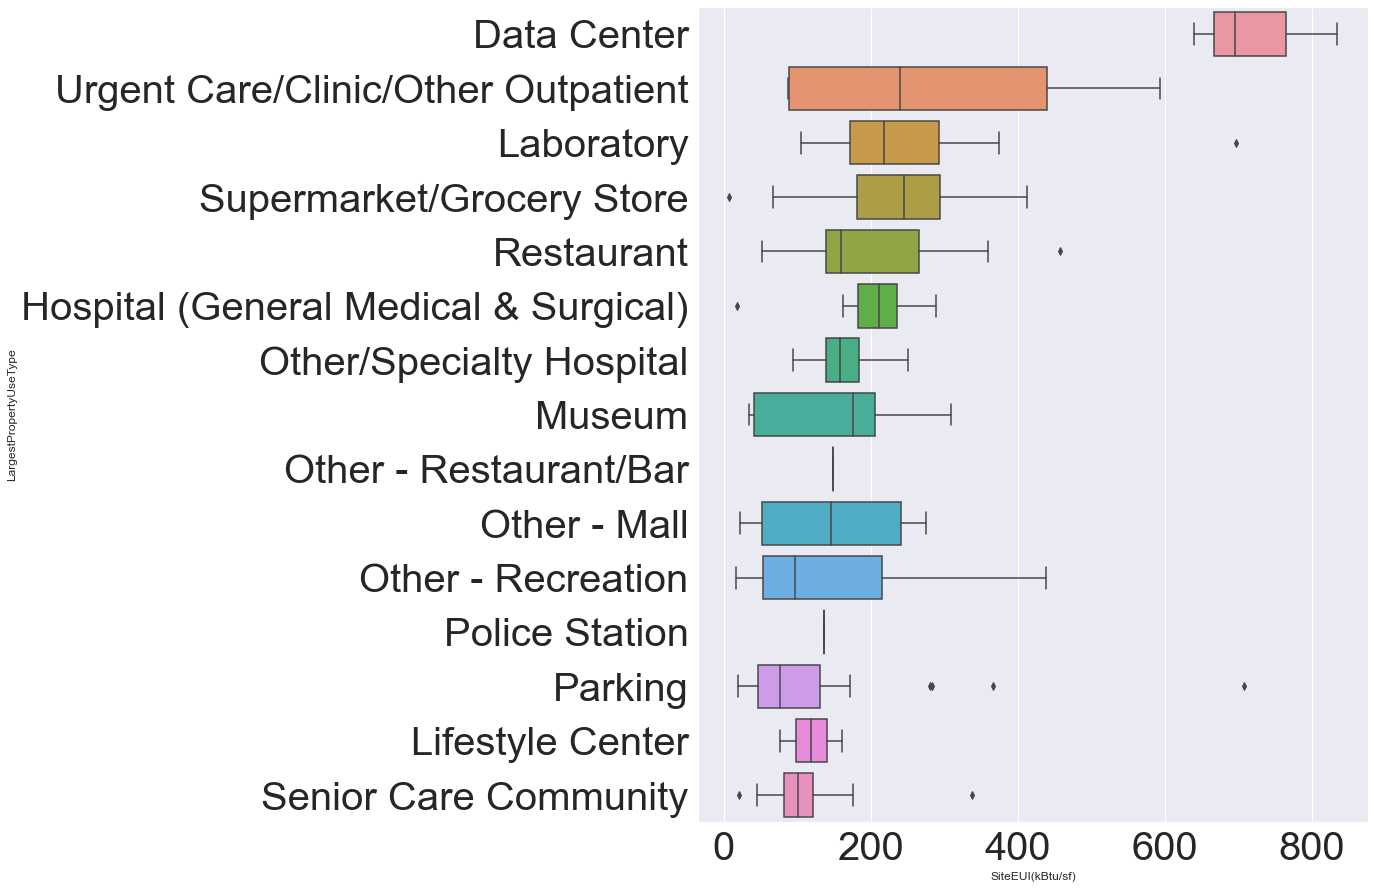

In [28]:
ordermeaneui = buildingnr.groupby('LargestPropertyUseType')["SiteEUI(kBtu/sf)"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=28)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=40)
box_plot = sns.boxplot(y='LargestPropertyUseType' , x="SiteEUI(kBtu/sf)", data = buildingnr, orient = 'h', 
                       order= ordermeaneui[0:15],)

In [29]:
# Les Data center suivi par les cliniques/ centre de soin , les laboratoires et les magasins ont les consommation moyenne par M2 les plus importantes 

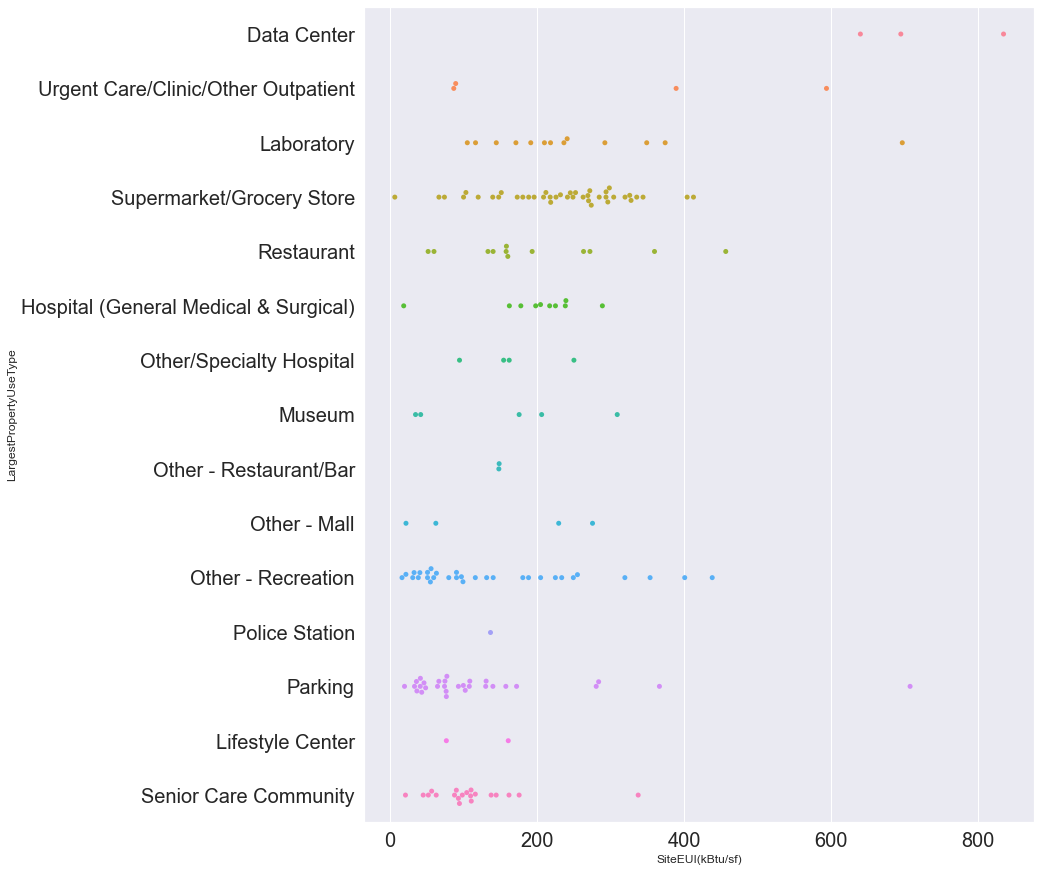

In [30]:
#test dataviz swarm_plot
ordermeaneui = buildingnr.groupby('LargestPropertyUseType')["SiteEUI(kBtu/sf)"].mean().sort_values(ascending = False).index.tolist()
    
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20) 

swarm_plot= sns.swarmplot(y='LargestPropertyUseType' , x="SiteEUI(kBtu/sf)", data = buildingnr, orient = 'h', 
                          order= ordermeaneui[0:15])

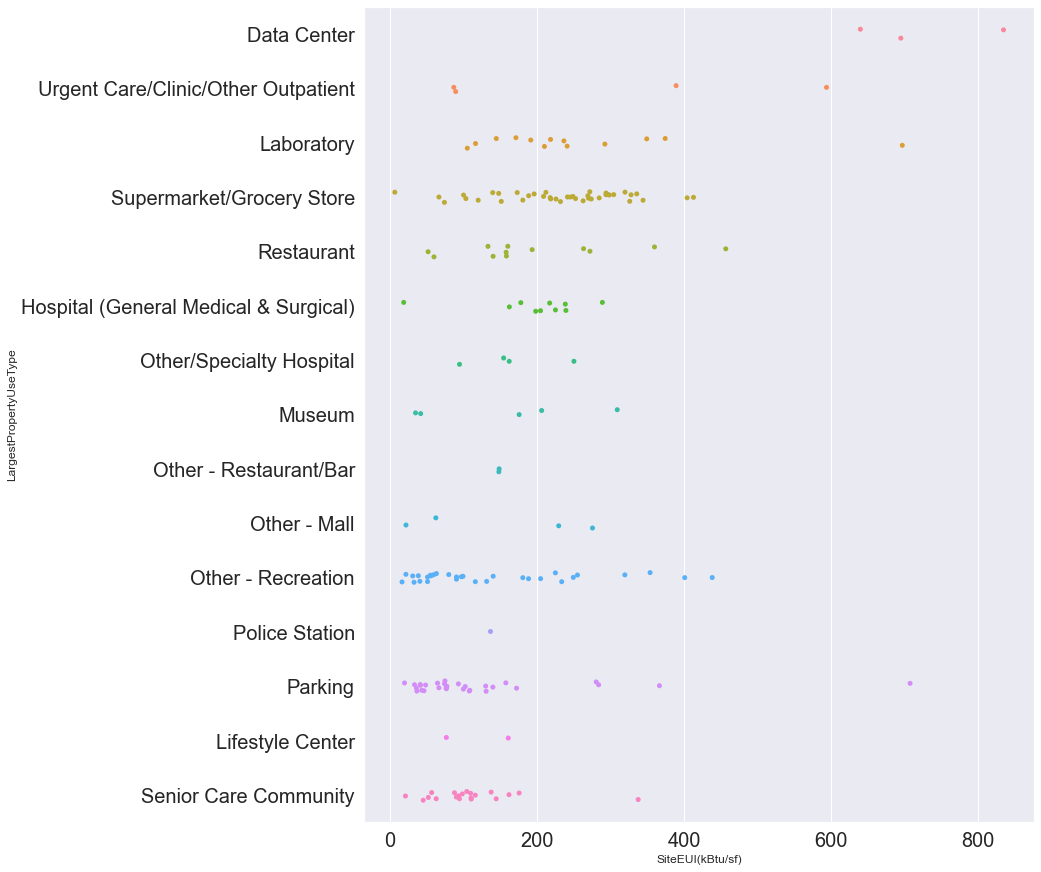

In [31]:
#test dataviz stripplot
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20) 
plot= sns.stripplot(y='LargestPropertyUseType' , x="SiteEUI(kBtu/sf)", data = buildingnr, orient = 'h', 
                    order= ordermeaneui[0:15])

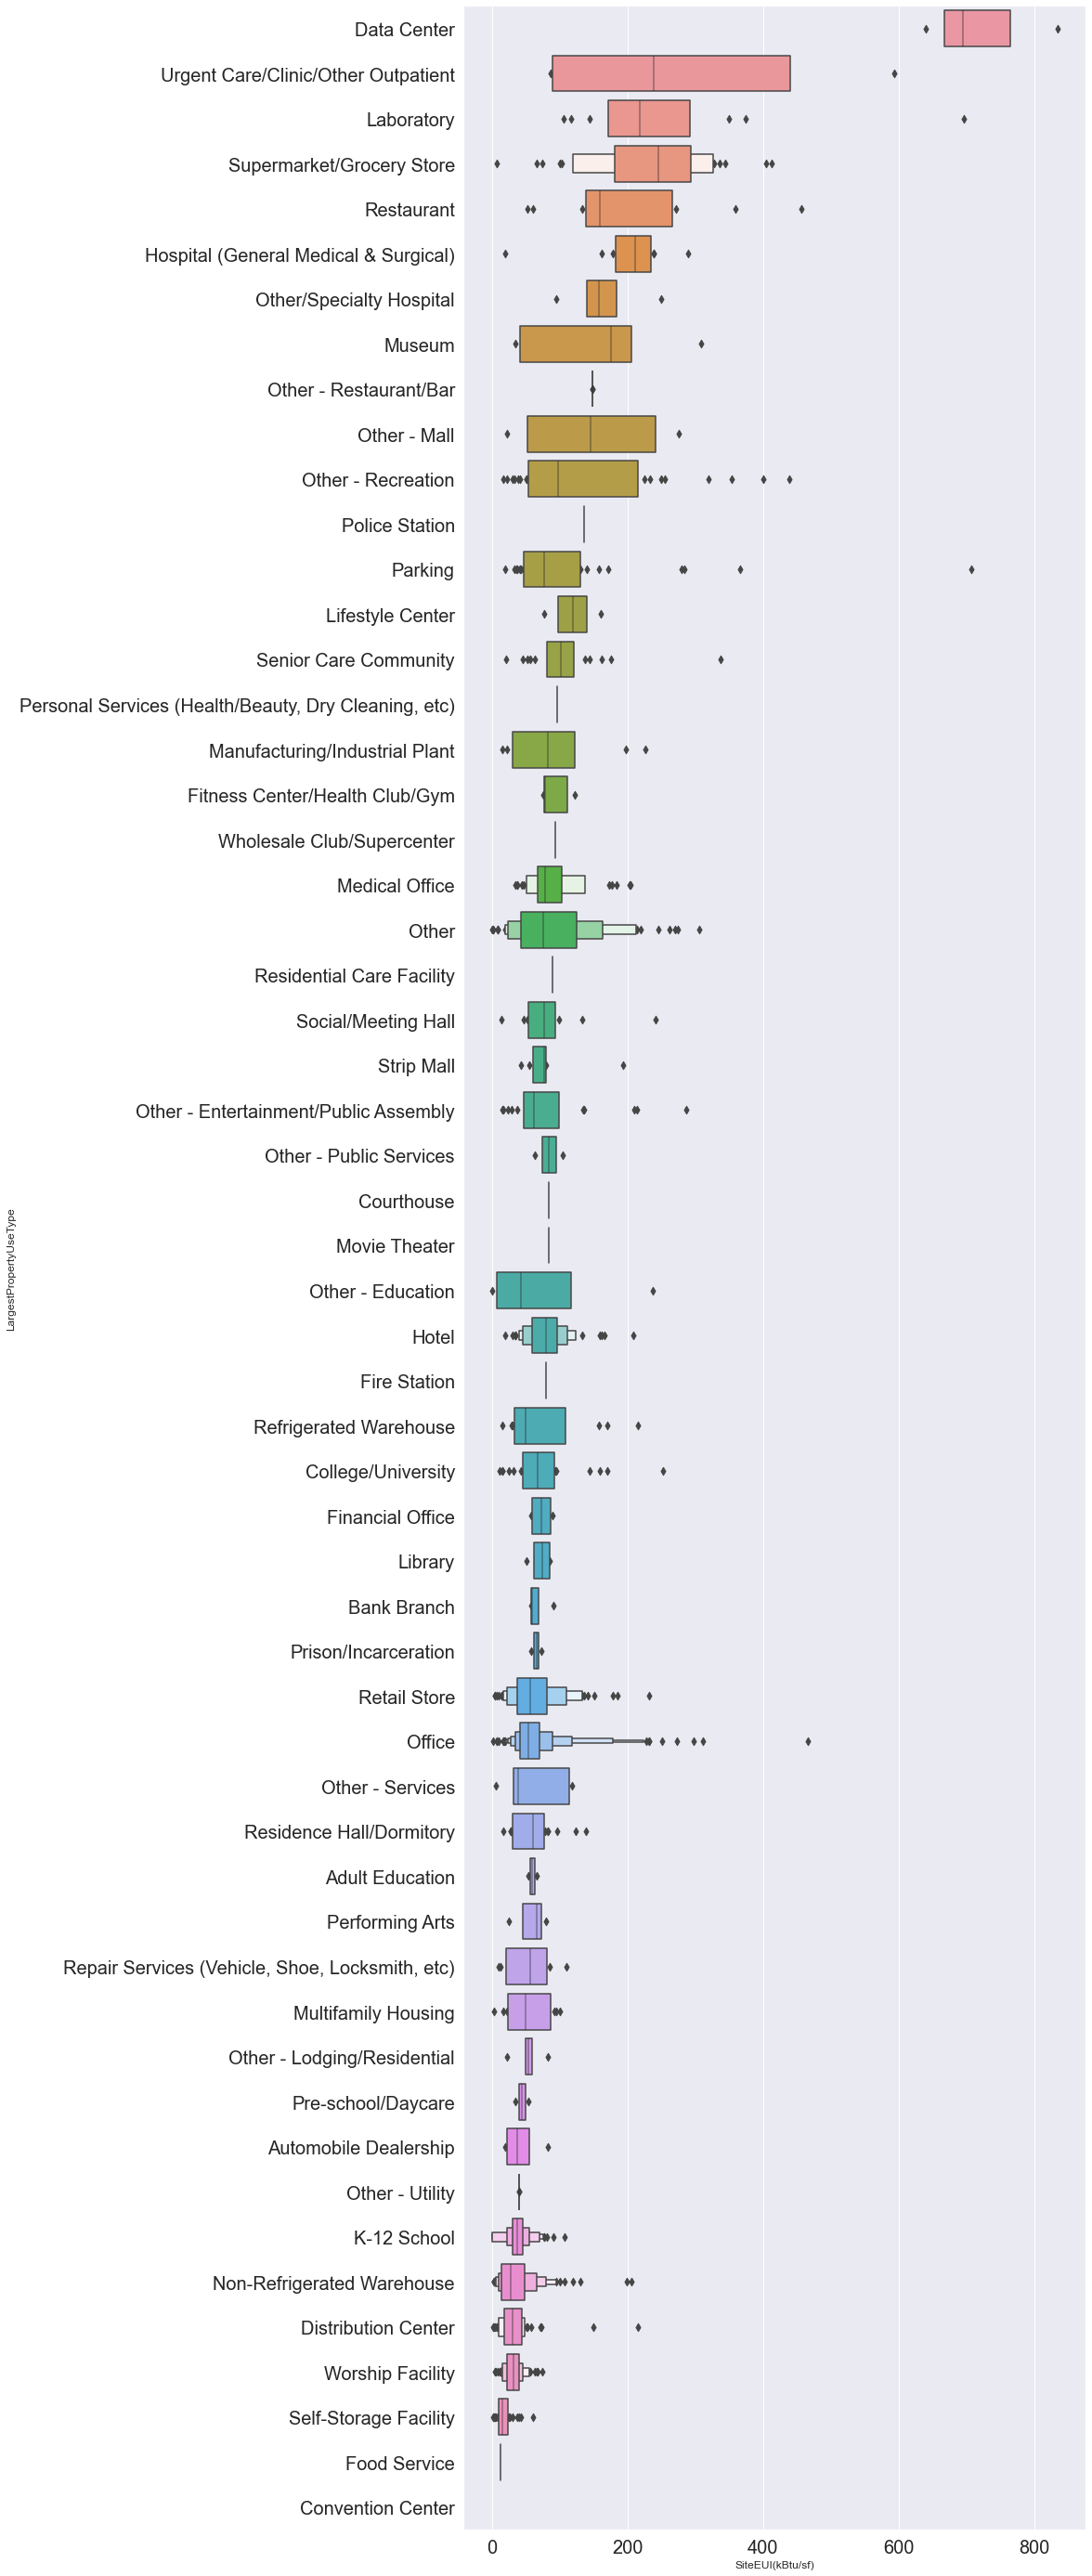

In [32]:
#test dataviz boxenplot
ordermeaneui = buildingnr.groupby('LargestPropertyUseType')["SiteEUI(kBtu/sf)"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14) 
sns.set(rc={"figure.figsize":(12, 50)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
boxen_plot = sns.boxenplot(y='LargestPropertyUseType' , x="SiteEUI(kBtu/sf)", data = buildingnr, orient = 'h', 
                           order= ordermeaneui)

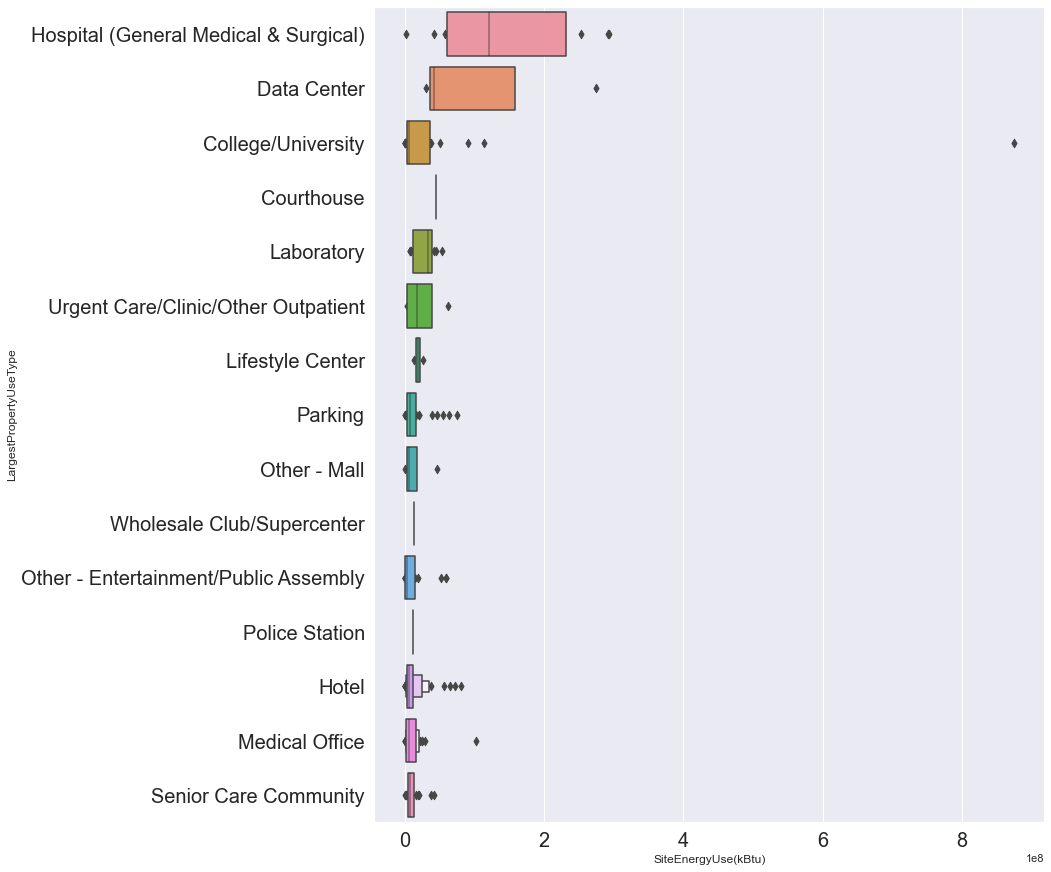

In [33]:
ordermean = buildingnr.groupby('LargestPropertyUseType')["SiteEnergyUse(kBtu)"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14) 
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
boxen_plot = sns.boxenplot(y='LargestPropertyUseType' , x="SiteEnergyUse(kBtu)", data = buildingnr, orient = 'h', 
                           order= ordermean[0:15])

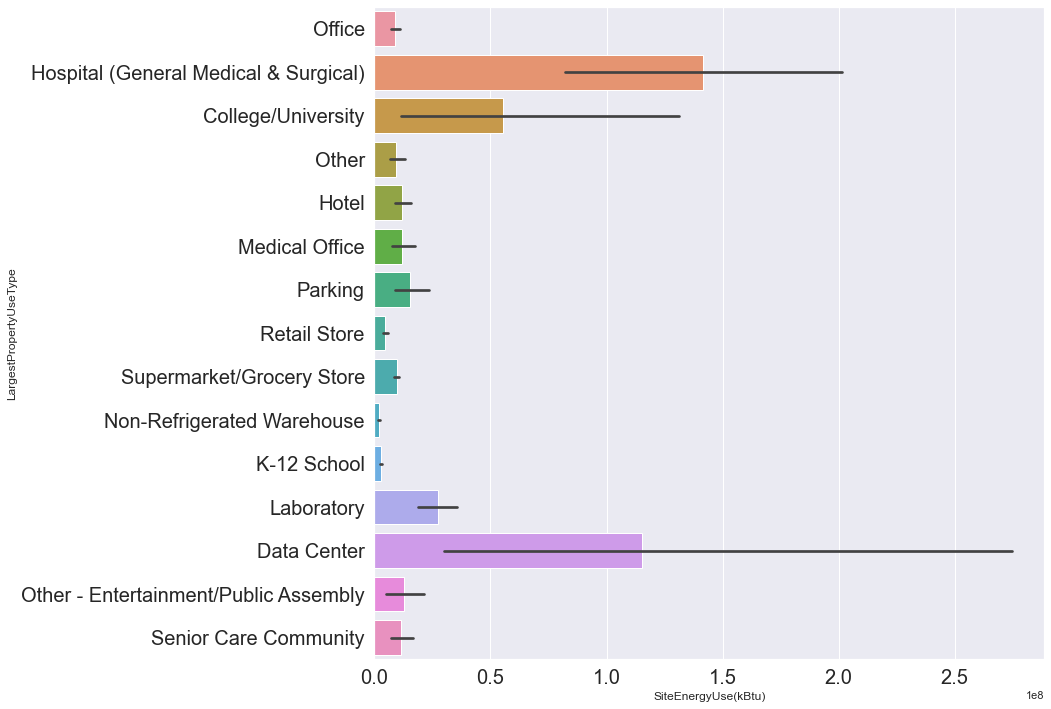

In [34]:

orderplot = buildingnr.groupby('LargestPropertyUseType')["SiteEnergyUse(kBtu)"].sum().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 12)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
plot = sns.barplot(y="LargestPropertyUseType", x= 'SiteEnergyUse(kBtu)', data = buildingnr, orient = "h", 
                   order = orderplot[0:15])

Analyse consommation par SF en fonction du Second Largest Property Use / moins significatif

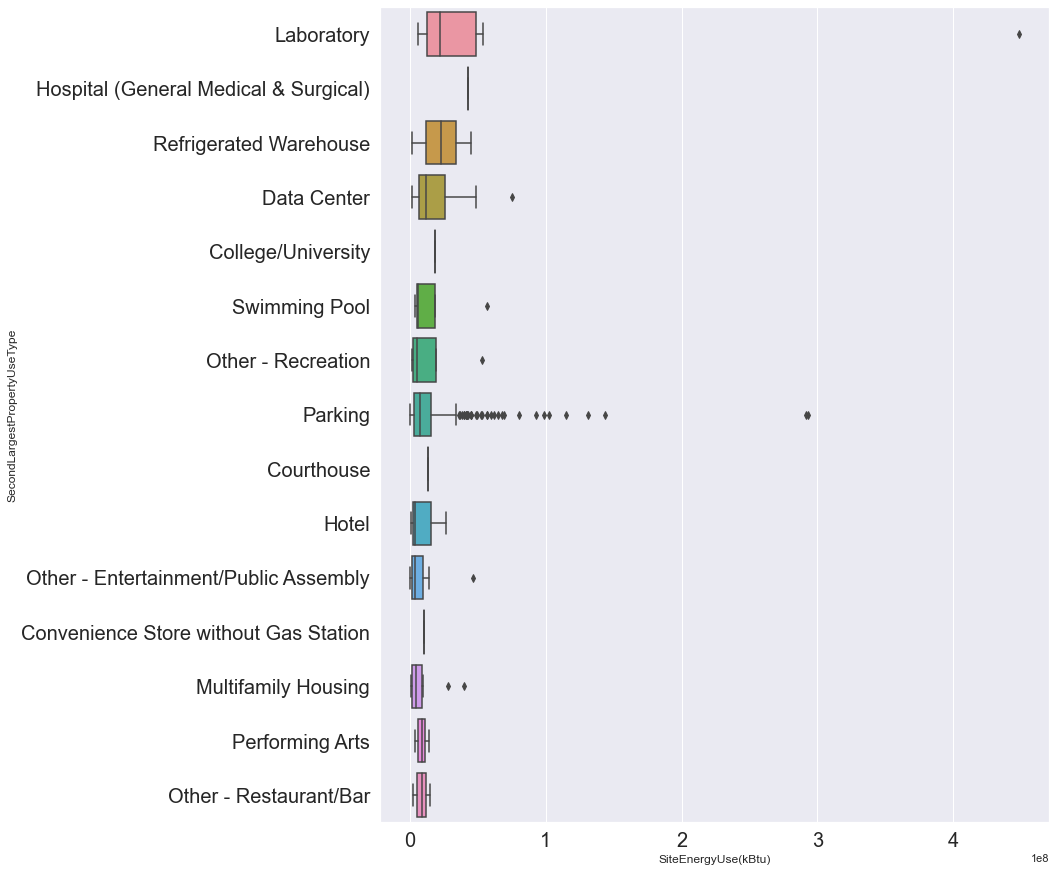

In [35]:
ordermean = buildingnr.groupby('SecondLargestPropertyUseType')["SiteEnergyUse(kBtu)"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxplot(y='SecondLargestPropertyUseType' , x="SiteEnergyUse(kBtu)", data = buildingnr, orient = 'h', 
                       order=ordermean[0:15])

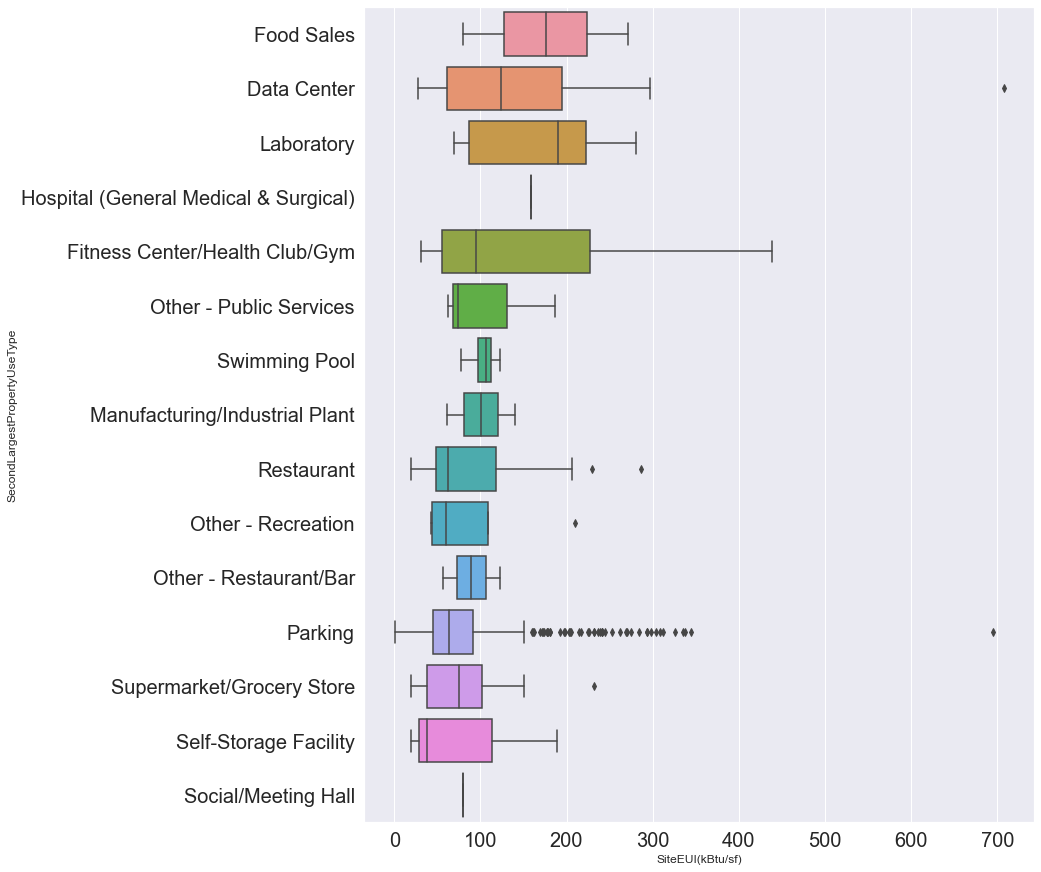

In [36]:
ordermean = buildingnr.groupby('SecondLargestPropertyUseType')["SiteEUI(kBtu/sf)"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxplot(y='SecondLargestPropertyUseType' , x="SiteEUI(kBtu/sf)",
                       data = buildingnr, orient = 'h', order=ordermean[0:15])

Analyse Surface par catégorie d'usage (Largest / 2 /3 ) 

In [37]:
temp = buildingnr[["LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
                   "ThirdLargestPropertyUseTypeGFA"]].fillna(value = 0 )

buildingnr[["LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA"]] = temp

In [38]:
buildingnr['usetype_sumSF']= buildingnr['LargestPropertyUseTypeGFA']+buildingnr['SecondLargestPropertyUseTypeGFA']
+buildingnr['ThirdLargestPropertyUseTypeGFA']
#calcul  usetype_sumSF :  la somme des surfaces utilisés par les 3 principaux usages 
#( aprés remplaecment des NAN par des 0) 

0          0.0
1       4622.0
         ...  
3374     484.0
3375    1108.0
Name: ThirdLargestPropertyUseTypeGFA, Length: 1668, dtype: float64

In [39]:
buildingnr[['usetype_sumSF',"LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
            "ThirdLargestPropertyUseTypeGFA"]]


usetype_sumSF  LargestPropertyUseTypeGFA  \
0           88434.0                    88434.0   
1           98944.0                    83880.0   
...             ...                        ...   
3374        13102.0                     6601.0   
3375        16271.0                     8271.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
0                                 0.0                             0.0  
1                             15064.0                          4622.0  
...                               ...                             ...  
3374                           6501.0                           484.0  
3375                           8000.0                          1108.0  

[1668 rows x 4 columns]

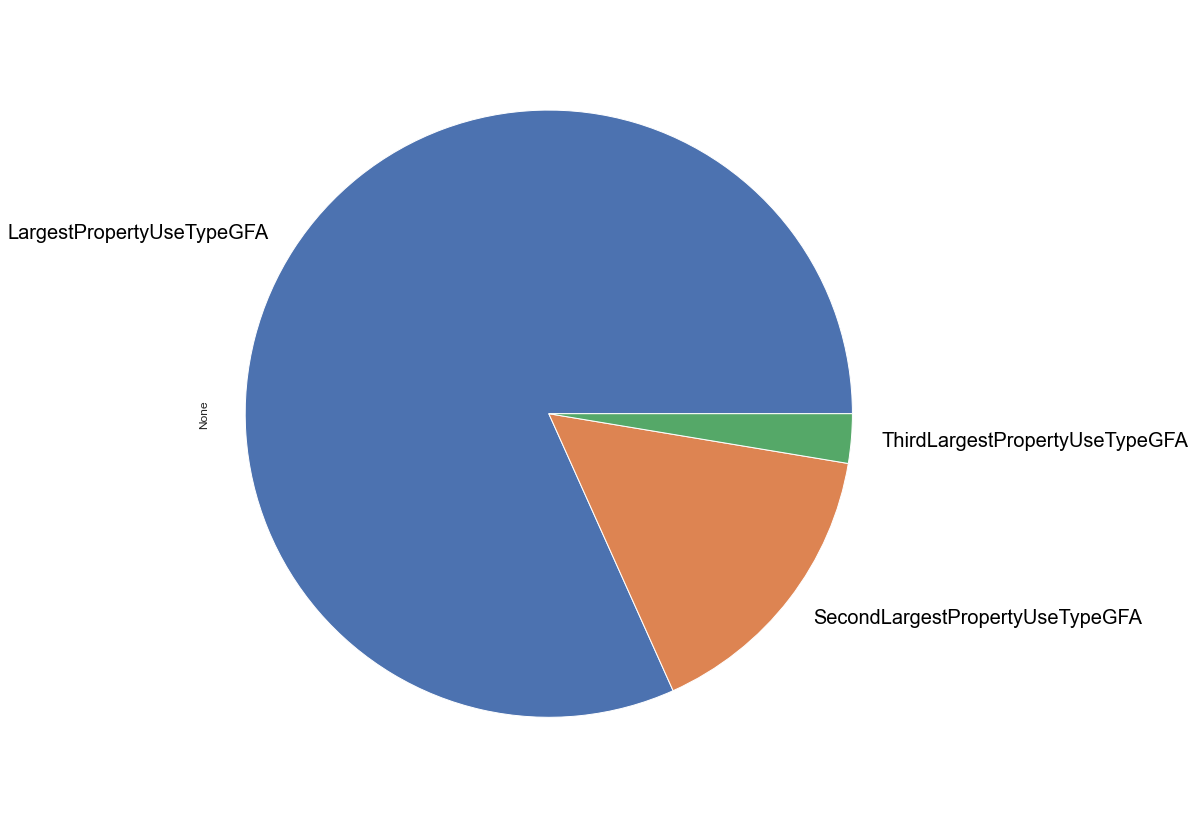

In [40]:
buildingnr[["LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
            "ThirdLargestPropertyUseTypeGFA"]].sum().plot(kind='pie', textprops = {'color': 'Black','fontsize':20})
plt.axis('equal') 
plt.show() # Affiche le graphique


In [41]:
buildingnr[["LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
            "ThirdLargestPropertyUseTypeGFA"]].sum()/buildingnr[["LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
                                                                 "ThirdLargestPropertyUseTypeGFA"]].sum().sum()

LargestPropertyUseTypeGFA          0.817130
SecondLargestPropertyUseTypeGFA    0.156647
ThirdLargestPropertyUseTypeGFA     0.026224
dtype: float64

Vérification cohérence surface par usage vs surface building et surface totale 

In [42]:
buildingnr['verifgfausebuilding']=buildingnr['PropertyGFABuilding(s)']-buildingnr['usetype_sumSF']
buildingnr['verifgfausetotal']=buildingnr['PropertyGFATotal']-buildingnr['usetype_sumSF']
buildingnr[["usetype_sumSF",'PropertyGFABuilding(s)',"PropertyGFATotal", "verifgfausebuilding","verifgfausetotal"]]

usetype_sumSF  PropertyGFABuilding(s)  PropertyGFATotal  \
0           88434.0                   88434             88434   
1           98944.0                   88502            103566   
...             ...                     ...               ...   
3374        13102.0                   14101             14101   
3375        16271.0                   18258             18258   

      verifgfausebuilding  verifgfausetotal  
0                     0.0               0.0  
1                -10442.0            4622.0  
...                   ...               ...  
3374                999.0             999.0  
3375               1987.0            1987.0  

[1668 rows x 5 columns]

In [43]:

buildingnr['verifgfausetotal']=buildingnr['PropertyGFATotal']-buildingnr['usetype_sumSF']
buildingnr[["usetype_sumSF",'PropertyGFABuilding(s)',"PropertyGFATotal", "verifgfausebuilding","verifgfausetotal"]]
# verifgfause somme des surface building moins la somme des surface réparties par usage
# verifgfausetotal somme des surfaces totales  moins la somme des surfaces réparties par usage

usetype_sumSF  PropertyGFABuilding(s)  PropertyGFATotal  \
0           88434.0                   88434             88434   
1           98944.0                   88502            103566   
...             ...                     ...               ...   
3374        13102.0                   14101             14101   
3375        16271.0                   18258             18258   

      verifgfausebuilding  verifgfausetotal  
0                     0.0               0.0  
1                -10442.0            4622.0  
...                   ...               ...  
3374                999.0             999.0  
3375               1987.0            1987.0  

[1668 rows x 5 columns]

In [44]:
buildingnr[["usetype_sumSF",'PropertyGFABuilding(s)',"PropertyGFATotal", "verifgfausebuilding","verifgfausetotal"]].describe().transpose()


count           mean            std       min  \
usetype_sumSF           1668.0  117274.859291  300731.443936       0.0   
PropertyGFABuilding(s)  1668.0  105944.745204  284211.574104    3636.0   
PropertyGFATotal        1668.0  118842.724221  297362.212274   11285.0   
verifgfausebuilding     1668.0  -11330.114087   60818.080929 -902123.0   
verifgfausetotal        1668.0    1567.864930   53213.030284 -902123.0   

                             25%      50%        75%        max  
usetype_sumSF           28846.25  48229.5  103000.00  9320156.0  
PropertyGFABuilding(s)  28475.25  47391.5   94759.75  9320156.0  
PropertyGFATotal        29477.75  49289.5  105325.00  9320156.0  
verifgfausebuilding     -3584.00      0.0     600.25   504405.0  
verifgfausetotal            0.00      0.0    3243.50   706262.0

In [45]:
buildingnr[["usetype_sumSF",'PropertyGFABuilding(s)',"PropertyGFATotal", "verifgfausebuilding","verifgfausetotal"]].sum()
# La somme des surfaces par usage (usetype_sumsSF) est supérieur de 13% à la somme des surfaces de building
# La somme des surface par usage est supérieur de 1% à la sommes des surfaces totales
# on déduit donc que les surfaces totales et non pas uniquement les surfaces de building sont réparties et 
#qu'il existe une surestimation du décompte de l'ordre de 1% 

usetype_sumSF             1.956145e+08
PropertyGFABuilding(s)    1.767158e+08
PropertyGFATotal          1.982297e+08
verifgfausebuilding      -1.889863e+07
verifgfausetotal          2.615199e+06
dtype: float64

<AxesSubplot:xlabel='PropertyGFABuilding(s)', ylabel='usetype_sumSF'>

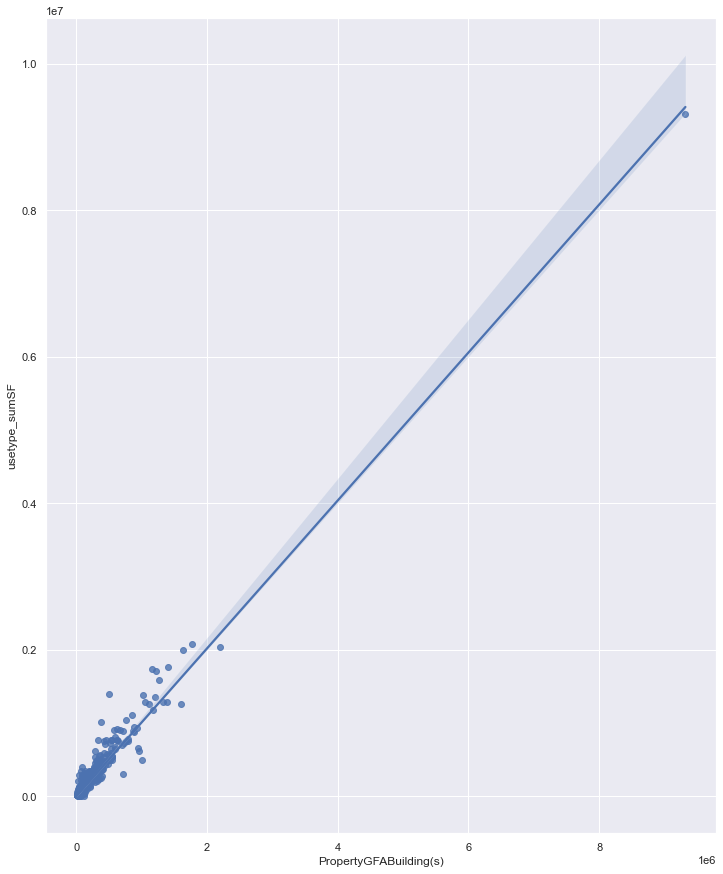

In [46]:
sns.regplot(data = buildingnr,y = "usetype_sumSF", x= 'PropertyGFABuilding(s)', robust = True)

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='usetype_sumSF'>

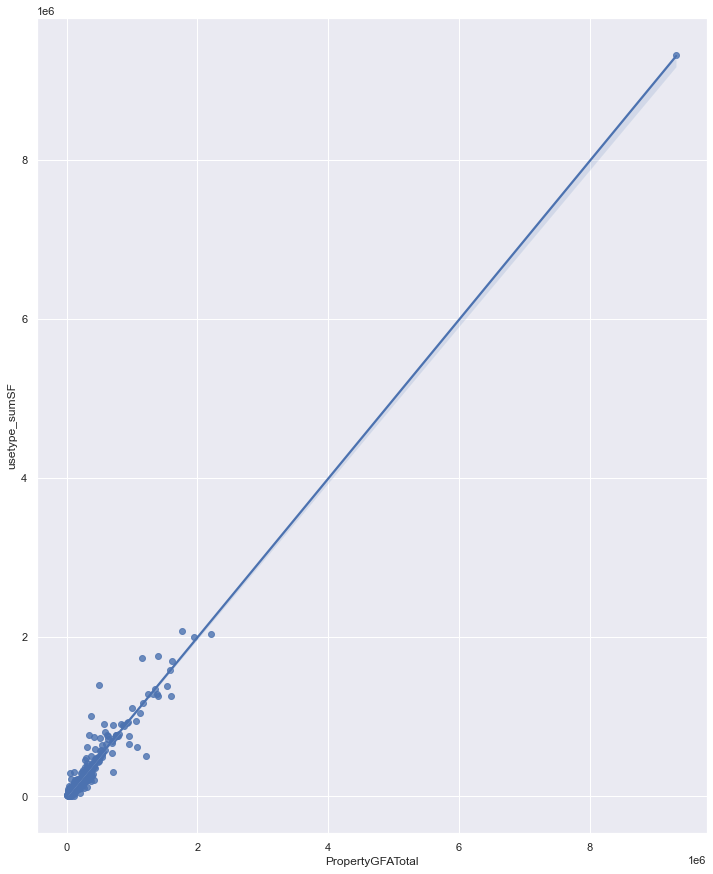

In [47]:
sns.regplot(data = buildingnr,y = "usetype_sumSF", x= 'PropertyGFATotal', robust = True)
# La somme des surfaces par usage est plus corrélé avec le total des surface plutot qu'avec les surfaces 
# de building uniquement

Analyse emission Gaz Effet Serre

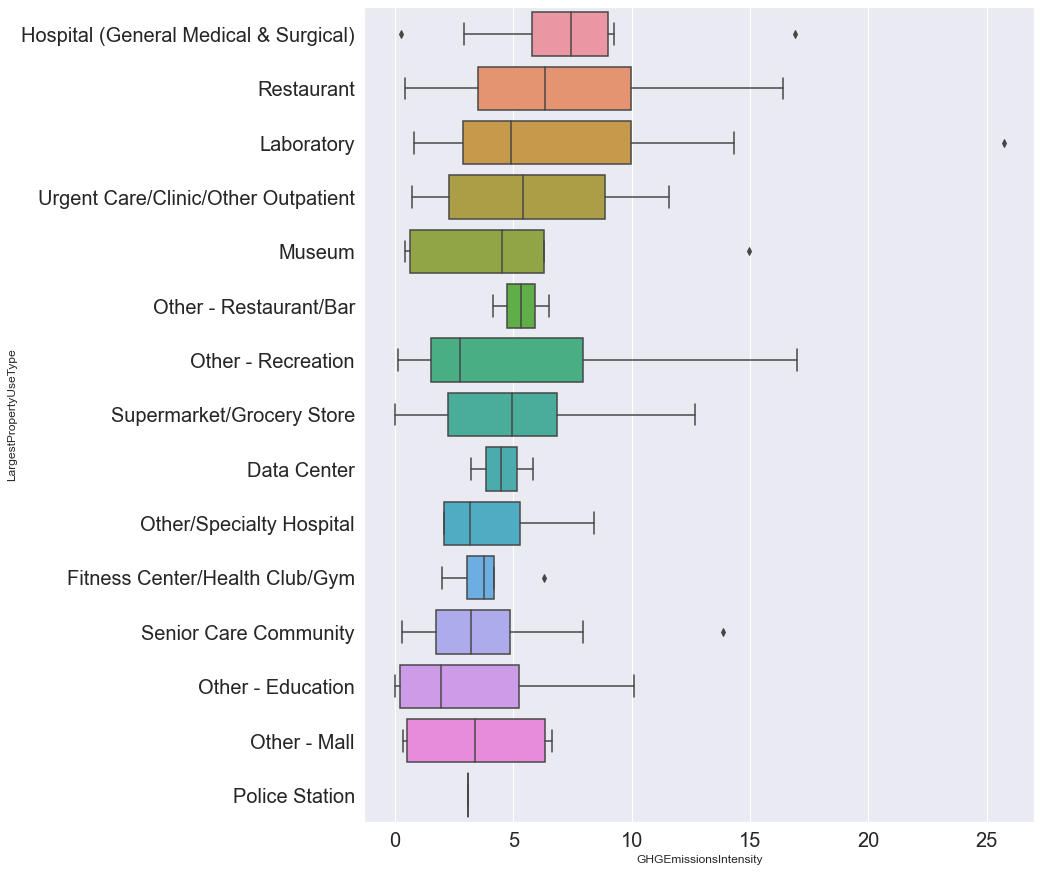

In [48]:
ordermean = buildingnr.groupby('LargestPropertyUseType')["GHGEmissionsIntensity"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxplot(y='LargestPropertyUseType' , x="GHGEmissionsIntensity", data = buildingnr, orient = 'h',
                       order= ordermean[0:15], dodge=False)


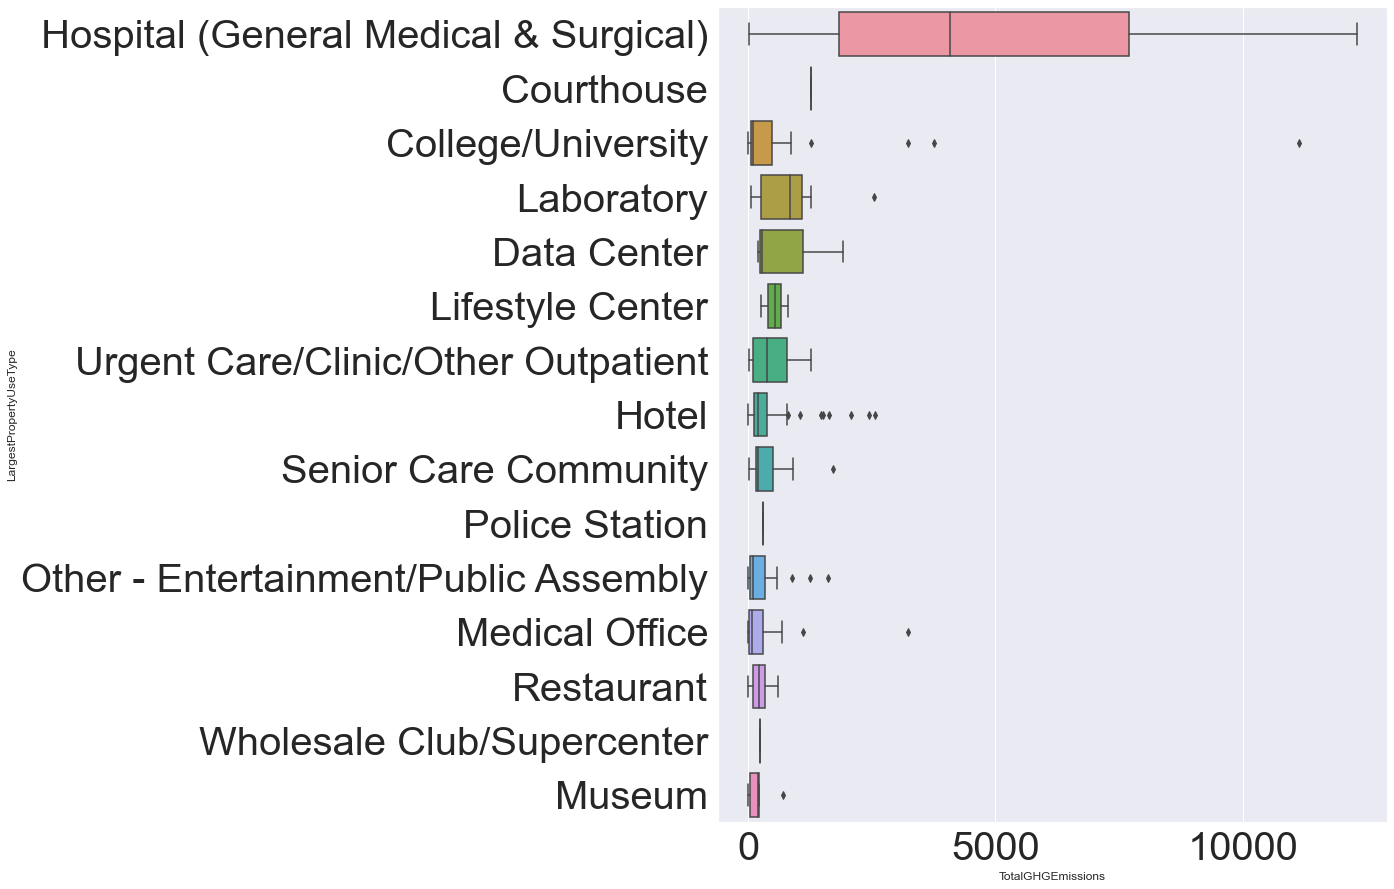

In [49]:
ordermean = buildingnr.groupby('LargestPropertyUseType')["TotalGHGEmissions"].mean().sort_values(ascending = False).index.tolist()
    
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=40)
box_plot = sns.boxplot(y='LargestPropertyUseType' , x="TotalGHGEmissions", data = buildingnr, orient = 'h', 
                       order= ordermean[0:15])


Surface par type d'usage principal

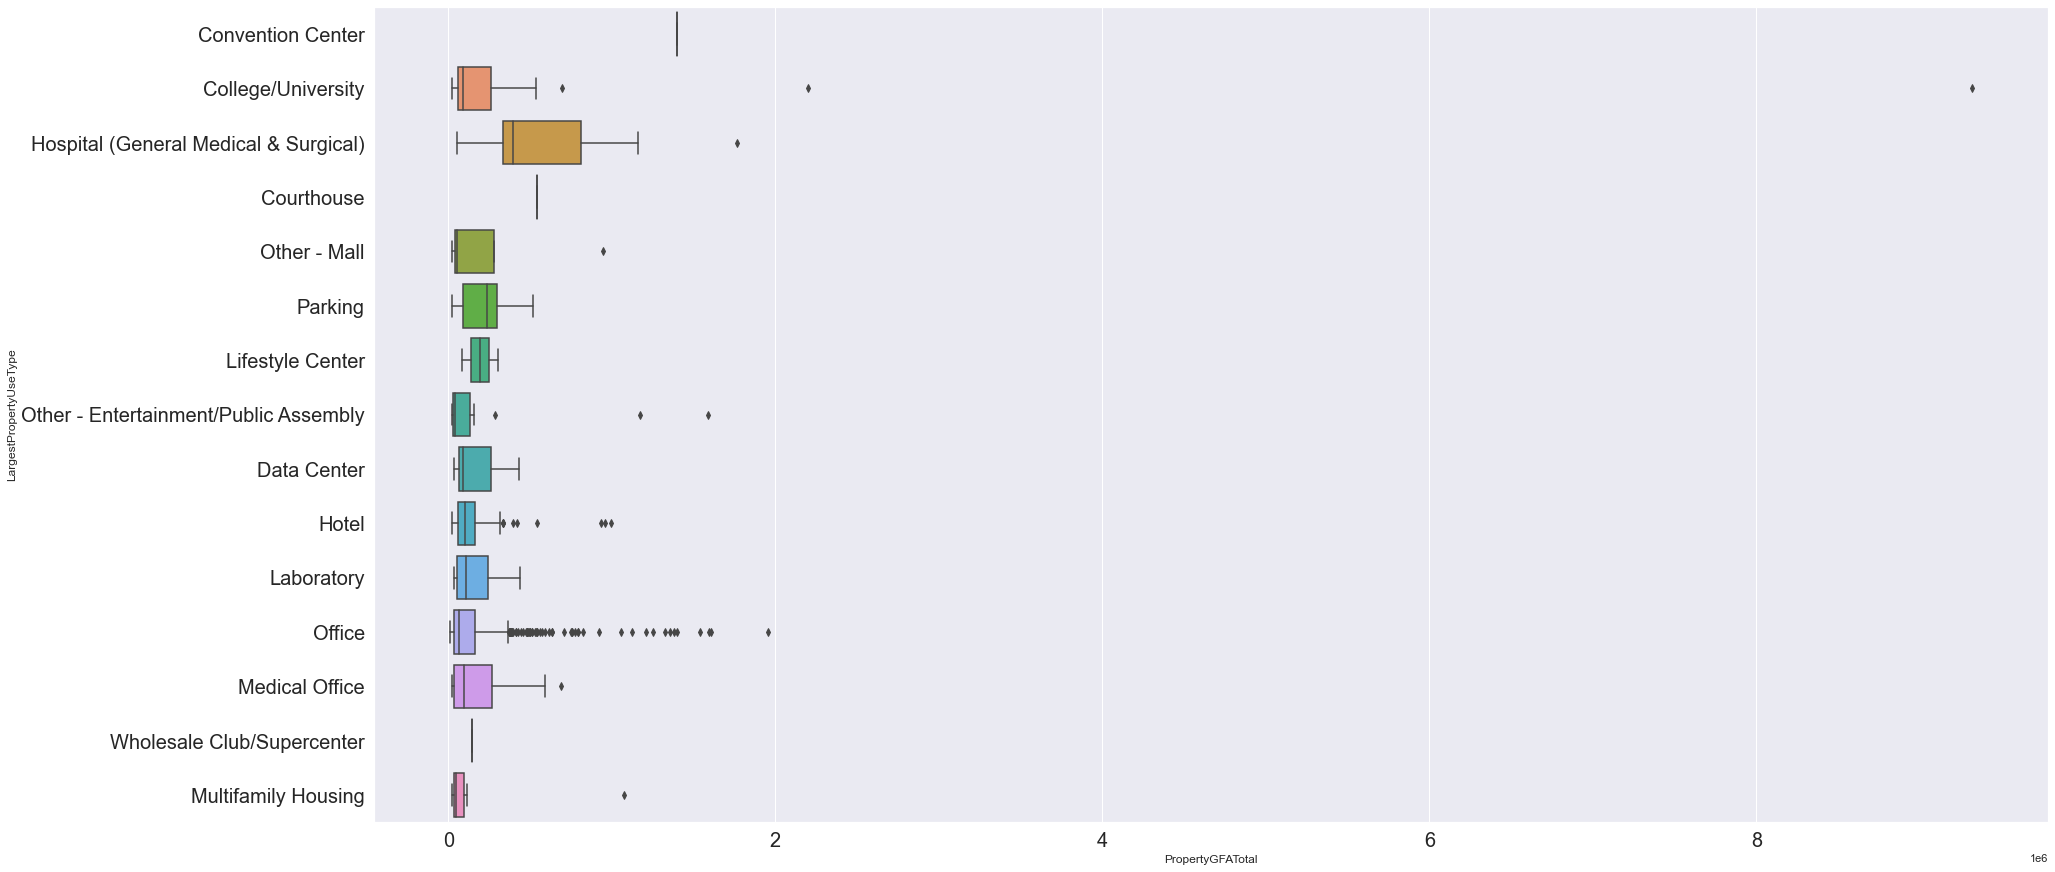

In [50]:
ordermean = buildingnr.groupby('LargestPropertyUseType')["PropertyGFATotal"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(30, 15)}) #width, #heigh
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxplot(y='LargestPropertyUseType' , x="PropertyGFATotal", data = buildingnr, 
                       orient = 'h' , order = ordermean[0:15])

Détermination des usages les plus consommmateurs d'énergie 

In [51]:
base_use_energy= buildingnr.groupby('LargestPropertyUseType', as_index = 
                                    False )[[ "SiteEnergyUse(kBtu)"]].sum().sort_values(by = "SiteEnergyUse(kBtu)" ,ascending = False)

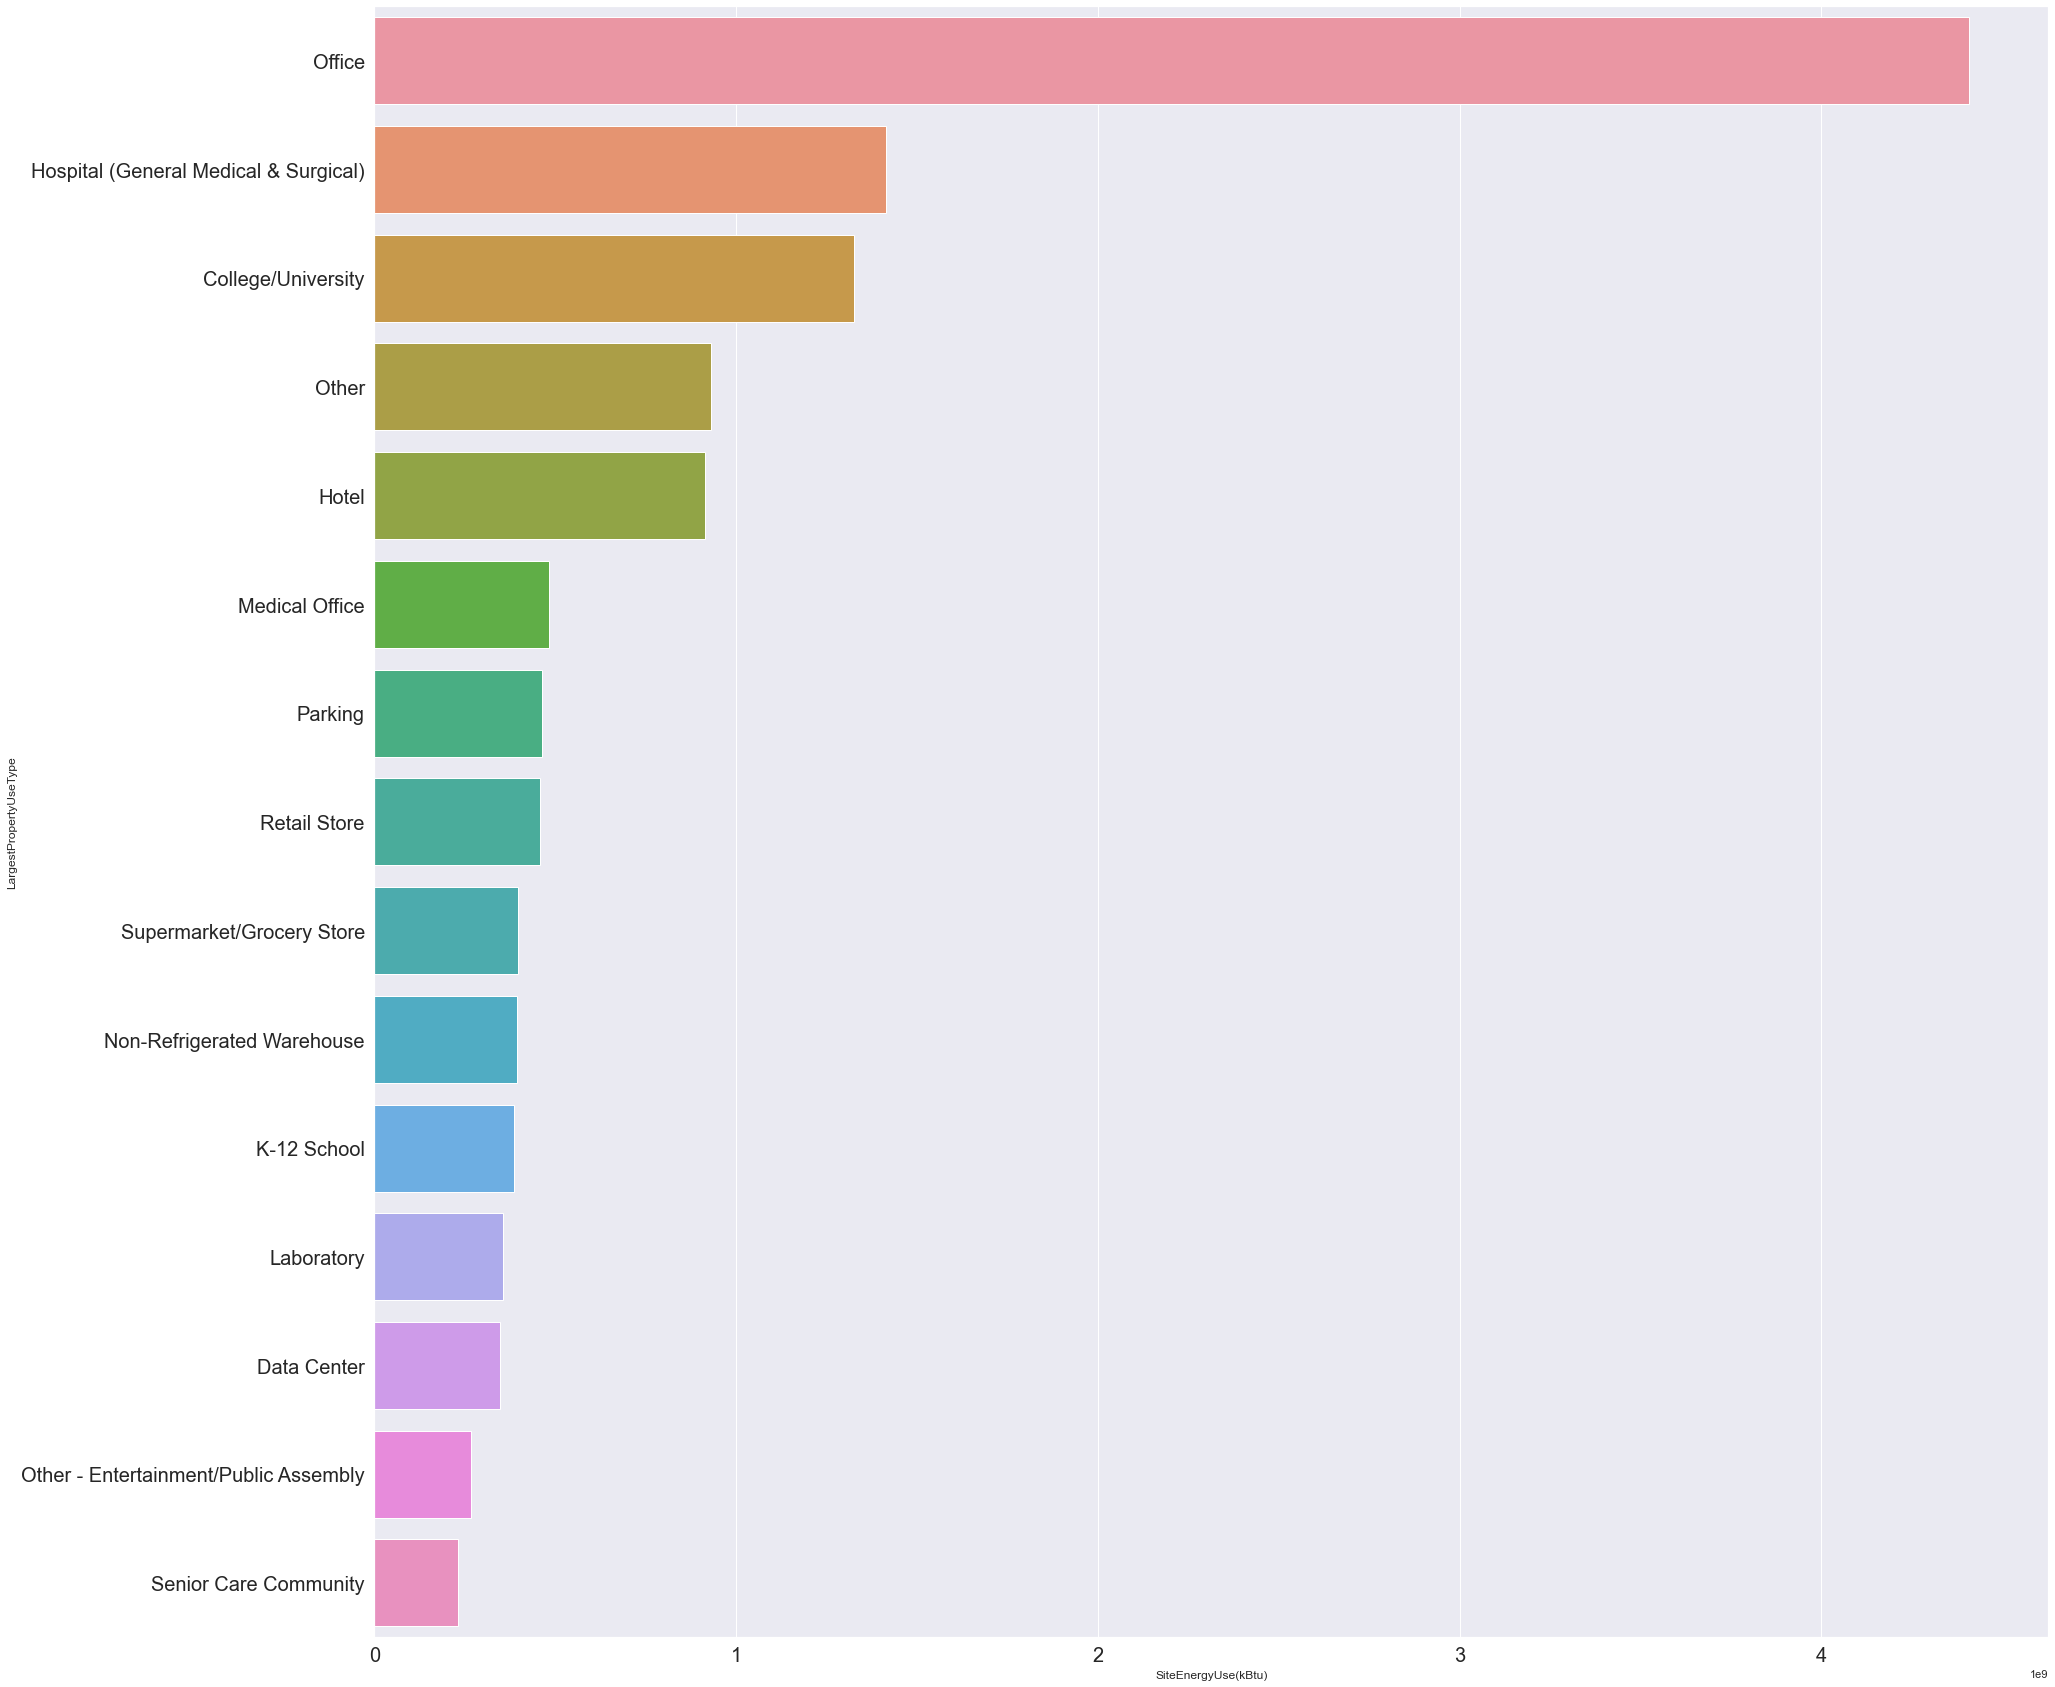

In [52]:
ordersum = base_use_energy.groupby('LargestPropertyUseType')["SiteEnergyUse(kBtu)"].sum().sort_values(ascending = False).index.tolist()
    
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(30, 30)}) #width, #heigh
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.barplot(y='LargestPropertyUseType' , x="SiteEnergyUse(kBtu)", data = base_use_energy,
                       orient = 'h' , order = ordersum[0:15])

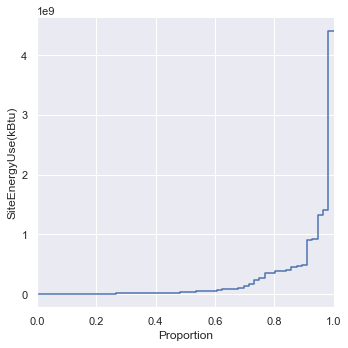

In [53]:
sns.displot(base_use_energy, y="SiteEnergyUse(kBtu)", kind="ecdf")

In [54]:
# Les 13 premieres catégories : jusqu'a DataCenter représentent plus de 87 % de l'énergie consommmé , 
# nous pouvons regrouper les autres catégories 

In [55]:
agarder=base_use_energy['LargestPropertyUseType'].head(13).tolist()
usetodrop  = base_use_energy['LargestPropertyUseType'].tolist()
for ele in agarder:
    usetodrop.remove(ele)

In [56]:
buildingnr['LargestUse'] = buildingnr['LargestPropertyUseType']

In [57]:
buildingnr.loc[buildingnr['LargestUse'].isin(usetodrop),['LargestUse']] = "Misc"


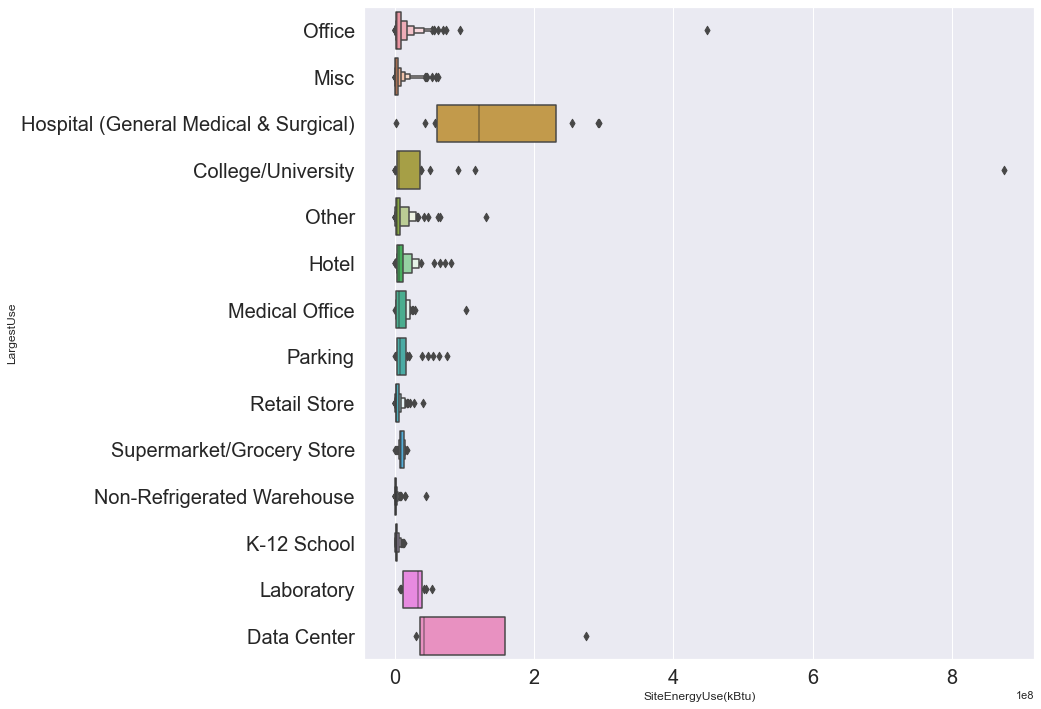

In [58]:
ordersum = buildingnr.groupby('LargestUse')["SiteEnergyUse(kBtu)"].sum().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 12)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxenplot(y='LargestUse' , x="SiteEnergyUse(kBtu)", data = buildingnr, orient = 'h',order = ordersum)

Analyse feature Outlier et nettoyage

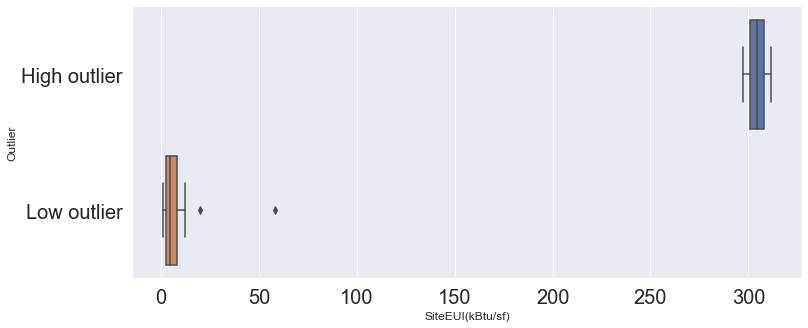

In [59]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 5)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxplot( x="SiteEUI(kBtu/sf)", y='Outlier' , data =  buildingnr, orient = 'h')
#Les outliers ont une consommation inférieure à 50 ou supérieure à 300 : nous pouvons les supprimer 

In [60]:
row_to_drop= buildingnr[ ( buildingnr['Outlier'].notna())].index.tolist()

In [61]:
buildingnr.shape
temp =  buildingnr.drop( index= row_to_drop)
buildingnr = temp
temp = buildingnr.drop(columns = "Outlier")
buildingnr = temp

In [62]:
buildingnr.shape

(1651, 49)

Analyse feature ComplianceStatus et nettoyage

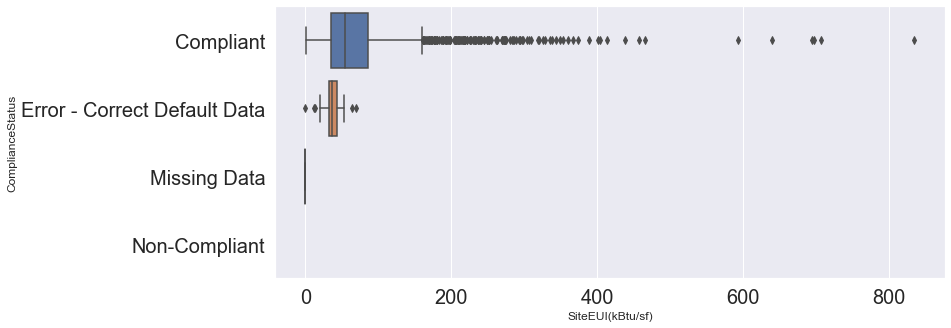

In [63]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 5)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxplot(y='ComplianceStatus' , x="SiteEUI(kBtu/sf)", data = buildingnr, orient = 'h')

In [64]:
buildingnr['ComplianceStatus'].drop_duplicates()

0                         Compliant
22     Error - Correct Default Data
28                     Missing Data
304                   Non-Compliant
Name: ComplianceStatus, dtype: object

In [65]:
 buildingnr[buildingnr['ComplianceStatus'] == 'Error - Correct Default Data'].describe().transpose() 
# Les données sont corrigées, nous pouvons garder ces enregistrements 

count          mean           std      min     25%  \
OSEBuildingID         86.0  14625.418605  13692.558804     28.0   237.5   
DataYear              86.0   2016.000000      0.000000   2016.0  2016.0   
...                    ...           ...           ...      ...     ...   
verifgfausebuilding   86.0   -788.825581   4056.235166 -19593.0  -896.0   
verifgfausetotal      86.0   -585.674419   4587.139987 -19593.0  -896.0   

                         50%      75%      max  
OSEBuildingID        20445.5  24321.5  50222.0  
DataYear              2016.0   2016.0   2016.0  
...                      ...      ...      ...  
verifgfausebuilding      0.0      0.0  16848.0  
verifgfausetotal         0.0      0.0  19211.0  

[33 rows x 8 columns]

In [66]:
buildingnr[ ( buildingnr['ComplianceStatus'] == "Non-Compliant" )  ].transpose() 
# les données de consommation ne sont pas disponible : enregistrements à supprimer 

304      578      2670
OSEBuildingID          435      773    26532
DataYear              2016     2016     2016
...                    ...      ...      ...
verifgfausetotal -358750.0  63150.0  20760.0
LargestUse            Misc      NaN      NaN

[49 rows x 3 columns]

In [67]:
print (buildingnr.shape)
row_to_drop = buildingnr[ ( buildingnr['ComplianceStatus'] == "Non-Compliant" )  ].index
temp = buildingnr.drop(index = row_to_drop)
buildingnr= temp 
print (buildingnr.shape )

(1651, 49)
(1648, 49)


In [68]:
buildingnr[ ( buildingnr['ComplianceStatus'] == "Missing Data" ) ].describe(include = 'all').transpose() 
# des informations d'utilisation de steam et electricity sont disponible 
#mais la consommation totale n'est pas disponible : a supprimer. 

count unique          top freq         mean           std  \
OSEBuildingID     14.0    NaN          NaN  NaN  6863.928571  14587.225805   
DataYear          14.0    NaN          NaN  NaN       2016.0           0.0   
...                ...    ...          ...  ...          ...           ...   
verifgfausetotal  14.0    NaN          NaN  NaN -1832.571429   3281.024177   
LargestUse          14      2  K-12 School   13          NaN           NaN   

                      min     25%     50%     75%      max  
OSEBuildingID        34.0   119.0   222.0   842.5  49703.0  
DataYear           2016.0  2016.0  2016.0  2016.0   2016.0  
...                   ...     ...     ...     ...      ...  
verifgfausetotal -12216.0 -2464.0  -448.0     0.0      0.0  
LargestUse            NaN     NaN     NaN     NaN      NaN  

[49 rows x 11 columns]

In [69]:
print (buildingnr.shape)
row_to_drop = buildingnr[ ( buildingnr['ComplianceStatus'] == "Missing Data" )  ].index
temp= buildingnr.drop(index = row_to_drop)
buildingnr= temp 
print (buildingnr.shape )

(1648, 49)
(1634, 49)


Analyse cohérence Property GFA total et Property GFA Building Property GFA Parking

In [70]:
buildingnr[["PropertyGFABuilding(s)","PropertyGFATotal","PropertyGFAParking"]] 

PropertyGFABuilding(s)  PropertyGFATotal  PropertyGFAParking
0                      88434             88434                   0
1                      88502            103566               15064
...                      ...               ...                 ...
3374                   14101             14101                   0
3375                   18258             18258                   0

[1634 rows x 3 columns]

In [71]:
buildingnr[ (buildingnr["PropertyGFABuilding(s)"]- ( buildingnr["PropertyGFATotal"]-
                                                    buildingnr["PropertyGFAParking"])  != 0 )] 
##vérification que GFABuilding = GFA Total - GFA parking 

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, TotalGHGEmissions, GHGEmissionsIntensity, usetype_sumSF, verifgfausebuilding, verifgfausetotal, LargestUse]
Index: []

[0 rows x 49 columns]

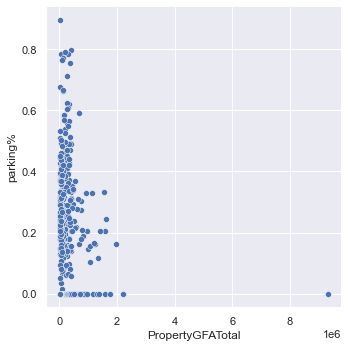

In [72]:
buildingnr['parking%']= (buildingnr["PropertyGFAParking" ]/ buildingnr["PropertyGFATotal"])
buildingnr['parking%'].describe()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
sns.relplot( x= 'PropertyGFATotal', y = 'parking%', data=buildingnr)
#pourcentage de surface parking 

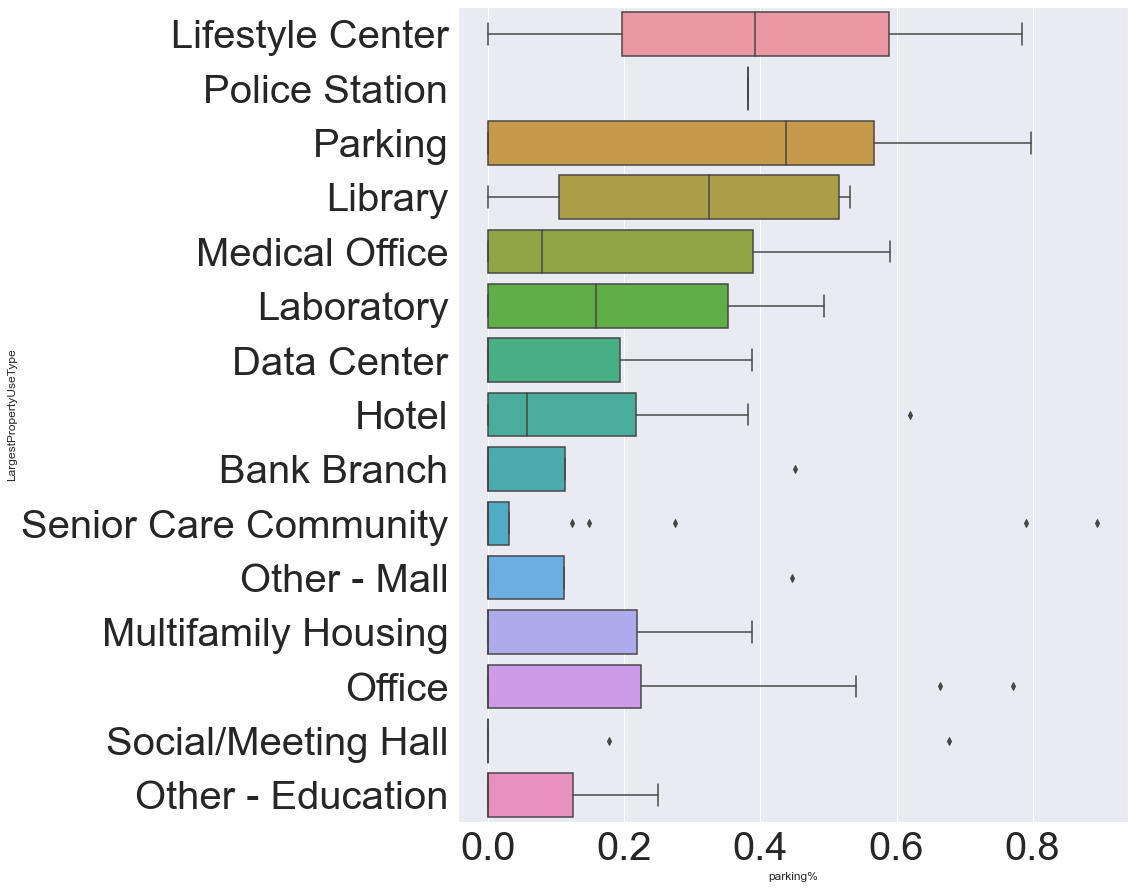

In [73]:
ordermean = buildingnr.groupby('LargestPropertyUseType')["parking%"].mean().sort_values(ascending = False).index.tolist()
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=40)
box_plot = sns.boxplot(y='LargestPropertyUseType' , x="parking%", data = buildingnr, orient = 'h', order= ordermean[0:15])

In [74]:
buildingnr[ (buildingnr['PropertyGFABuilding(s)'] > 1000000 ) ] 
# les builiings supérieurs à 1 000 000 de GFA hors parking : pas d'anomalie flagrante

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
155             245      2016  NonResidential               Other   
158             249      2016  NonResidential               Other   
...             ...       ...             ...                 ...   
2530          25992      2016  NonResidential  Mixed Use Property   
3274          49967      2016          Campus          University   

                                   PropertyName  \
155                                 CenturyLink   
158                                Safeco Field   
...                                         ...   
2530            2201 / Enso Condominiums - SEDO   
3274  University of Washington - Seattle Campus   

                                Address     City State  ZipCode  \
155           800 Occidental Ave. South  Seattle    WA  98134.0   
158             1250 First Avenue South  Seattle    WA  98134.0   
...                                 ...      ...   ...      ...   
2530  2201 9th Ave. / 820 Blanchard St.  Seattle    WA  98121.0   
3274          NE 45th St & Brooklyn Ave  Seattle    WA  98105.0   

     TaxParcelIdentificationNumber  ...  DefaultData Comments  \
155                     7666204876  ...        False      NaN   
158                     7666206483  ...        False      NaN   
...                            ...  ...          ...      ...   
2530                    8729760000  ...        False      NaN   
3274                    1625049001  ...        False      NaN   

      ComplianceStatus  TotalGHGEmissions  GHGEmissionsIntensity  \
155          Compliant             892.63                   0.56   
158          Compliant            1246.55                   1.06   
...                ...                ...                    ...   
2530         Compliant             393.29                   0.33   
3274         Compliant           11140.56                   1.20   

      usetype_sumSF  verifgfausebuilding  verifgfausetotal  \
155       1585960.0            -327680.0               0.0   
158       1172127.0                  0.0               0.0   
...             ...                  ...               ...   
2530       500408.0             504405.0          706262.0   
3274      9320156.0                  0.0               0.0   

              LargestUse  parking%  
155                 Misc  0.206613  
158                 Misc  0.000000  
...                  ...       ...  
2530              Office  0.167284  
3274  College/University  0.000000  

[16 rows x 50 columns]

Analyse si SiteEnergyUse kbtu / SF est calculé en prenant en compte ou non les surface de parking

In [75]:
buildingnr['eui/sfcalc'] = (buildingnr["SiteEnergyUse(kBtu)"] / buildingnr["PropertyGFATotal"] ) 
#intensité consommation énergie sur surface totale

In [76]:
buildingnr['eui/sfwopark'] = (buildingnr["SiteEnergyUse(kBtu)"] / buildingnr["PropertyGFABuilding(s)"] ) 
#intensité consommation énergie sur surface sans parking

In [77]:
buildingnr['verif_eui/sfcalc'] = buildingnr['eui/sfcalc']-buildingnr['SiteEUI(kBtu/sf)'] 

In [78]:
buildingnr['verif_eui/sfwopark'] = buildingnr['eui/sfwopark']-buildingnr['SiteEUI(kBtu/sf)']

In [79]:
buildingnr[['SiteEUI(kBtu/sf)','eui/sfcalc','eui/sfwopark','verif_eui/sfcalc',
            'verif_eui/sfwopark']][buildingnr["PropertyGFAParking"]!=0 ].sort_values('eui/sfwopark')

SiteEUI(kBtu/sf)  eui/sfcalc  eui/sfwopark  verif_eui/sfcalc  \
380           3.600000    3.572973      4.355134         -0.027027   
169           8.200000    7.283862      8.167966         -0.916137   
...                ...         ...           ...               ...   
2380        359.700012  446.914778    804.734678         87.214766   
1109        337.500000  350.754129   3341.232123         13.254129   

      verif_eui/sfwopark  
380             0.755134  
169            -0.032034  
...                  ...  
2380          445.034666  
1109         3003.732123  

[331 rows x 5 columns]

In [80]:
buildingnr[['SiteEUI(kBtu/sf)','eui/sfcalc','eui/sfwopark','verif_eui/sfcalc',
            'verif_eui/sfwopark']][buildingnr["PropertyGFAParking"]!=0 ].describe()

SiteEUI(kBtu/sf)  eui/sfcalc  eui/sfwopark  verif_eui/sfcalc  \
count        331.000000  331.000000    331.000000        331.000000   
mean          87.674924   63.649878    104.887860        -24.025046   
...                 ...         ...           ...               ...   
75%           95.150002   74.016673    101.509781         -6.054067   
max          707.299988  459.650415   3341.232123         87.214766   

       verif_eui/sfwopark  
count          331.000000  
mean            17.212936  
...                   ...  
75%              6.231930  
max           3003.732123  

[8 rows x 5 columns]

In [81]:
buildingnr[['SiteEUI(kBtu/sf)','eui/sfwopark','eui/sfcalc']].describe().transpose()
#la moyenne de SiteEUI(kBty/sf) est entre le calcul avec et sans parking 
#la variation standard est plus proche de calcul sans les surfaces de parking. 

count       mean         std  min        25%        50%  \
SiteEUI(kBtu/sf)  1634.0  73.069951   73.738957  0.0  34.400002  52.200001   
eui/sfwopark      1634.0  77.236761  114.746614  0.0  34.395663  51.983347   
eui/sfcalc        1634.0  68.883167   74.297001  0.0  31.729325  47.079298   

                        75%          max  
SiteEUI(kBtu/sf)  82.400002   834.400024  
eui/sfwopark      84.460089  3341.232123  
eui/sfcalc        75.514070   906.130957

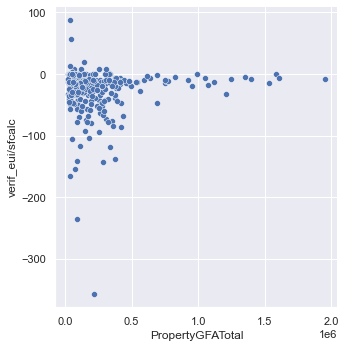

In [82]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
sns.relplot(data = buildingnr[buildingnr["PropertyGFAParking"]!=0 ],x = "PropertyGFATotal", y= 'verif_eui/sfcalc') 


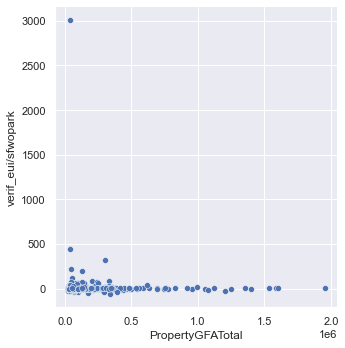

In [83]:
sns.relplot(data = buildingnr[buildingnr["PropertyGFAParking"]!=0 ],x = "PropertyGFATotal", y= 'verif_eui/sfwopark') 
#les écarts semblent moins important avec le calcul réalisé sans les surface de parking 

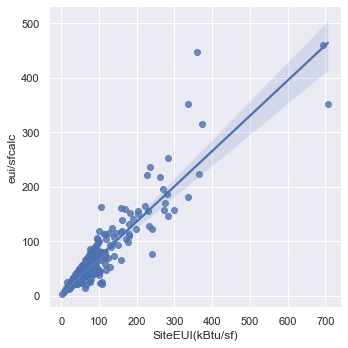

In [84]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 15)}) #width, #height=
sns.lmplot(data = buildingnr[buildingnr["PropertyGFAParking"]!=0 ],x = "SiteEUI(kBtu/sf)",
           y= 'eui/sfcalc', robust=True) 

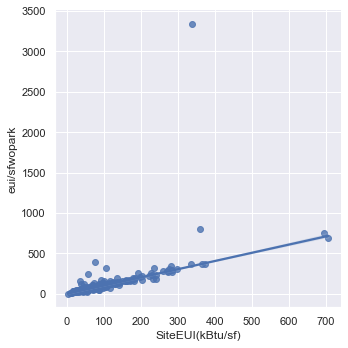

In [85]:

sns.lmplot(data = buildingnr[buildingnr["PropertyGFAParking"]!=0 ],x = "SiteEUI(kBtu/sf)", y= 'eui/sfwopark', robust=True) 

In [86]:
#Les données d'énergie par SF SiteEUI(kBTU/sf) sont cohérente entre les enregistrement de la base et les données 
#calculées avec parking ( eui/sfcalc) a quelques outlier prés

Analyse cohérence entre les informations par type d'énergie et l'énergie totale consommée 

In [87]:


buildingnr['totalenergy']= buildingnr["SteamUse(kBtu)"]+buildingnr["Electricity(kBtu)"] + buildingnr["NaturalGas(kBtu)"]
#calcul de la consommation totale en KBTU
buildingnr['verif_eui'] = buildingnr["SiteEnergyUse(kBtu)"] - buildingnr['totalenergy']
buildingnr['verif_eui%'] = round( ( buildingnr['verif_eui'] / buildingnr["SiteEnergyUse(kBtu)"] ) *100 ,0 ) 
buildingnr['verif_eui%'] = buildingnr['verif_eui%'].astype('Int64')


In [88]:
buildingnr[['SiteEnergyUse(kBtu)','totalenergy','SteamUse(kBtu)',"Electricity(kBtu)",'NaturalGas(kBtu)',
            'verif_eui','verif_eui%']].describe().transpose()

count          mean           std        min  \
SiteEnergyUse(kBtu)  1634.0  8.552841e+06  3.050370e+07        0.0   
totalenergy          1634.0  8.429931e+06  2.828422e+07  -115417.0   
...                     ...           ...           ...        ...   
verif_eui            1634.0  1.229098e+05  3.358608e+06 -1109896.5   
verif_eui%           1633.0  3.588487e-01  5.358800e+00      -24.0   

                              25%           50%          75%          max  
SiteEnergyUse(kBtu)  1.267712e+06  2.617531e+06  6978706.125  873923712.0  
totalenergy          1.267378e+06  2.603072e+06  6963230.000  742059629.0  
...                           ...           ...          ...          ...  
verif_eui            0.000000e+00  3.125000e-01        0.875  131864083.0  
verif_eui%           0.000000e+00  0.000000e+00        0.000        134.0  

[7 rows x 8 columns]

In [89]:
# En moyenne 0.35% d'écart entre la somme des 3 énergies et le total 

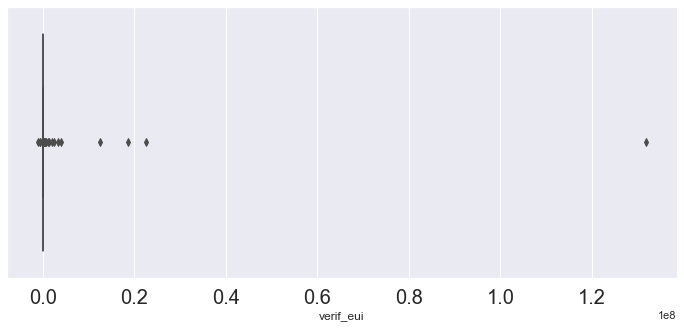

In [90]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(12, 5)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
box_plot = sns.boxplot(x="verif_eui", data = buildingnr, orient = 'h')

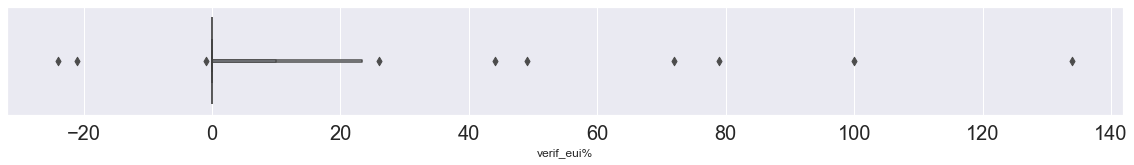

In [91]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(20, 2)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
plot = sns.boxenplot(x="verif_eui%", data = buildingnr, orient = 'h')

In [92]:
buildingnr[['SiteEnergyUse(kBtu)','totalenergy','SteamUse(kBtu)',"Electricity(kBtu)",'NaturalGas(kBtu)',
            'verif_eui','verif_eui%']][buildingnr['verif_eui%']>1].sort_values('verif_eui%')

SiteEnergyUse(kBtu)  totalenergy  SteamUse(kBtu)  Electricity(kBtu)  \
3230         1.662054e+06    1631290.0             0.0          1384383.0   
70           8.141156e+06    7874245.0       4120130.0          3754115.0   
...                   ...          ...             ...                ...   
513          1.252517e+07          0.0             0.0                0.0   
3206         3.427261e+05    -115417.0             0.0          -115417.0   

      NaturalGas(kBtu)     verif_eui  verif_eui%  
3230          246907.0  3.076412e+04           2  
70                 0.0  2.669105e+05           3  
...                ...           ...         ...  
513                0.0  1.252517e+07         100  
3206               0.0  4.581431e+05         134  

[20 rows x 7 columns]

In [93]:
#20 enregistrements ou la somme des energies est inférieur de plus de 1% au total enregsitré dans la base 

In [94]:
buildingnr[['SiteEnergyUse(kBtu)','totalenergy','SteamUse(kBtu)',"Electricity(kBtu)",'NaturalGas(kBtu)',
            'verif_eui','verif_eui%']][buildingnr['verif_eui%']<0].sort_values('verif_eui%')

SiteEnergyUse(kBtu)  totalenergy  SteamUse(kBtu)  Electricity(kBtu)  \
2441            2092696.0    2589388.0             0.0          1597575.0   
563             5177270.5    6287167.0             0.0          4871126.0   
206            40847752.0   41377888.0             0.0         40839637.0   

      NaturalGas(kBtu)  verif_eui  verif_eui%  
2441          991813.0  -496692.0         -24  
563          1416041.0 -1109896.5         -21  
206           538251.0  -530136.0          -1

In [95]:
#3 enregistrements affichent un total calculé sur les 3 énergies supérieur au total enregistré dans la base 

Analyse consommation par année de construction 

<AxesSubplot:xlabel='YearBuilt', ylabel='eui/sfwopark'>

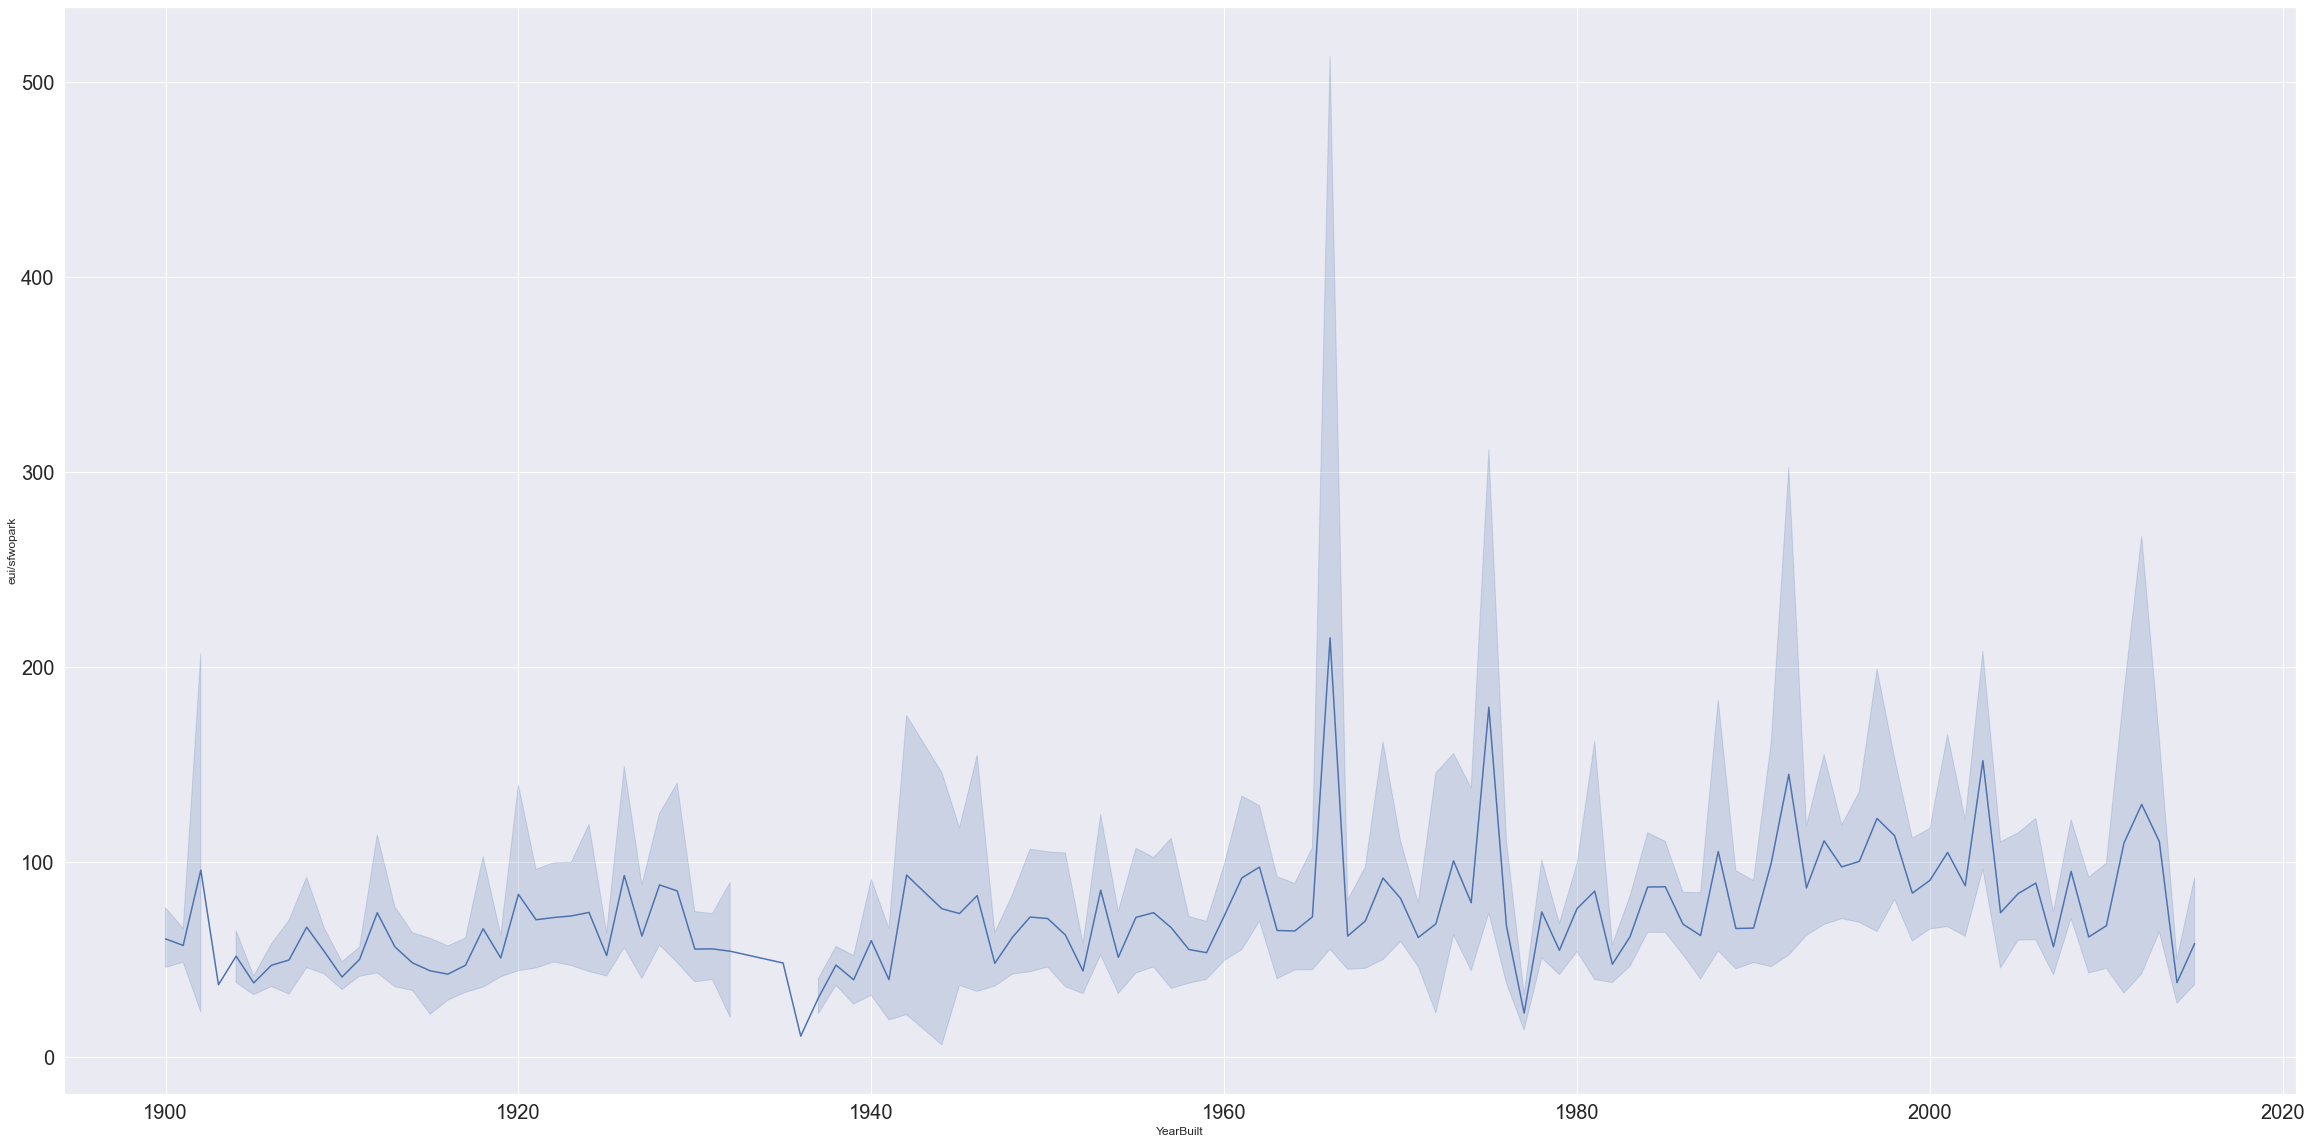

In [96]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=15)
sns.set(rc={"figure.figsize":(40 ,20)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
#aggregate over repeated values (each year) to show the mean and 95% confidence interval:
sns.lineplot(x="YearBuilt", y='eui/sfwopark', data= buildingnr)

Analyse consommation par niveau du score EnergyStars

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='eui/sfwopark'>

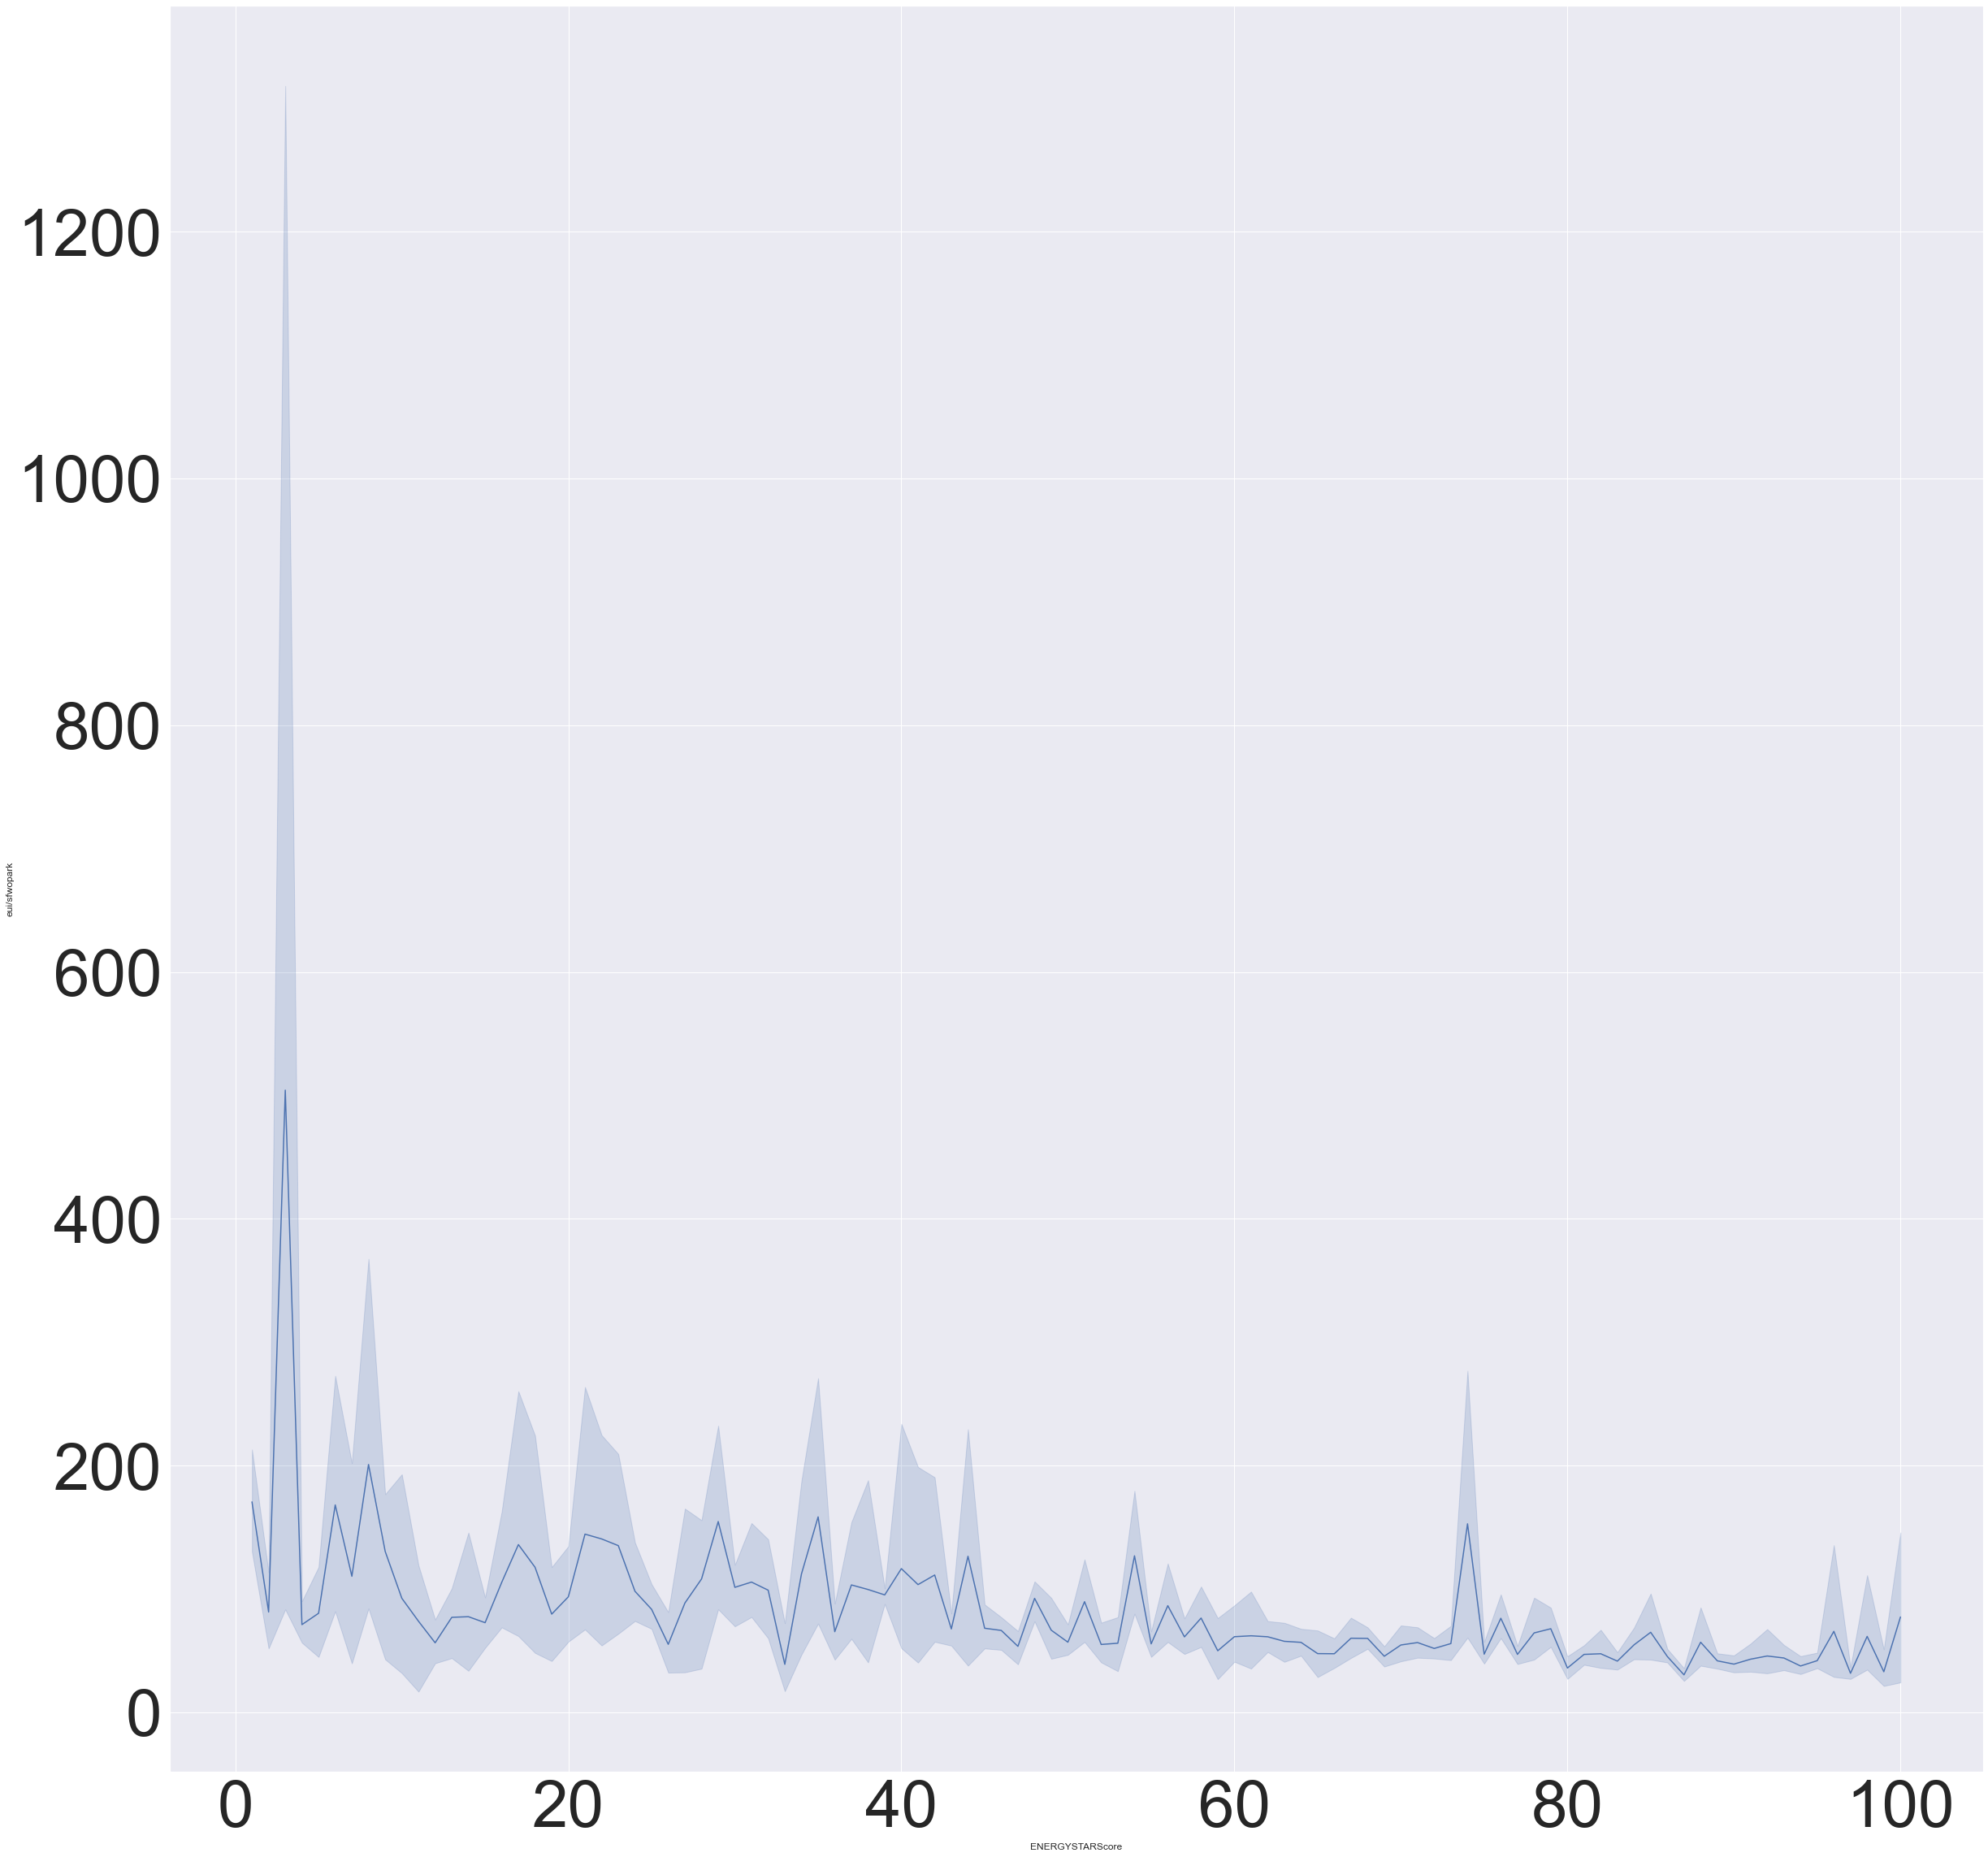

In [97]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=15)
sns.set(rc={"figure.figsize":(40 ,40)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=80)
#aggregate over repeated values (each year) to show the mean and 95% confidence interval:
#sns.boxplot(y="ENERGYSTARS", x='eui/sfwopark', data= buildingnr, orient = 'h')
sns.lineplot(x='ENERGYSTARScore' , y="eui/sfwopark", data = buildingnr)

Analyse consommation par nombre d'étage

<AxesSubplot:xlabel='NumberofFloors', ylabel='eui/sfwopark'>

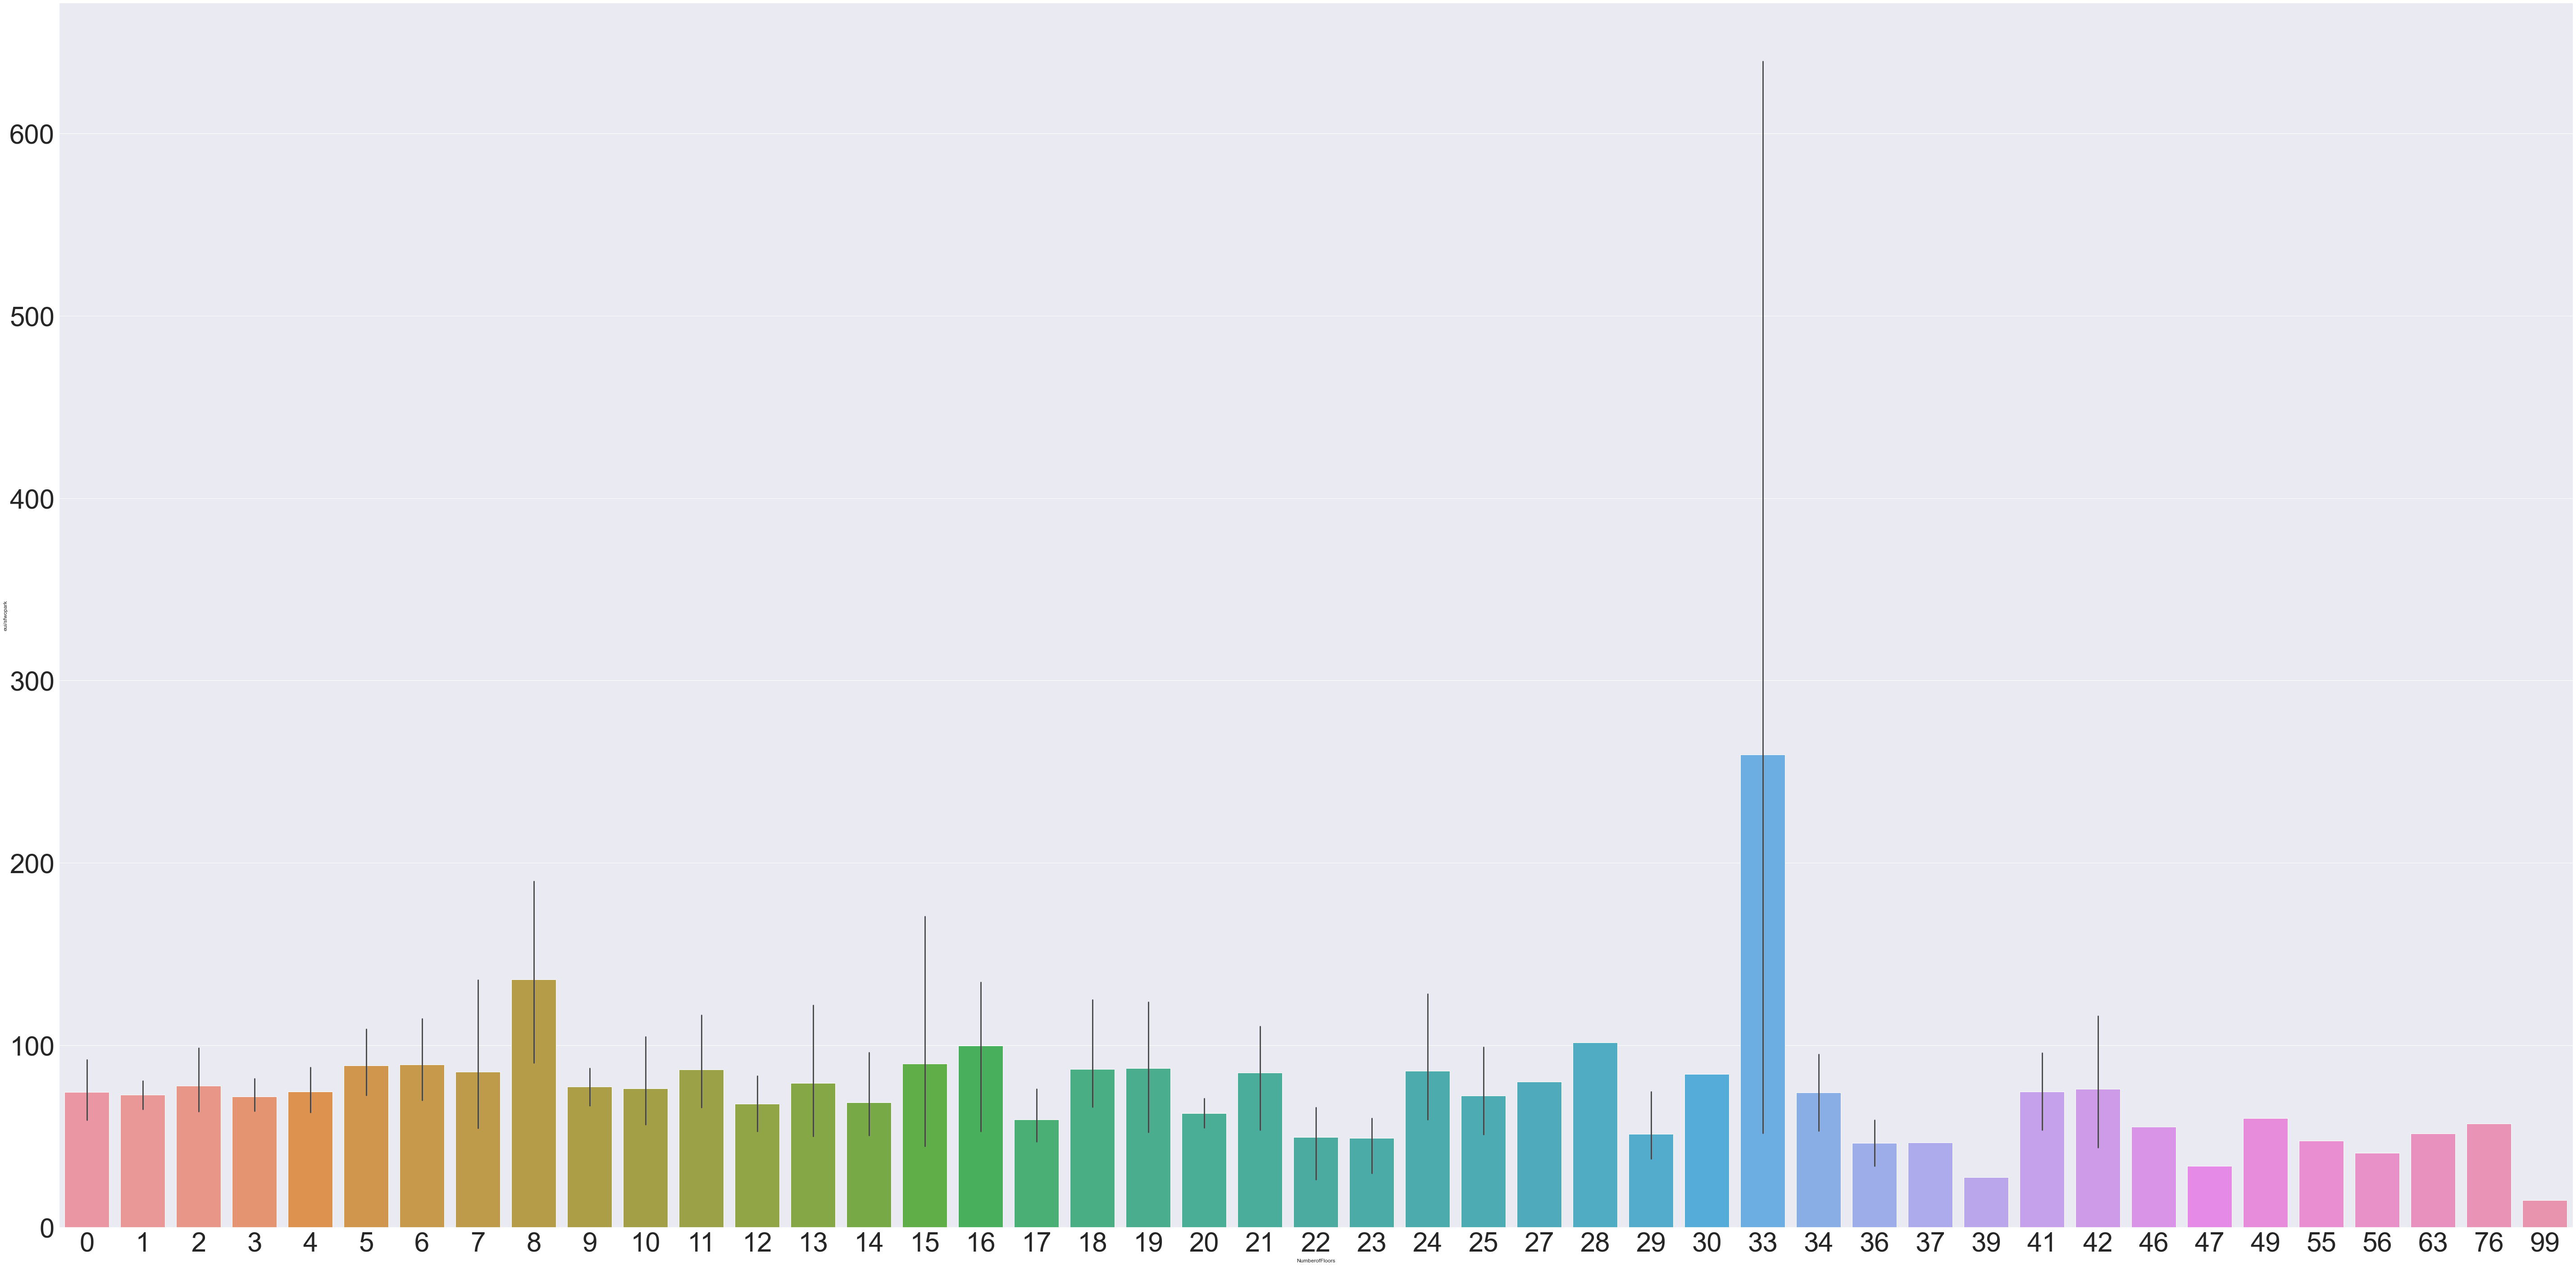

In [98]:
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(100 ,50)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=60)
sns.barplot(x='NumberofFloors' , y="eui/sfwopark", data = buildingnr)

Analyse consommation en fonction du nombre de batiments

<AxesSubplot:xlabel='NumberofBuildings', ylabel='eui/sfwopark'>

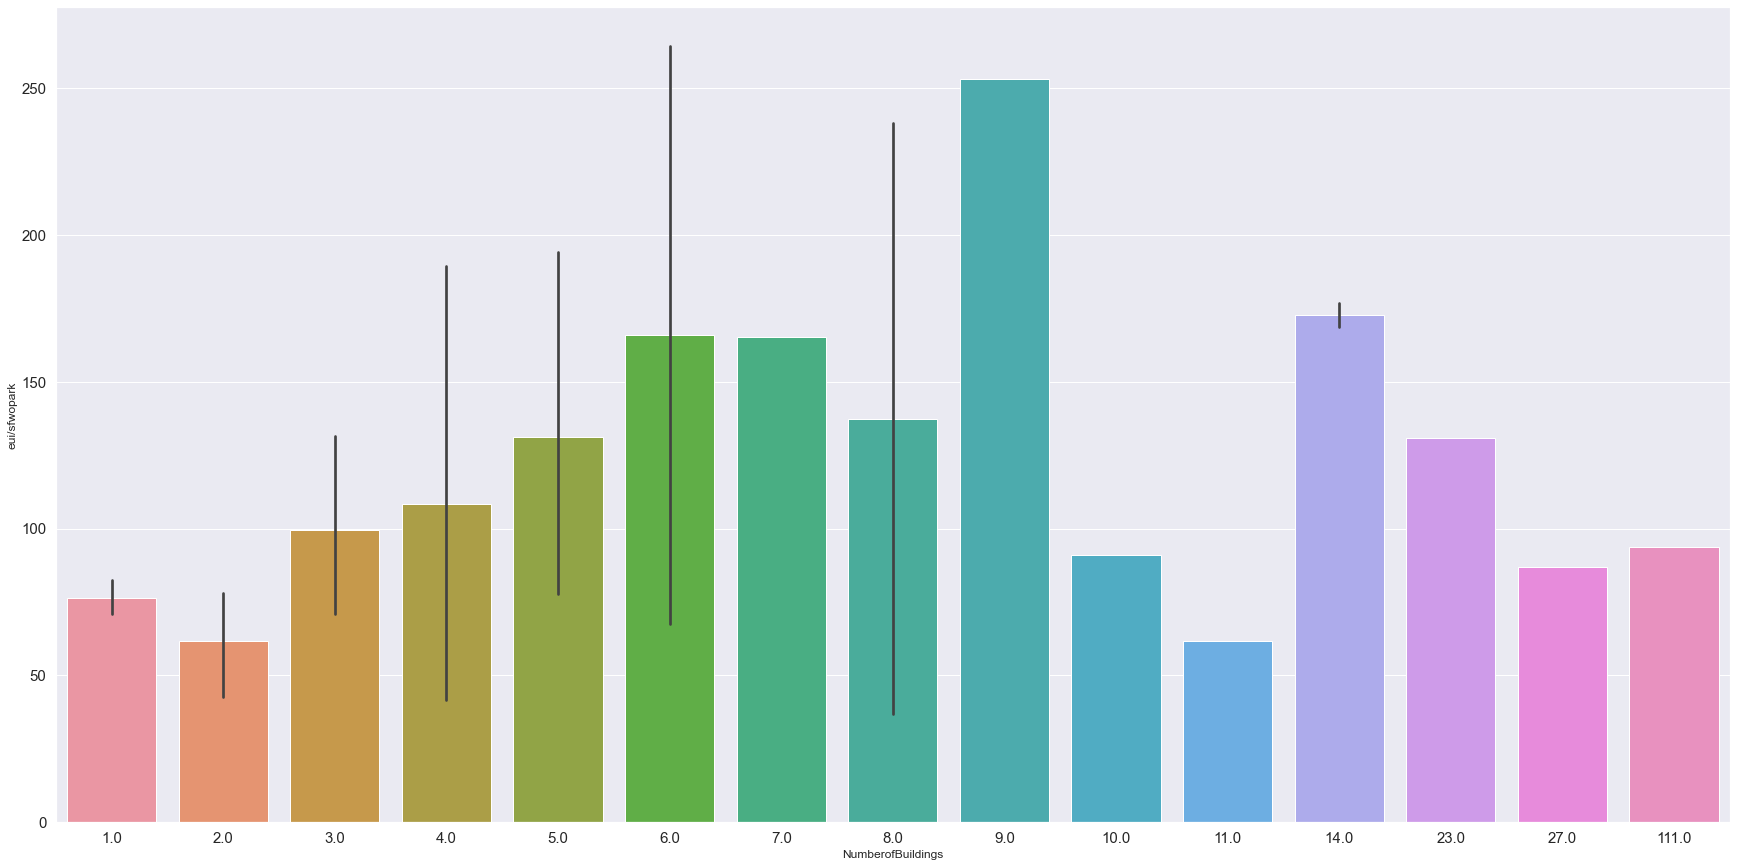

In [99]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.set(rc={"figure.figsize":(30 ,15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=15)

sns.barplot(x='NumberofBuildings' , y="eui/sfwopark", data = buildingnr)

Analyse par géographie

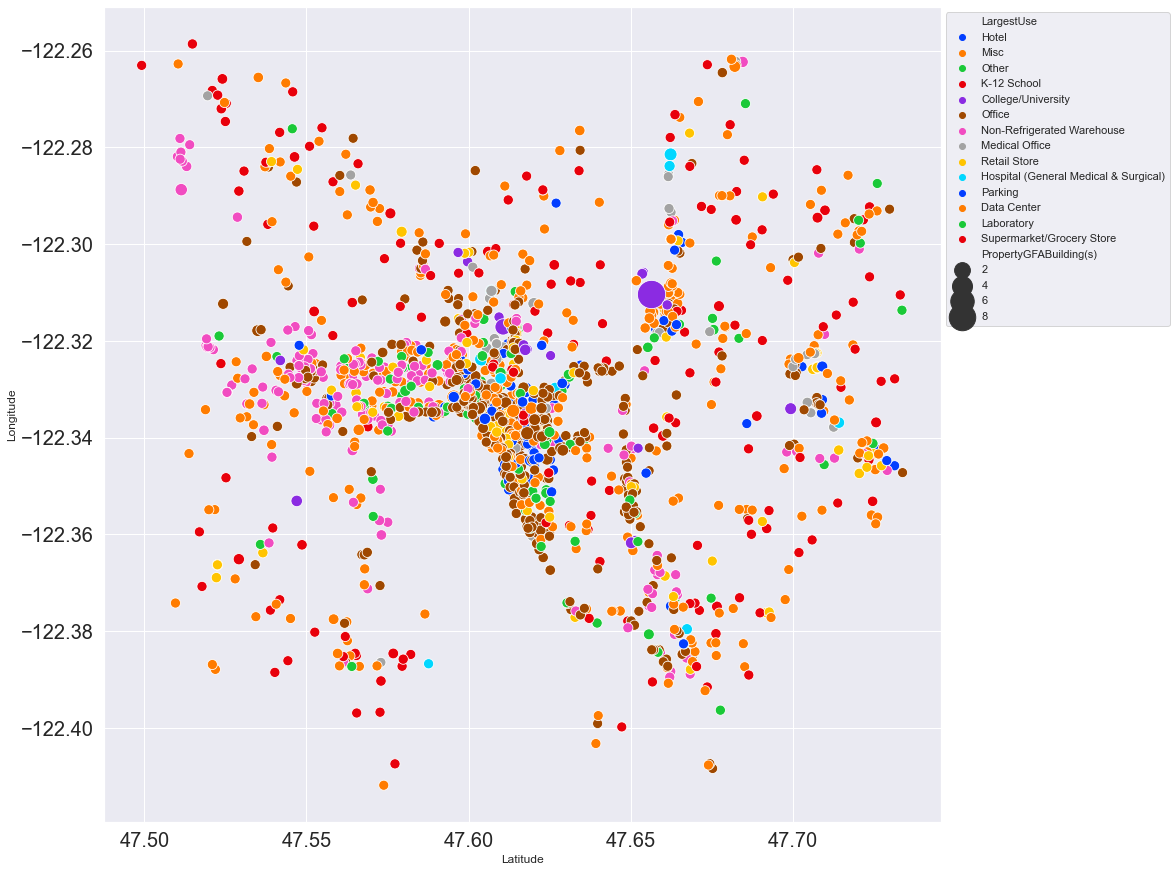

In [100]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(15, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
ax= sns.scatterplot(data=buildingnr, x="Latitude", y="Longitude", hue="LargestUse", palette="bright", 
                size="PropertyGFABuilding(s)", sizes=(100, 800) )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

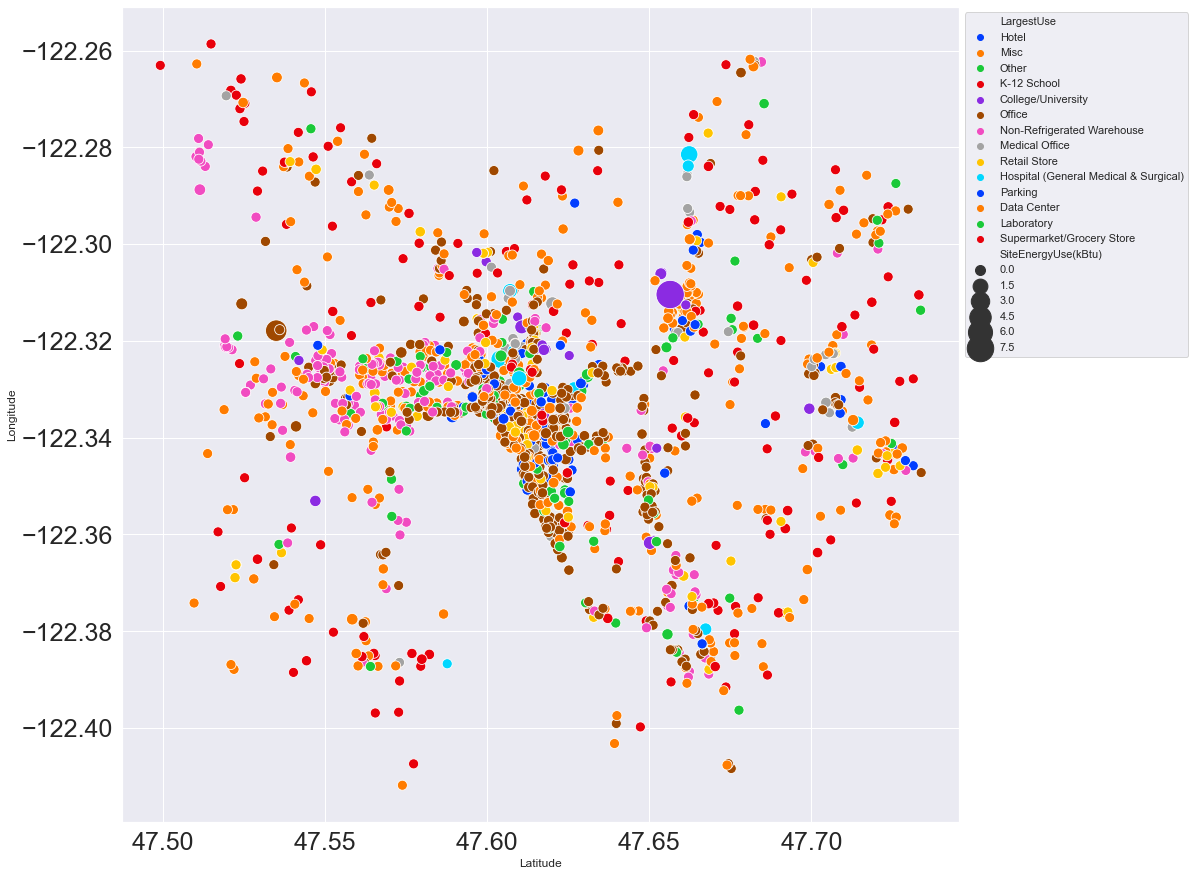

In [101]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(15, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=25)
ax = sns.scatterplot(data=buildingnr, x="Latitude", y="Longitude", hue="LargestUse", palette="bright",
                size="SiteEnergyUse(kBtu)",  sizes=(100, 800))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Regroupement des années par décennies et analyse intensité consommation et usage

In [102]:
buildingnr['DecBuilt'] = ( buildingnr['YearBuilt']/10 ).astype(int)*10

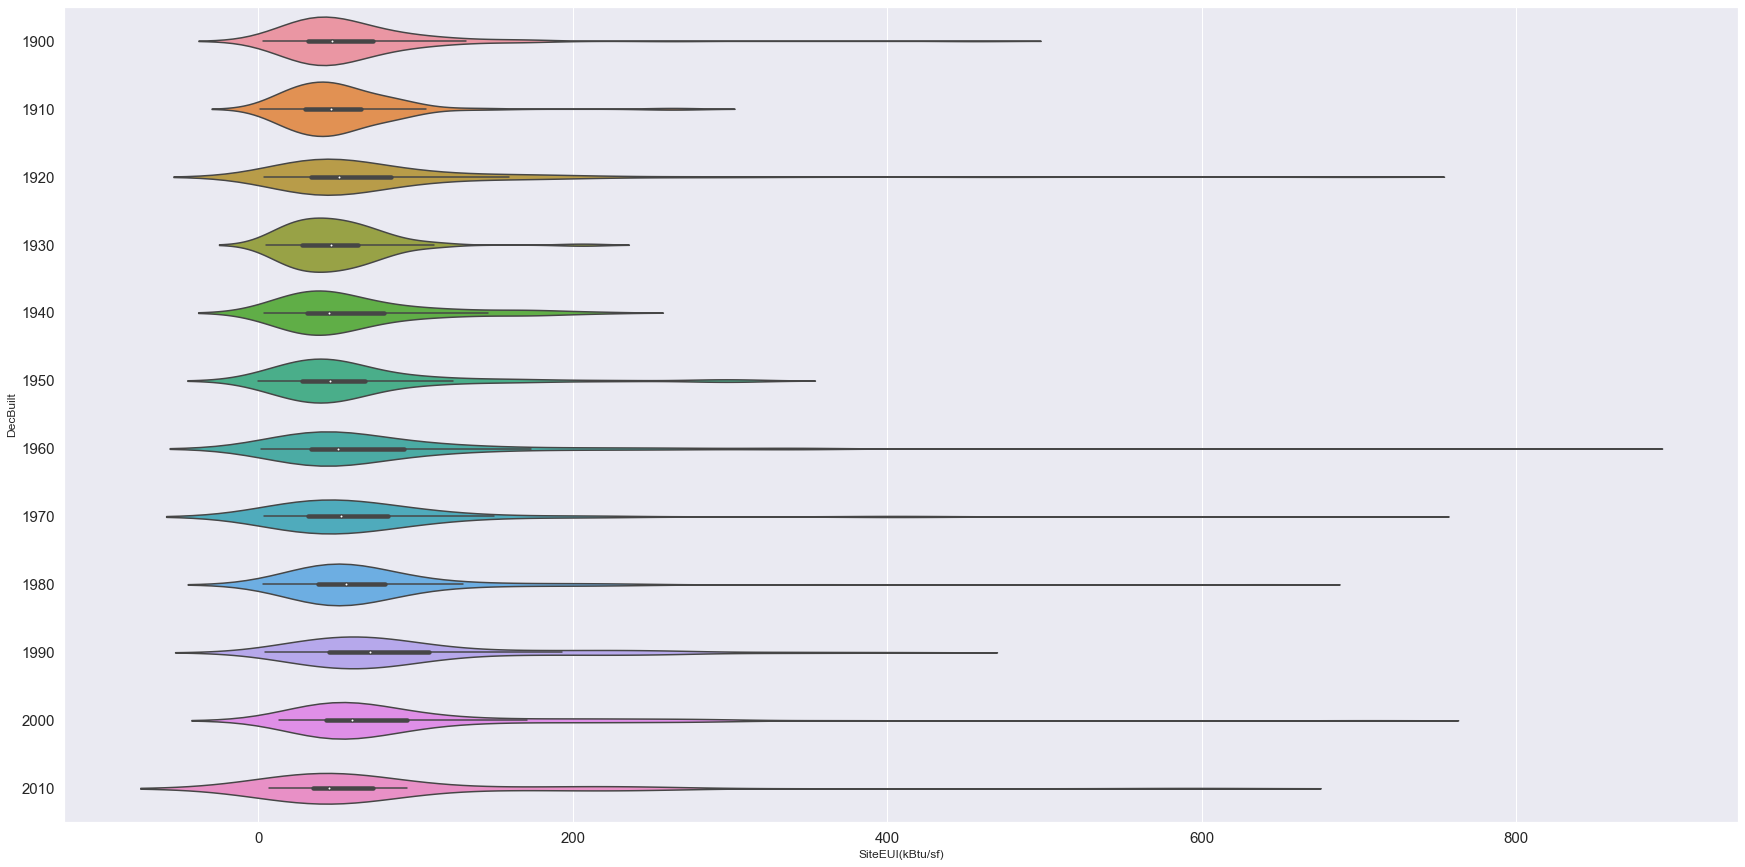

In [103]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(30, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=15)
plot = sns.violinplot(y='DecBuilt' , x="SiteEUI(kBtu/sf)", data = buildingnr, orient = 'h', stick = True)

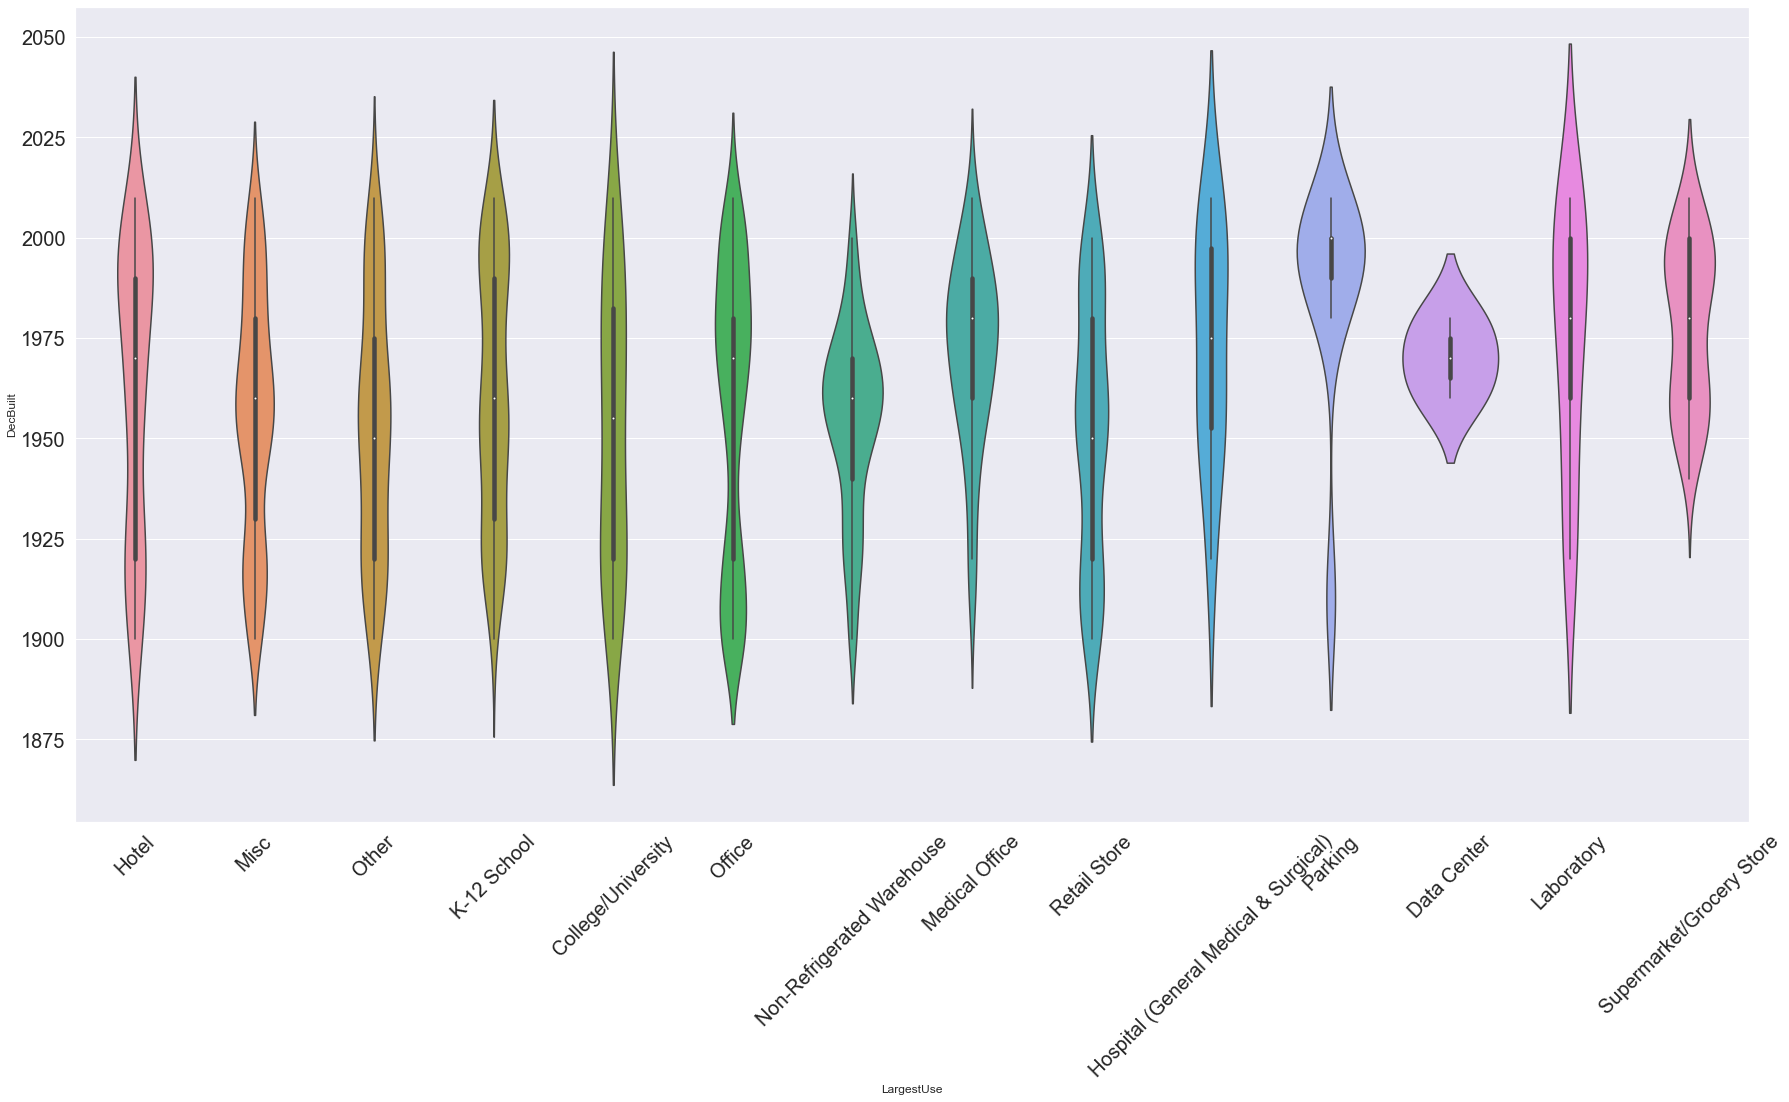

In [104]:
#Décennie de construction en fonction des principaux usages
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.set(rc={"figure.figsize":(30 ,15)}) #width, #height=
plt.tick_params(axis='x', which='major', labelsize=20, labelrotation = 45, right =True)
plt.tick_params(axis='y', which='major', labelsize=20)
plot = sns.violinplot(y='DecBuilt' , x="LargestUse", data = buildingnr, orient = 'v')

Création feature % usage des types d'énergie 

In [105]:
buildingnr['Steam%'] = ( buildingnr['SteamUse(kBtu)']/buildingnr['SiteEnergyUse(kBtu)'] ) 

In [106]:
buildingnr['Electricity%'] = ( buildingnr['Electricity(kBtu)']/buildingnr['SiteEnergyUse(kBtu)'] ) 

In [107]:
buildingnr['NaturalGas%'] = ( buildingnr['NaturalGas(kBtu)']/buildingnr['SiteEnergyUse(kBtu)'] ) 

In [108]:
buildingnr[["eui/sfwopark",'PropertyGFABuilding(s)','Steam%','Electricity%','NaturalGas%','DecBuilt']].describe(include ='all' ) 

eui/sfwopark  PropertyGFABuilding(s)       Steam%  Electricity%  \
count   1634.000000            1.634000e+03  1633.000000   1633.000000   
mean      77.236761            1.060330e+05     0.021396      0.694942   
...             ...                     ...          ...           ...   
75%       84.460089            9.493600e+04     0.000000      0.998845   
max     3341.232123            9.320156e+06     0.766987      1.000003   

       NaturalGas%     DecBuilt  
count  1633.000000  1634.000000  
mean      0.280081  1957.772338  
...            ...          ...  
75%       0.494402  1980.000000  
max       1.000000  2010.000000  

[8 rows x 6 columns]

Création feature % de surface occupé par les usages 1/2/3 

In [109]:
buildingnr['LPU1%']=buildingnr['LargestPropertyUseTypeGFA'] /(buildingnr['LargestPropertyUseTypeGFA']
                                                              +buildingnr['SecondLargestPropertyUseTypeGFA']
                                                              + buildingnr['ThirdLargestPropertyUseTypeGFA'])

In [110]:
buildingnr['LPU2%']=buildingnr['SecondLargestPropertyUseTypeGFA'] /(buildingnr['LargestPropertyUseTypeGFA']
                                                                    +buildingnr['SecondLargestPropertyUseTypeGFA']
                                                                    + buildingnr['ThirdLargestPropertyUseTypeGFA'])

In [111]:
buildingnr['LPU3%']=buildingnr['ThirdLargestPropertyUseTypeGFA'] / (buildingnr['LargestPropertyUseTypeGFA']
                                                                    +buildingnr['SecondLargestPropertyUseTypeGFA']
                                                                    +buildingnr['ThirdLargestPropertyUseTypeGFA'])

In [112]:
buildingnr[['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',
            'LPU1%','LPU2%','LPU3%']]

LargestPropertyUseType    SecondLargestPropertyUseType  \
0                     Hotel                             NaN   
1                     Hotel                         Parking   
...                     ...                             ...   
3374     Other - Recreation  Fitness Center/Health Club/Gym   
3375     Other - Recreation  Fitness Center/Health Club/Gym   

     ThirdLargestPropertyUseType     LPU1%     LPU2%     LPU3%  
0                            NaN  1.000000  0.000000  0.000000  
1                     Restaurant  0.809918  0.145453  0.044629  
...                          ...       ...       ...       ...  
3374          Pre-school/Daycare  0.485868  0.478507  0.035625  
3375          Pre-school/Daycare  0.475919  0.460326  0.063755  

[1634 rows x 6 columns]

Création d'une feature pour chacune des usages présents dans Largest/2/3 uses 


In [113]:
base_type = pd.get_dummies(buildingnr[['LargestPropertyUseType','SecondLargestPropertyUseType',
                                       'ThirdLargestPropertyUseType']],prefix=["1UseType%","2UseType%","3UseType%"])
print ('dummy',base_type.shape,'base',buildingnr.shape)
base_type.transpose()
print ( base_type.shape ) 

dummy (1634, 141) base (1634, 64)
(1634, 141)


In [114]:
buildingnrUSE=pd.concat( [buildingnr,base_type], axis=1) #concatenation de la base dummies et base utilisée


In [115]:
#détermination de l'ensemble des usages présents dans chacun des UseType et déduplication 
liste_cat = building['LargestPropertyUseType'].unique().tolist()
liste_cat = liste_cat + building['SecondLargestPropertyUseType'].unique().tolist()
liste_cat = liste_cat + building['ThirdLargestPropertyUseType'].unique().tolist()
liste_cat = list(dict.fromkeys(liste_cat))
liste_cat.remove(np.nan)
liste_cat
for cat in liste_cat: 
    col = cat+ "_eui%"
    buildingnrUSE[col]= 0
    
liste_cat = building['LargestPropertyUseType'].unique().tolist()
liste_cat.remove(np.nan)
for cat in liste_cat: 
    col = cat+ "_eui%"
    buildingnrUSE[col] = buildingnrUSE[('1UseType%_'+cat)] *buildingnrUSE['LPU1%']
#création d'un colonne pour chacun des usages présents dans largestUse alimenté avec le % de la surface de l'usage 
 

In [116]:
liste= [col for col in buildingnrUSE.columns.tolist() if "2UseType%_" in col]
#liste.remove(np.nan)
for cat in liste:
    cat = cat.replace("2UseType%_","")
    col = cat+ "_eui%"
    buildingnrUSE[col] =  buildingnrUSE[col]+(buildingnrUSE[('2UseType%_'+cat)]*buildingnrUSE['LPU2%'])
#création d'un colonne pour chacun des usages présents dans 2eme type d'usage le % de la surface de l'usage 

liste= [col for col in buildingnrUSE.columns.tolist() if "3UseType%_" in col]
#liste.remove(np.nan)
for cat in liste:
    cat = cat.replace("3UseType%_","")
    col = cat+ "_eui%"
    buildingnrUSE[col] =  buildingnrUSE[col]+(buildingnrUSE[('3UseType%_'+cat)]*buildingnrUSE['LPU3%'])
#création d'un colonne pour chacun des usages présents dans 3eme type d'usage le % de la surface de l'usage 

In [ ]:
 liste_cat = buildingnr['LargestPropertyUseType'].unique().tolist()
liste_cat = liste_cat + buildingnr['SecondLargestPropertyUseType'].unique().tolist()
liste_cat = liste_cat + buildingnr['ThirdLargestPropertyUseType'].unique().tolist()
liste_cat = list(dict.fromkeys(liste_cat))
liste_cat.remove(np.nan)

for cat in liste_cat: 
    col = cat+ "_GFA"
    buildingnrUSE[col]= 0
#creation des colonnes 

liste_cat = buildingnr['LargestPropertyUseType'].unique().tolist()
liste_cat.remove(np.nan)
for cat in liste_cat: 
    colgfa=cat+"_GFA"
    buildingnrUSE[colgfa] = buildingnrUSE[colgfa]+buildingnrUSE[('1UseType%_'+cat)]* buildingnrUSE['LargestPropertyUseTypeGFA']
#creation d'une colonne par categorie présente dans largestP..Use alimenté avec la surface de la LargestUse 
    
liste= [col for col in buildingnrUSE.columns.tolist() if "2UseType%_" in col]
#liste.remove(np.nan)
for cat in liste:
    cat = cat.replace("2UseType%_","")
    colgfa=cat+"_GFA"
    buildingnrUSE[colgfa] = buildingnrUSE[colgfa]+ buildingnrUSE[('2UseType%_'+cat)]* buildingnrUSE['SecondLargestPropertyUseTypeGFA']
#creation d'une colonne par categorie présente dans SecondLargetstP..Use alimenté avec la surface de la SecondLargest 
 

liste= [col for col in buildingnrUSE.columns.tolist() if "3UseType%_" in col]
#liste.remove(np.nan)
for cat in liste:
    cat = cat.replace("3UseType%_","")
    colgfa=cat+"_GFA"
    buildingnrUSE[colgfa] = buildingnrUSE[colgfa]+ buildingnrUSE[('3UseType%_'+cat)]* buildingnrUSE['ThirdLargestPropertyUseTypeGFA']
#idem 3eme usage  

In [ ]:
liste_cat = buildingnr['LargestPropertyUseType'].unique().tolist()
liste_cat = liste_cat + buildingnr['SecondLargestPropertyUseType'].unique().tolist()
liste_cat = liste_cat + buildingnr['ThirdLargestPropertyUseType'].unique().tolist()
liste_cat = list(dict.fromkeys(liste_cat))
liste_cat.remove(np.nan)


for cat in liste_cat: 
    col = cat+ "_GFA%"
    buildingnrUSE[col]= 0
liste_cat = buildingnr['LargestPropertyUseType'].unique().tolist()

liste_cat.remove(np.nan)
for cat in liste_cat: 
    colgfa=cat+"_GFA%"
    buildingnrUSE[colgfa] = buildingnrUSE[('1UseType%_'+cat)]*buildingnrUSE['LargestPropertyUseTypeGFA']/ buildingnrUSE['PropertyGFATotal']
#creation colonne par categorie alimenté avec la surface en % de l'usage principale

liste= [col for col in buildingnrUSE.columns.tolist() if "2UseType%_" in col]
#liste.remove(np.nan)
for cat in liste:
    cat = cat.replace("2UseType%_","")
    colgfa=cat+"_GFA%"
    buildingnrUSE[colgfa]=buildingnrUSE[colgfa]
    + buildingnrUSE[('2UseType%_'+cat)]*buildingnrUSE['SecondLargestPropertyUseTypeGFA']/buildingnrUSE['PropertyGFATotal']
#idem 2eme usage 

liste= [col for col in buildingnrUSE.columns.tolist() if "3UseType%_" in col]
#liste.remove(np.nan)
for cat in liste:
    cat = cat.replace("3UseType%_","")
    colgfa=cat+"_GFA%"
    buildingnrUSE[colgfa]=buildingnrUSE[colgfa]
    + buildingnrUSE[('3UseType%_'+cat)]*buildingnrUSE['ThirdLargestPropertyUseTypeGFA']/ buildingnrUSE['PropertyGFATotal']
#idem  3eme usage

In [119]:
pd.set_option('display.max_rows', 5)
buildingnrUSE.transpose()

0     1     2     3     4     5     6     \
OSEBuildingID                       1     2     3     5     8     9    10   
DataYear                         2016  2016  2016  2016  2016  2016  2016   
...                               ...   ...   ...   ...   ...   ...   ...   
Other - Technology/Science_GFA%     0     0     0     0     0     0     0   
Fast Food Restaurant_GFA%           0     0     0     0     0     0     0   

                                 7     8     10    ...   3366   3367   3368  \
OSEBuildingID                      11    12    15  ...  50210  50212  50219   
DataYear                         2016  2016  2016  ...   2016   2016   2016   
...                               ...   ...   ...  ...    ...    ...    ...   
Other - Technology/Science_GFA%     0     0     0  ...      0      0      0   
Fast Food Restaurant_GFA%           0     0     0  ...      0      0      0   

                                  3369   3370   3371   3372   3373   3374  \
OSEBuildingID                    50220  50221  50222  50223  50224  50225   
DataYear                          2016   2016   2016   2016   2016   2016   
...                                ...    ...    ...    ...    ...    ...   
Other - Technology/Science_GFA%      0      0      0      0      0      0   
Fast Food Restaurant_GFA%            0      0      0      0      0      0   

                                  3375  
OSEBuildingID                    50226  
DataYear                          2016  
...                                ...  
Other - Technology/Science_GFA%      0  
Fast Food Restaurant_GFA%            0  

[394 rows x 1634 columns]

In [120]:
buildingnr= buildingnrUSE



Feature enginering : neighborhood

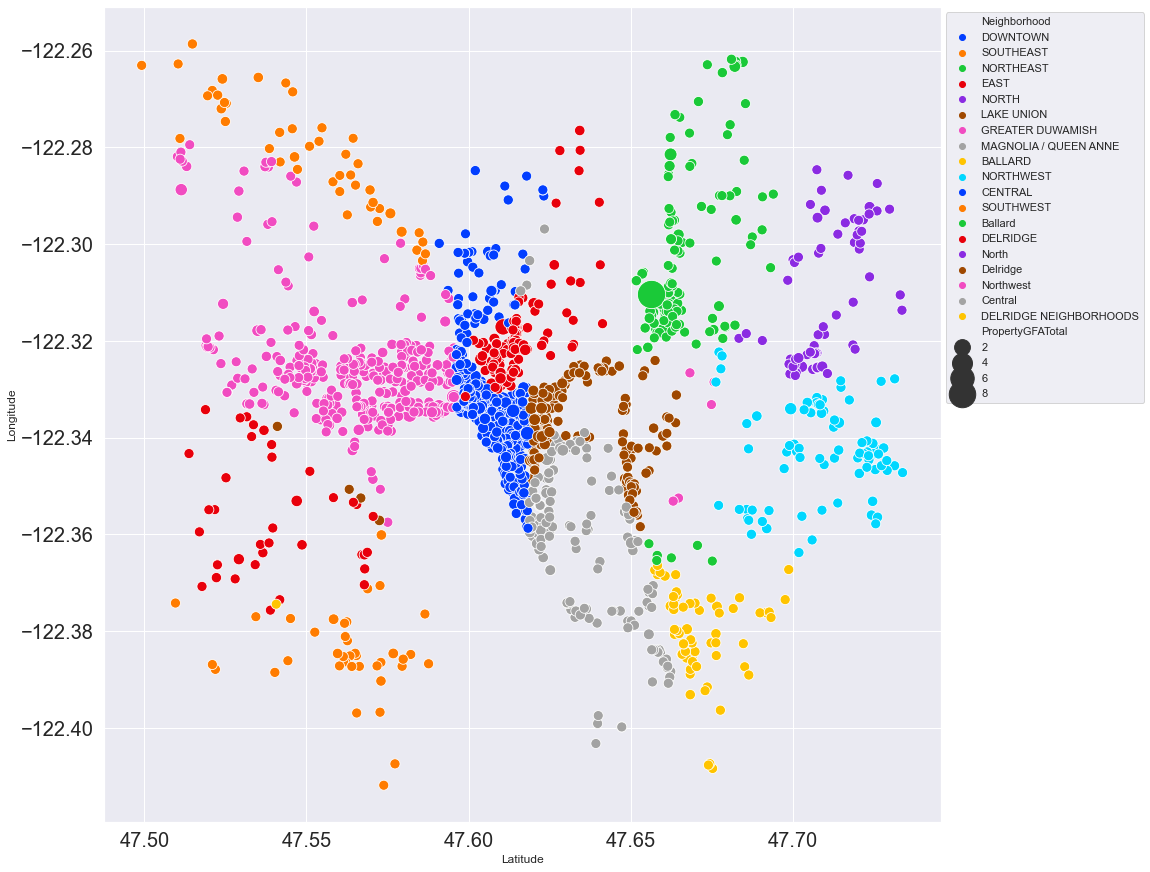

In [121]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(15, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)

ax=sns.scatterplot(data=buildingnr, x="Latitude", y="Longitude", hue="Neighborhood", palette="bright", 
                   size="PropertyGFATotal", sizes=(100, 800) )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [122]:
buildingnr['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'LAKE UNION', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'Ballard',
       'DELRIDGE', 'North', 'Delridge', 'Northwest', 'Central',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [123]:
buildingnr['Area']= buildingnr['Neighborhood']

In [124]:
row = buildingnr[buildingnr['Area']=='Ballard'].index.to_list()
row #df.index.isin([1,3])
buildingnr.loc[row,'Area'] = 'BALLARD'

In [125]:
row = buildingnr[buildingnr['Area']=='Central'].index.to_list()
row #df.index.isin([1,3])
buildingnr.loc[row,'Area'] = 'CENTRAL'

In [126]:
row = buildingnr[buildingnr['Area']=='Delridge'].index.to_list()
row #df.index.isin([1,3])
buildingnr.loc[row,'Area'] = 'DELRIDGE'

In [127]:
row = buildingnr[buildingnr['Area']=='DELRIDGE NEIGHBORHOODS'].index.to_list()
row #df.index.isin([1,3])
buildingnr.loc[row,'Area'] = 'DELRIDGE'

In [128]:
row = buildingnr[buildingnr['Area']=='North'].index.to_list()
row #df.index.isin([1,3])
buildingnr.loc[row,'Area'] = 'NORTH'

In [129]:
row = buildingnr[buildingnr['Area']=='Northwest'].index.to_list()
row #df.index.isin([1,3])
buildingnr.loc[row,'Area'] = 'NORTHWEST'

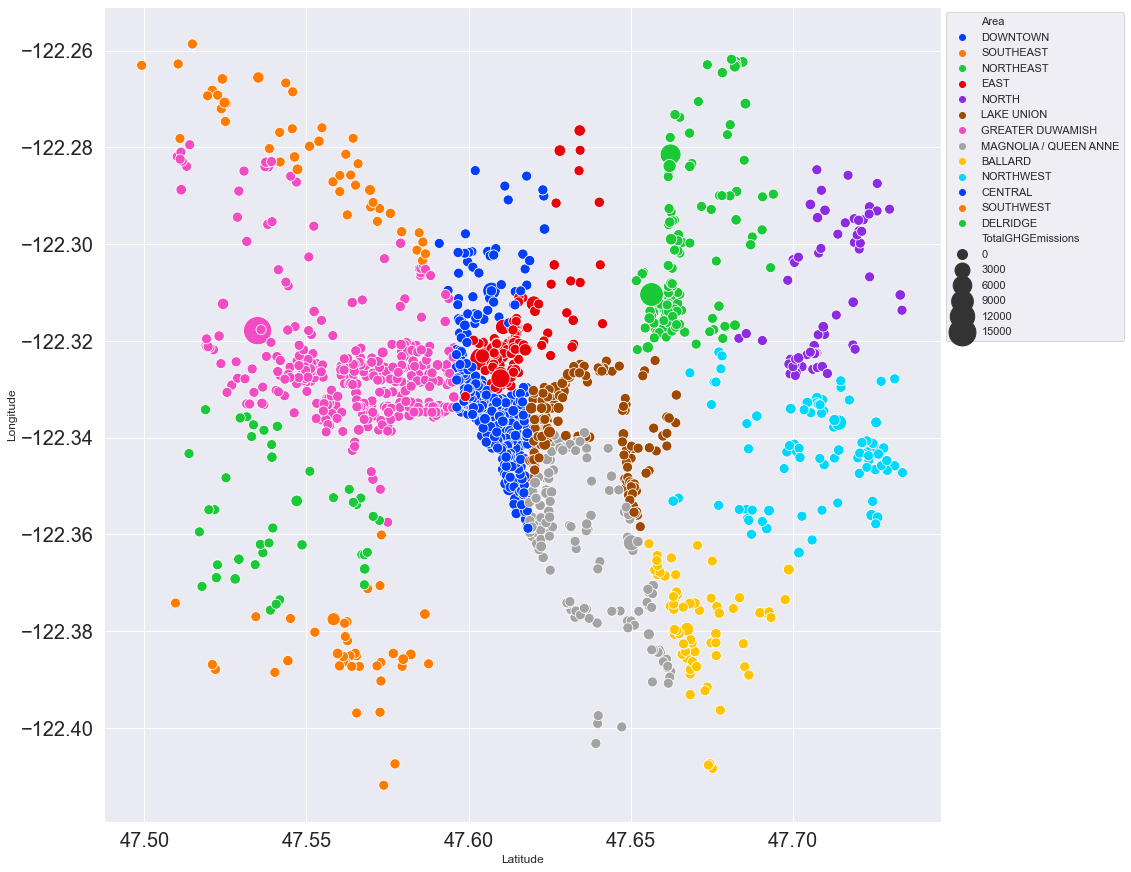

In [130]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(15, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
ax = sns.scatterplot(data=buildingnr, x="Latitude", y="Longitude", hue="Area", palette="bright", 
                size='TotalGHGEmissions', sizes=(100, 800) )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

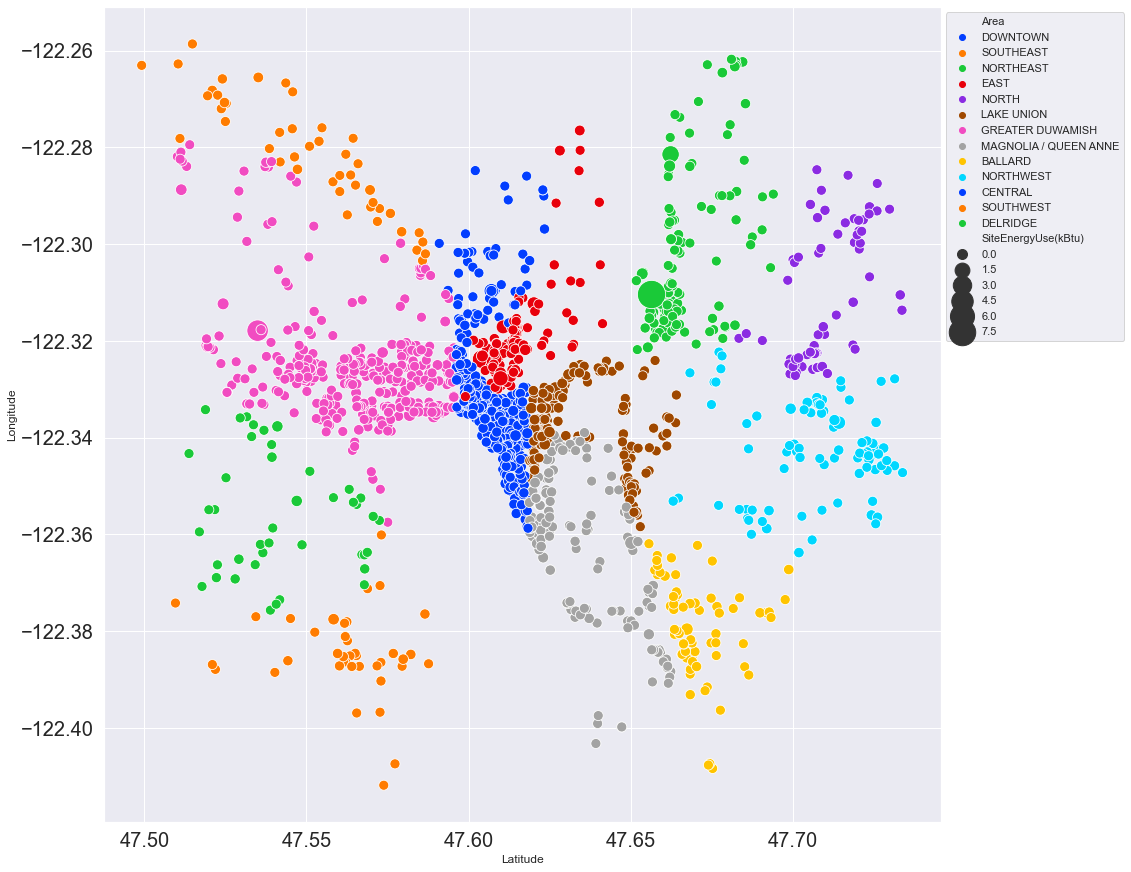

In [131]:
sns.set(font_scale=14)
sns.set(rc={"figure.figsize":(15, 15)}) #width, #height=
plt.tick_params(axis='both', which='major', labelsize=20)
ax=sns.scatterplot(data=buildingnr, x="Latitude", y="Longitude", hue="Area", palette="bright", 
                   size="SiteEnergyUse(kBtu)", sizes=(100, 800) )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Analyse Skewness et passage au log

Skewness analysis 

In [132]:
#buildingnr.skew(axis=0, skipna=True, level=None, numeric_only=True).sort_values()
skew= buildingnr[['OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 
                  'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 
                  'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
                  'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
                  'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
                  'TotalGHGEmissions', 'GHGEmissionsIntensity',  'parking%', 'DecBuilt', 'Steam%', 'Electricity%',
                  'NaturalGas%',
                  'LPU1%', 'LPU2%', 'LPU3%']].skew(axis=0, skipna=True, level=None, numeric_only=True).sort_values()


C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


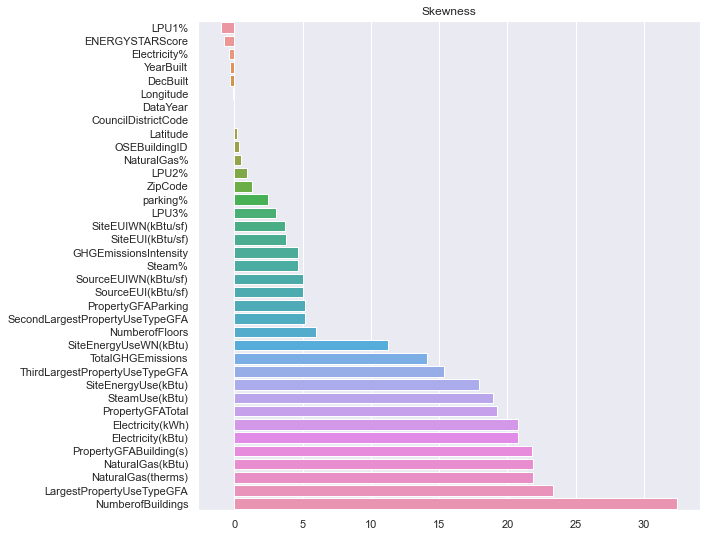

In [133]:
sns.set_style('darkgrid')
sns.set_color_codes(palette='dark')

# Setting plot area
f, ax = plt.subplots(figsize=(9, 9))

# plotting the distribution plot

sns.barplot( skew.values, skew.index,orient = 'h')
#sns.histplot(np.log(buildingnr['SiteEUI(kBtu/sf)']), color="m")
ax.set(title="Skewness")
plt.show()

Analyse log des variable numérique

In [134]:
colonnes_log = [ 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 
'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'parking%', 
'DecBuilt', 'Steam%', 'Electricity%', 'NaturalGas%', 'LPU1%', 'LPU2%', 'LPU3%']

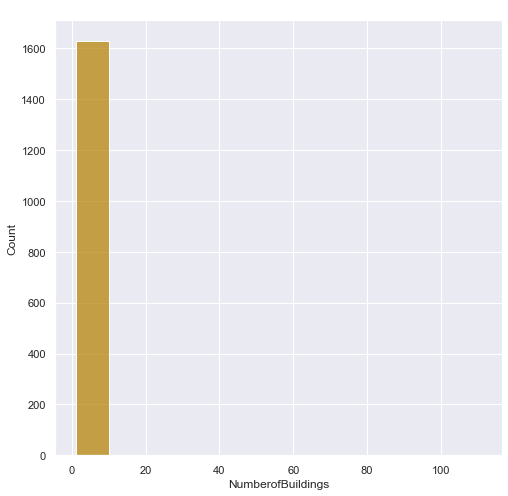

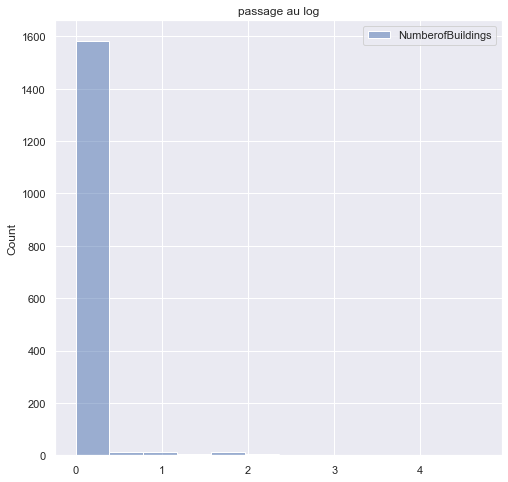

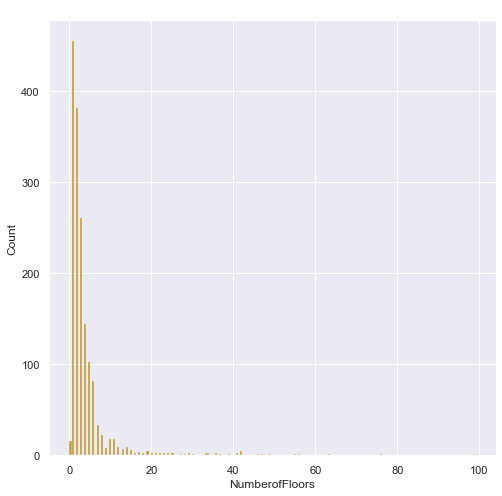

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


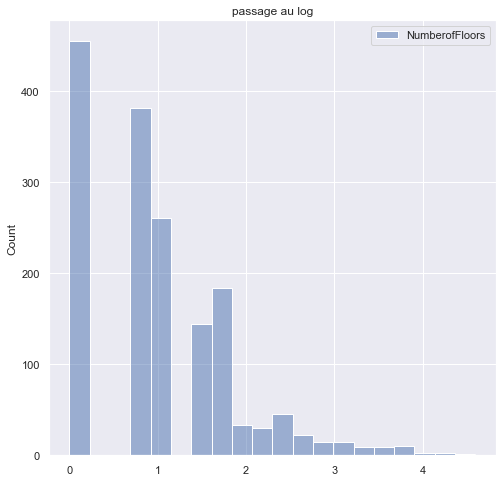

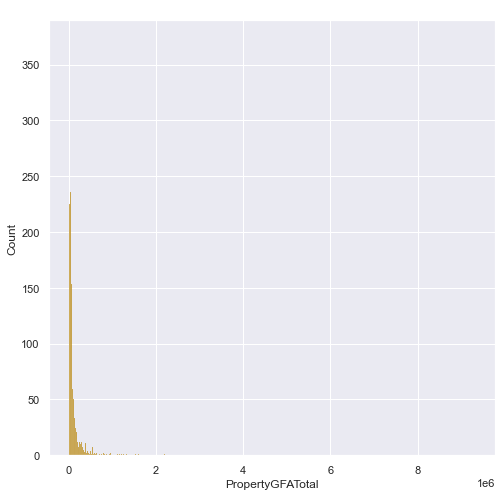

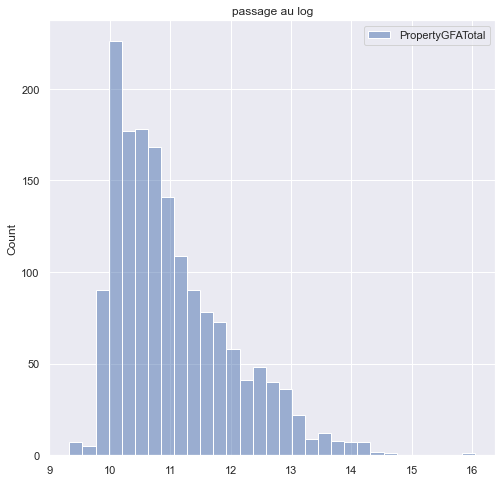

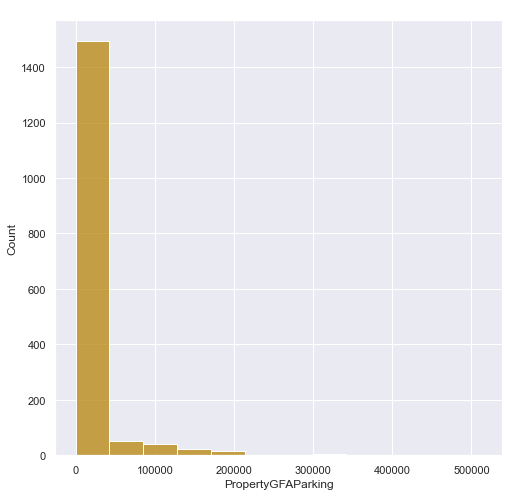

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


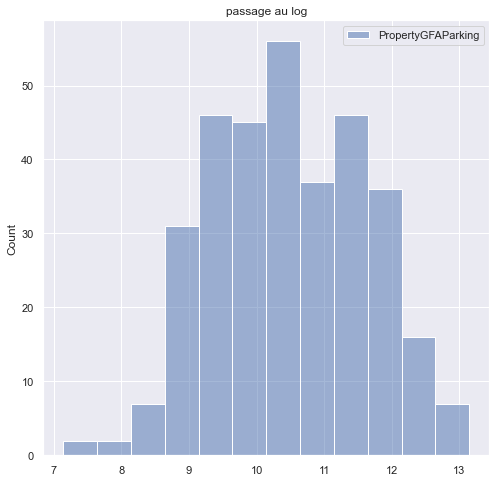

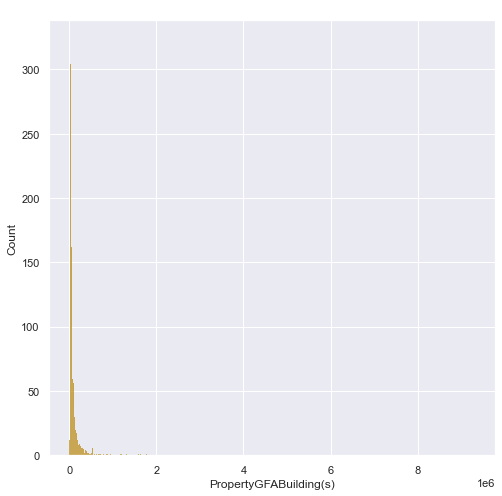

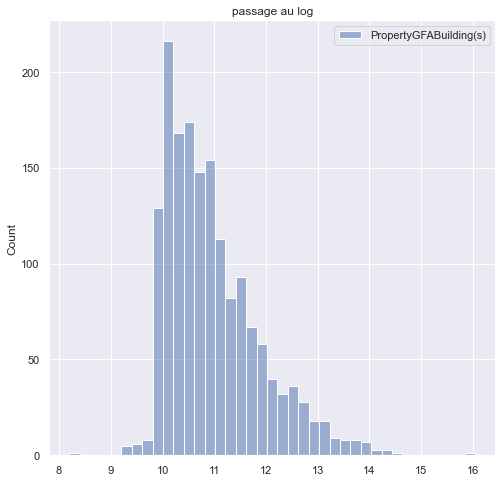

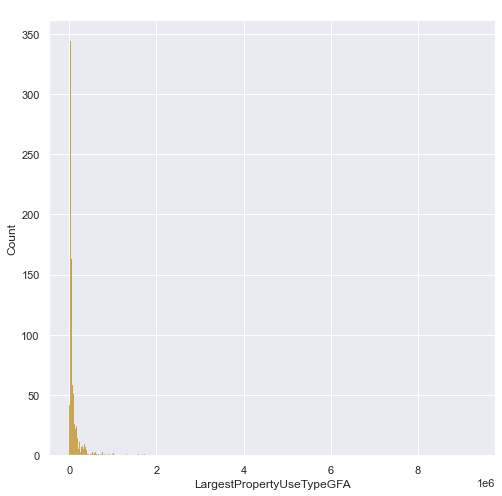

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


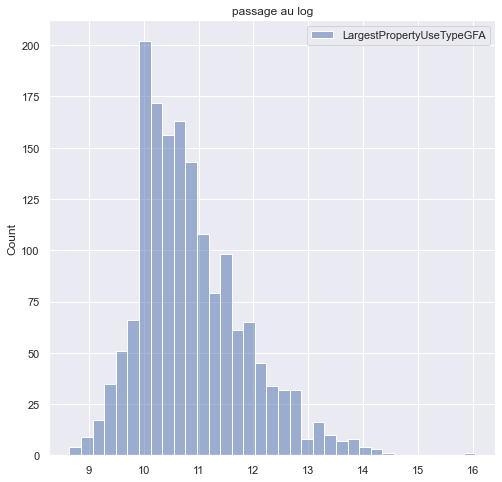

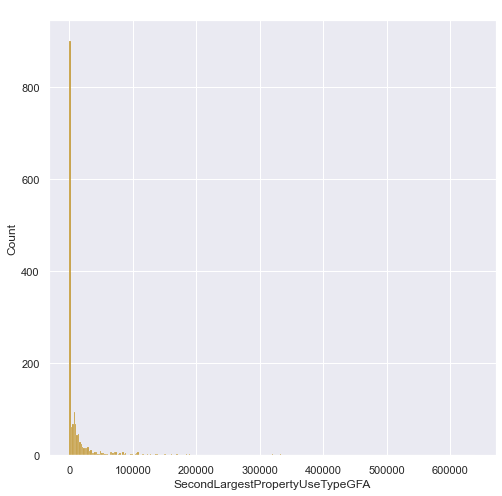

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


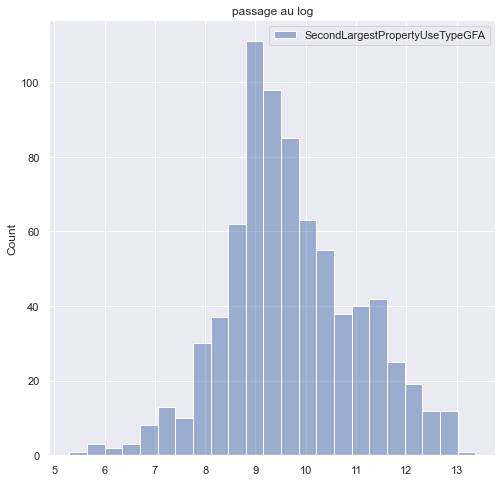

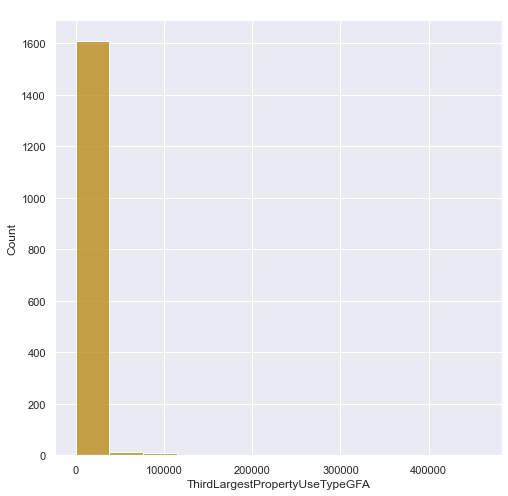

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


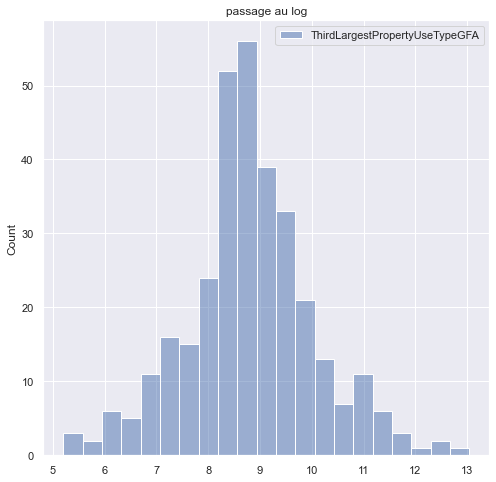

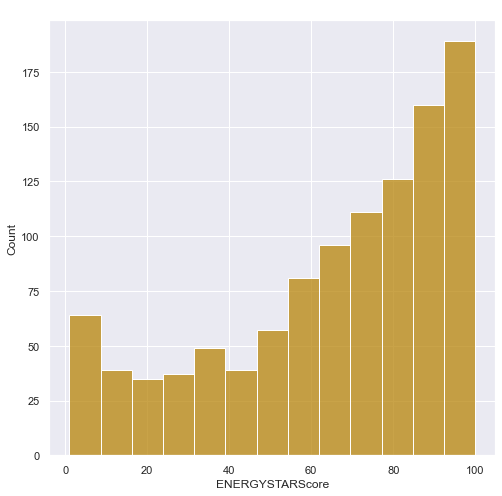

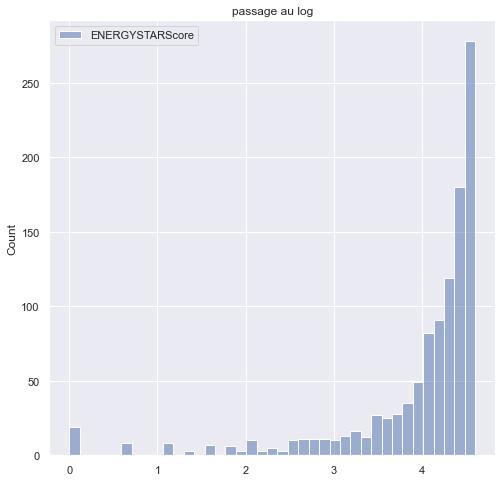

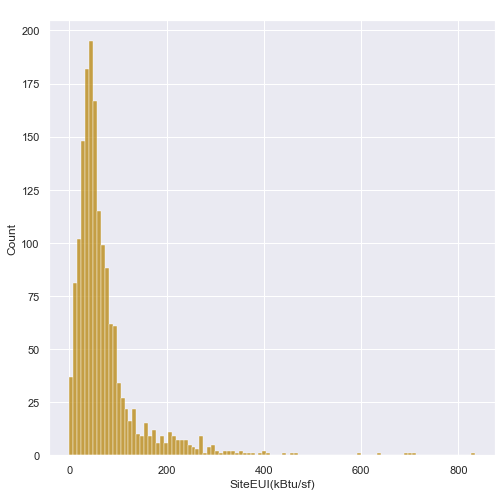

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


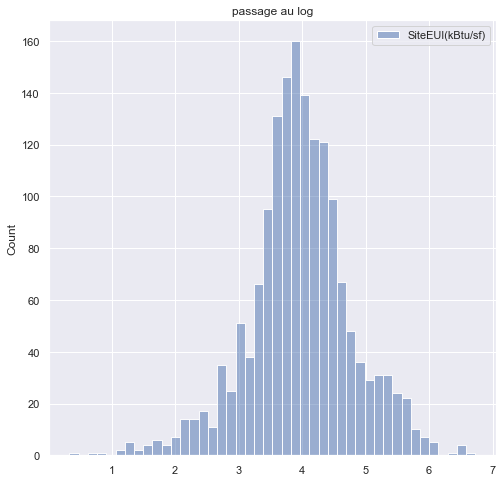

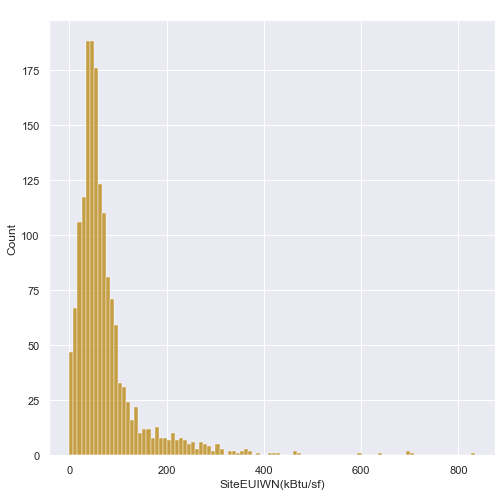

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


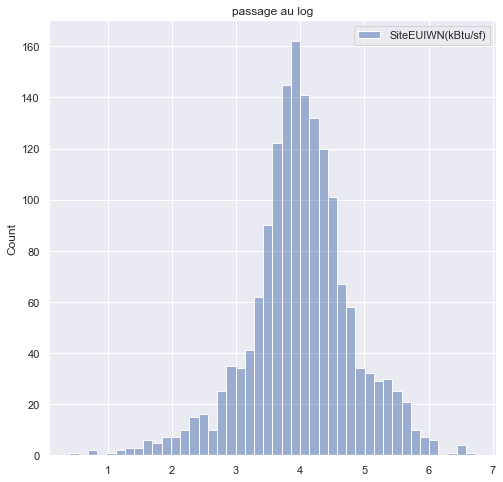

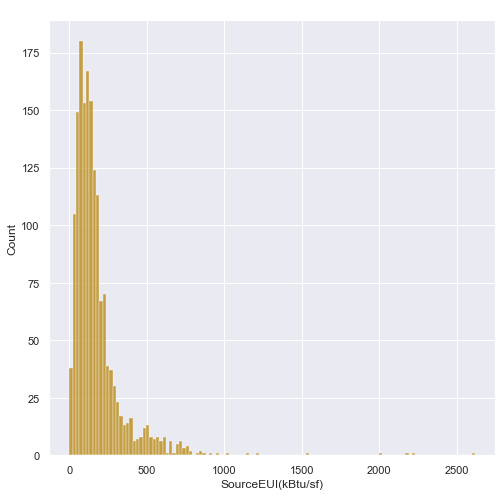

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


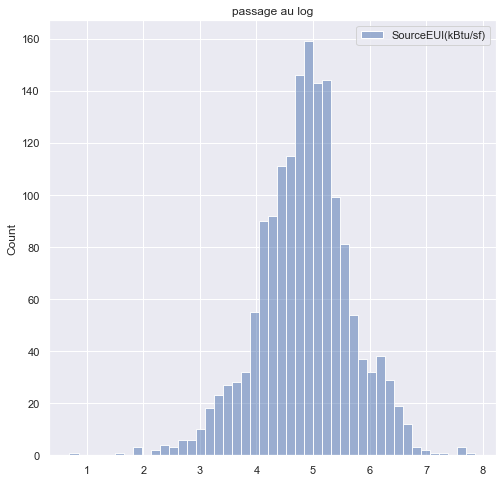

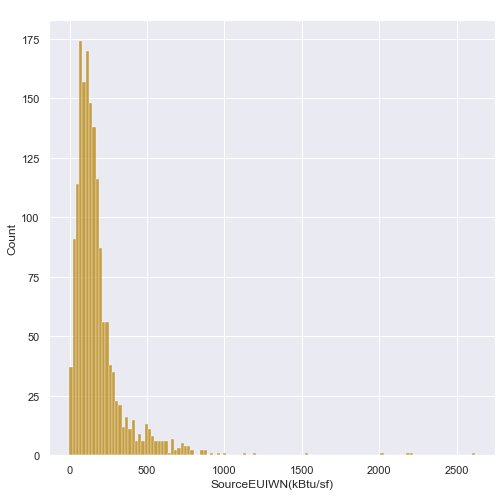

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


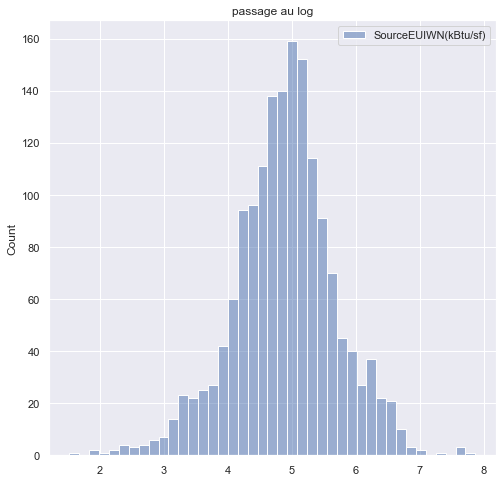

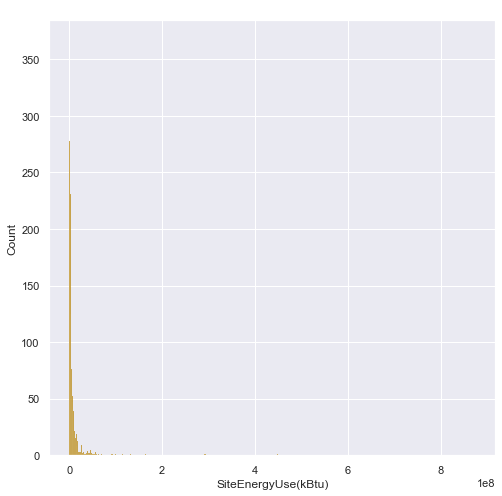

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


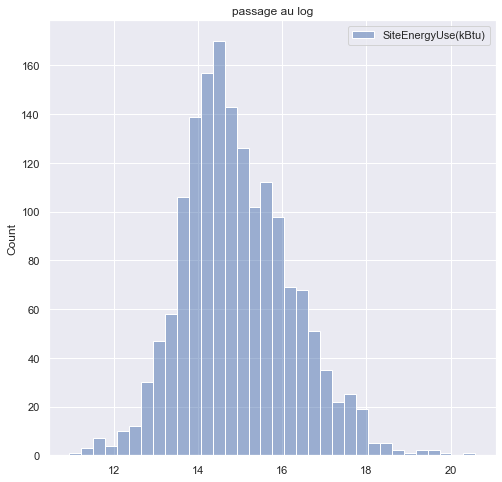

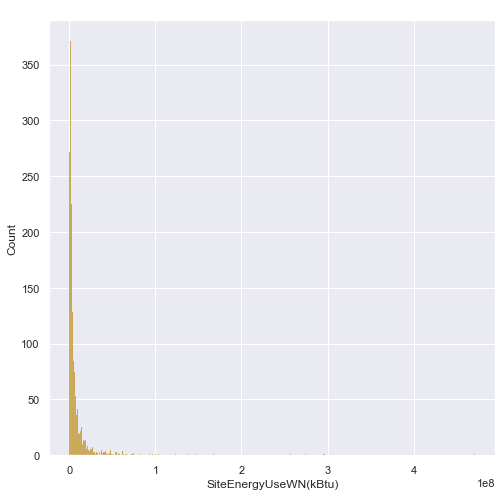

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


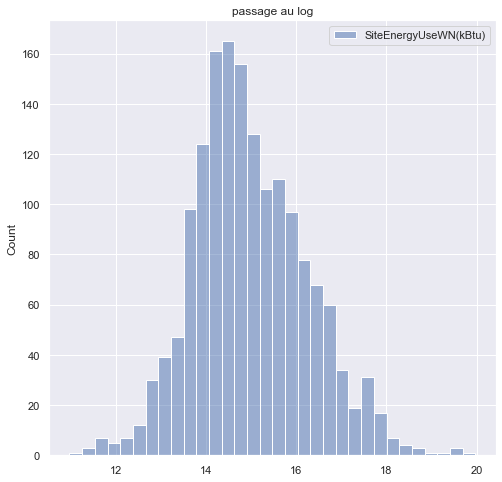

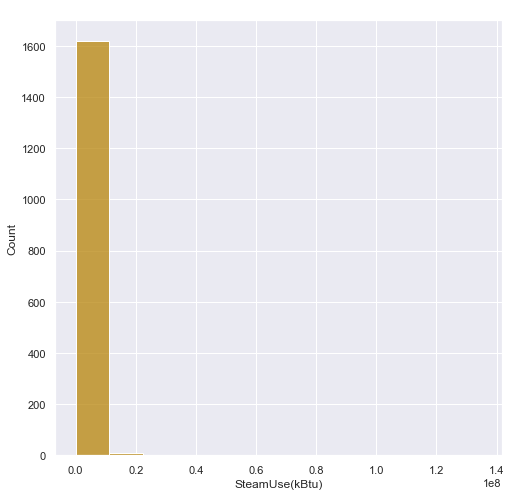

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


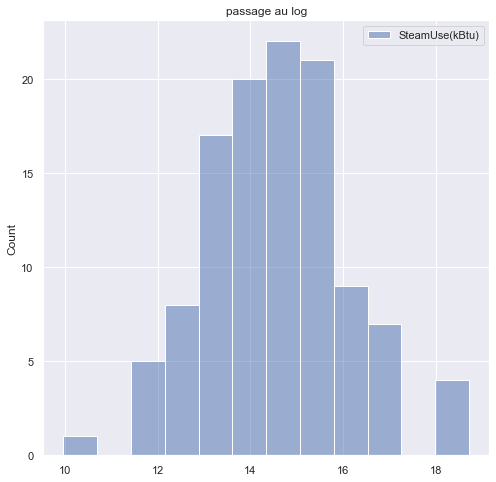

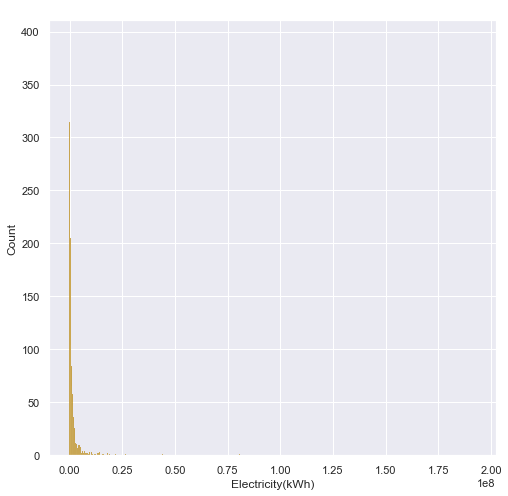

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


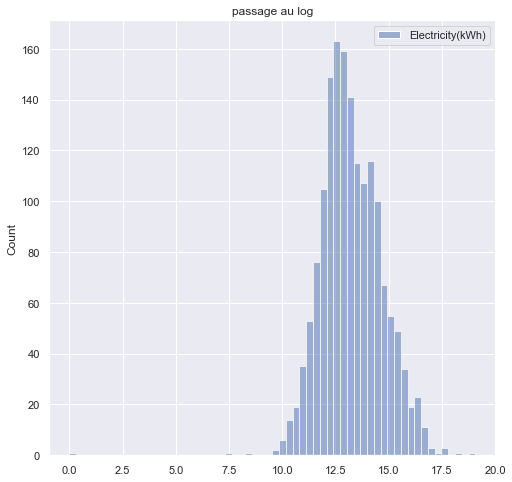

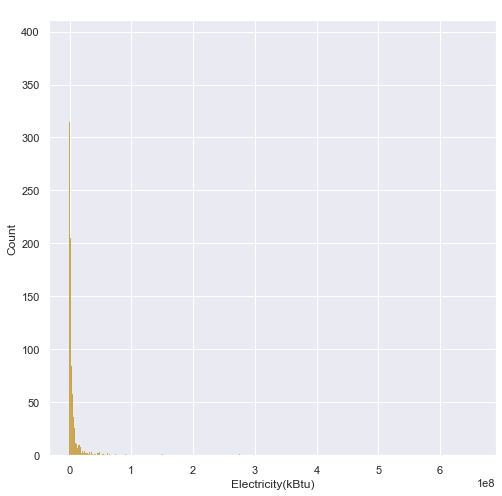

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


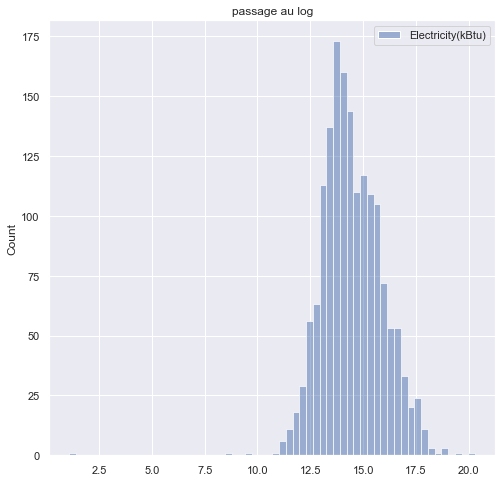

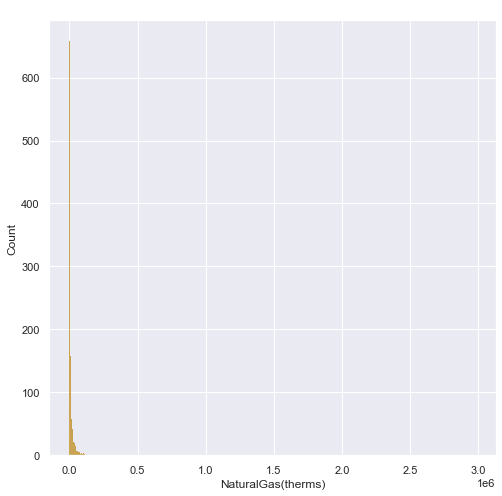

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


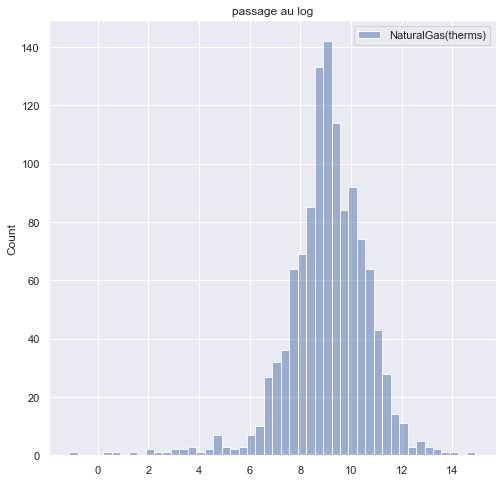

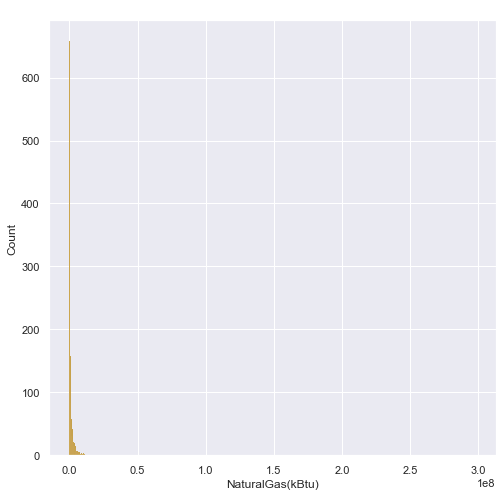

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


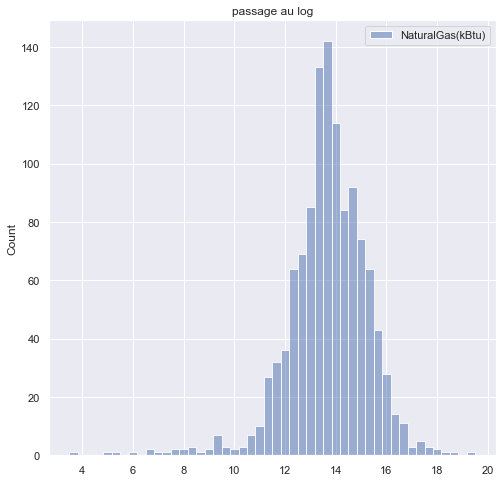

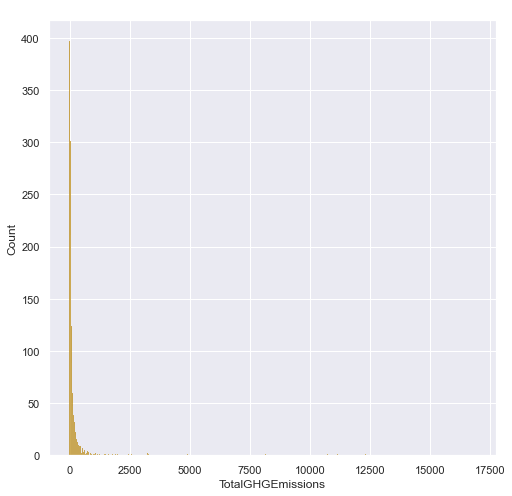

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


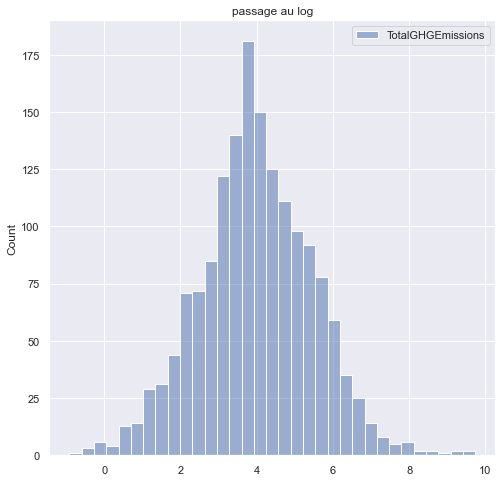

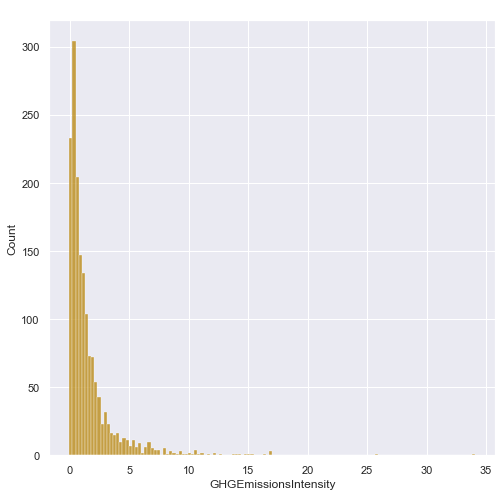

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


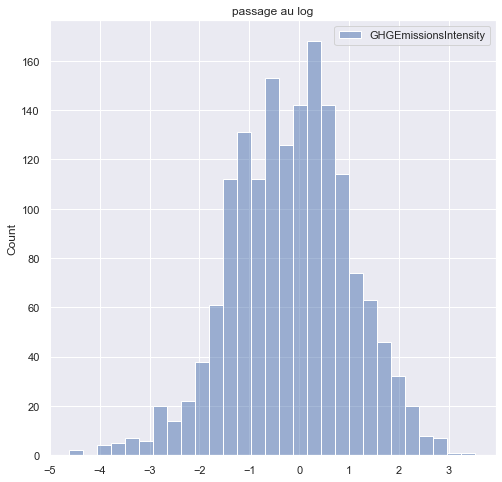

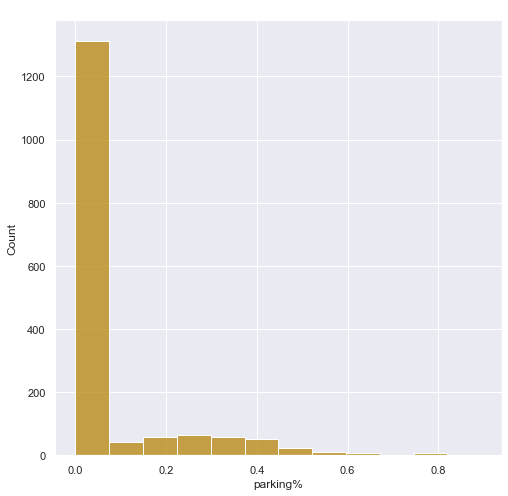

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


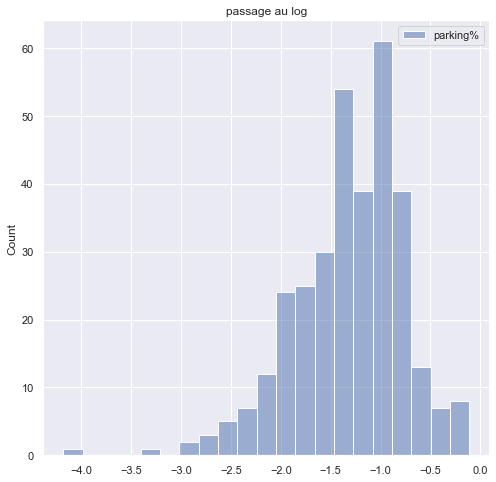

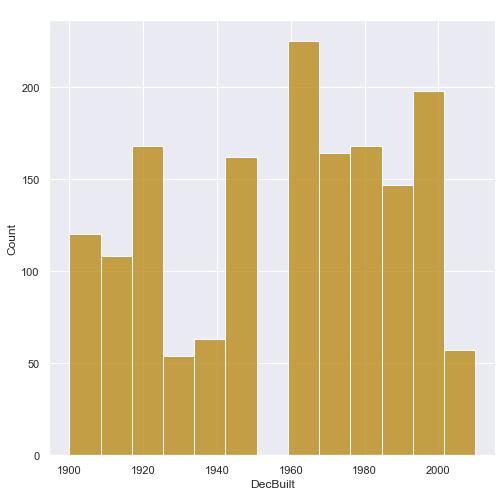

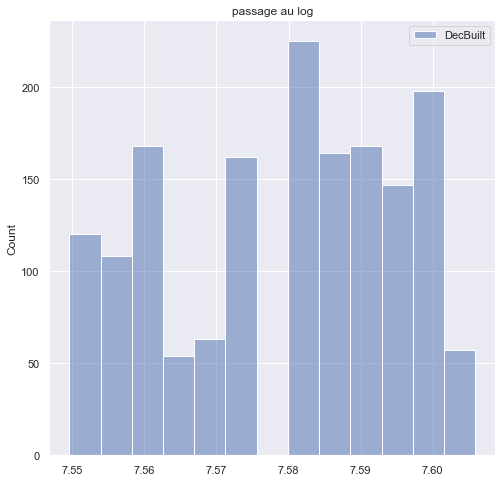

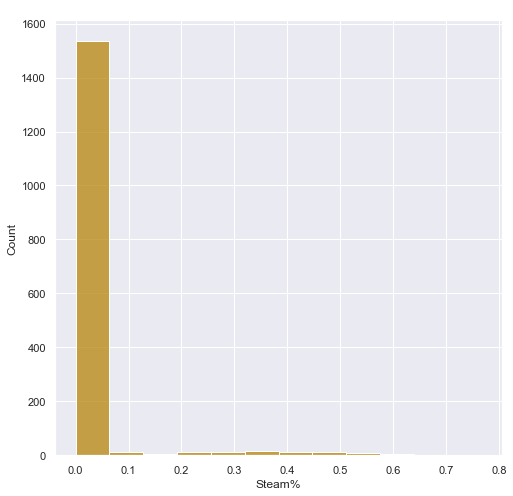

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


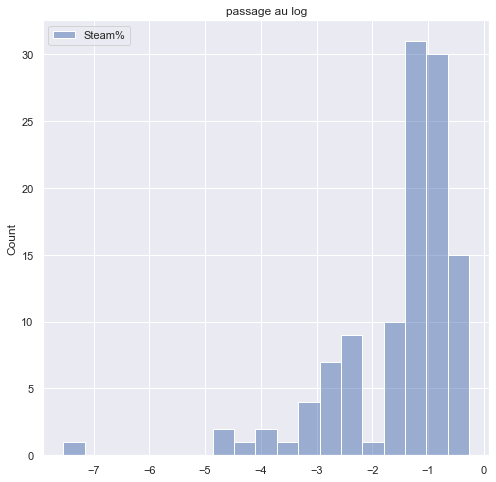

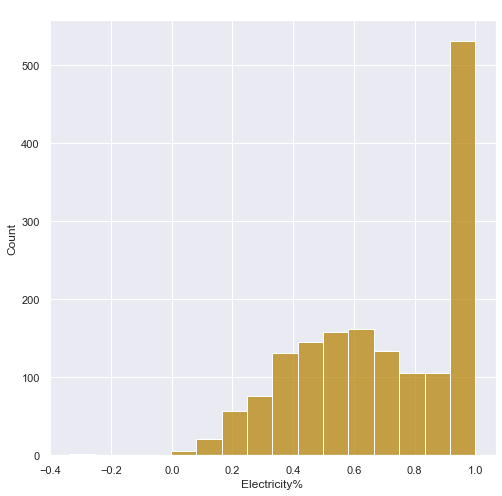

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


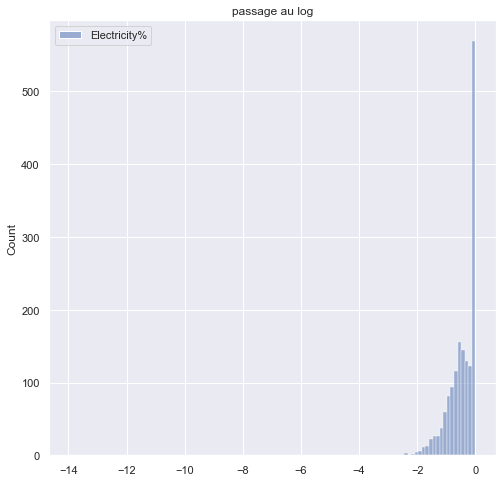

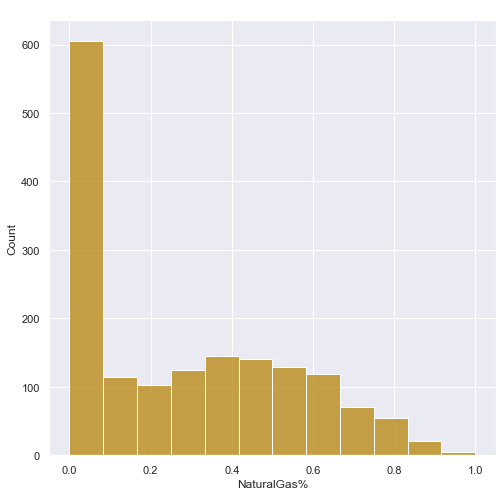

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


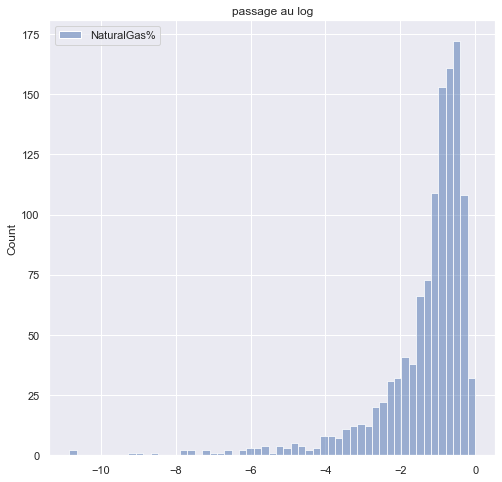

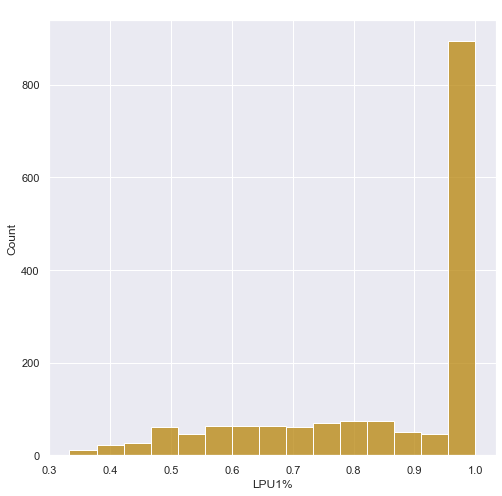

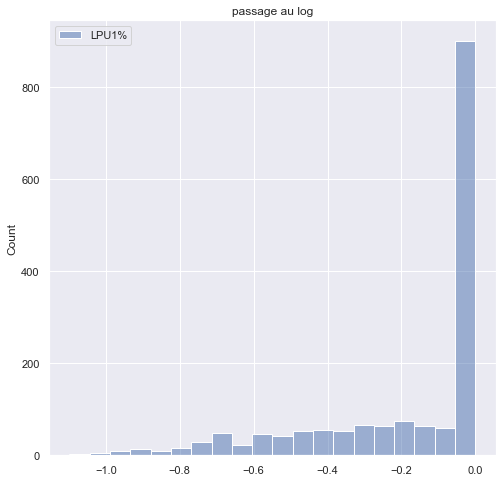

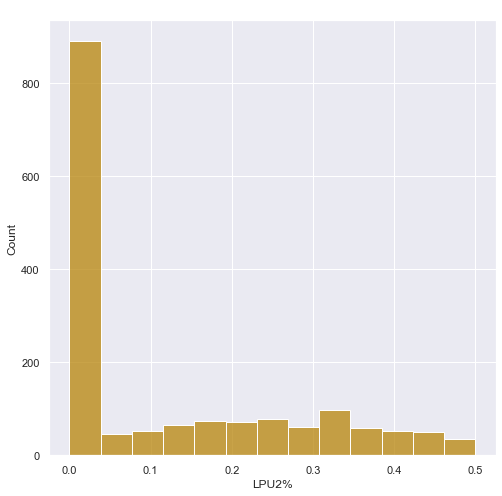

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


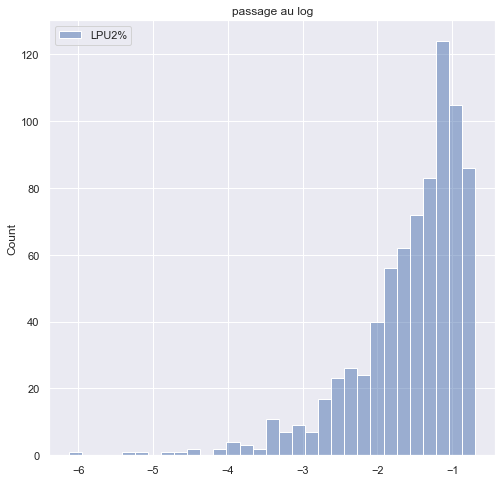

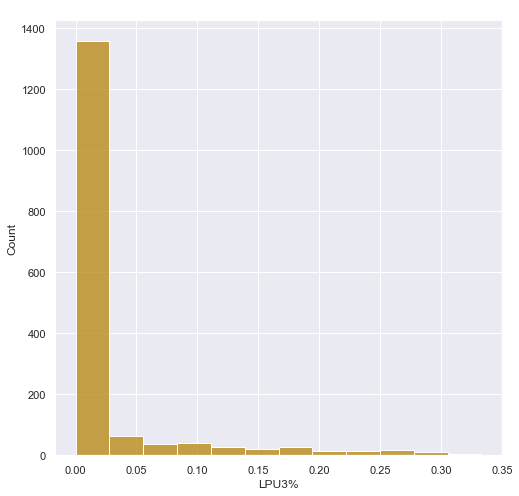

C:\Users\Hugues\AppData\Roaming\Python\Python310\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


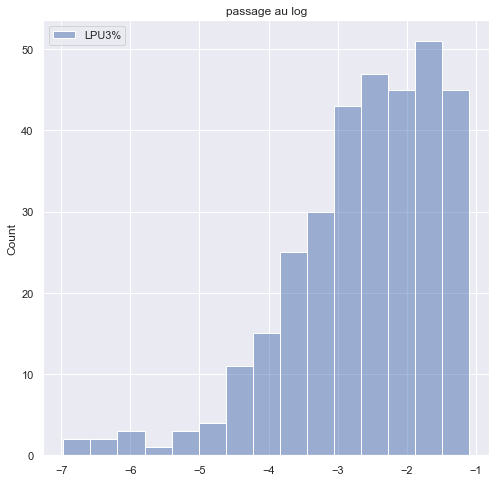

In [135]:
sns.set_style('darkgrid')
sns.set_color_codes(palette='dark')
  
for col in colonnes_log : 

# plotting the distribution plot
  
    f, ax = plt.subplots(figsize=(8,8))
    sns.histplot((buildingnr[col]), color="y").set( title=" ")
    plt.show()
    
    f, ax = plt.subplots(figsize=(8,8))
    sns.histplot(np.log(buildingnr[[col]]), color="m").set( title="passage au log")
    plt.show()

Passer au log les features X 

In [ ]:
colonnes = ['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','TotalGHGEmissions',
            'GHGEmissionsIntensity','parking%','Steam%','Electricity%','NaturalGas%','SiteEnergyUse(kBtu)']

buildingnr[colonnes]

for col in colonnes :
    nom= "log_"+col
    buildingnr[nom] =  np.log(buildingnr[col])*np.isfinite(np.log(buildingnr[col]))


buildingnr['eui_log']= np.log(buildingnr['SiteEUI(kBtu/sf)'])

matrice de correlation

<AxesSubplot:>

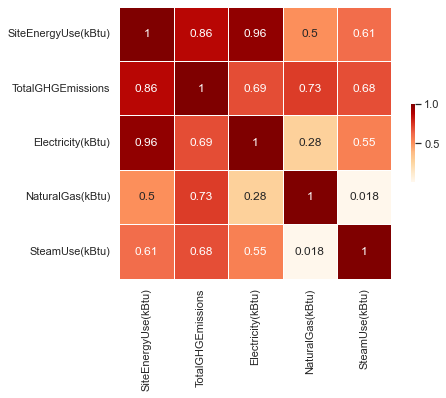

In [137]:
corr_mat = buildingnr[['SiteEnergyUse(kBtu)','TotalGHGEmissions','Electricity(kBtu)','NaturalGas(kBtu)',
                       'SteamUse(kBtu)']].corr()

# Set plot size
plt.subplots(figsize=(7,5))

# Plot heatmap
sns.heatmap(corr_mat, 
            square=True, 
            robust=True, 
            annot = True,
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1) # space between cells


#On observe des corrélations trés forte entre Electricité et l'énergie consommée 
# ainsi qu'entre les émissions de GES les consommations d'énergie

<AxesSubplot:>

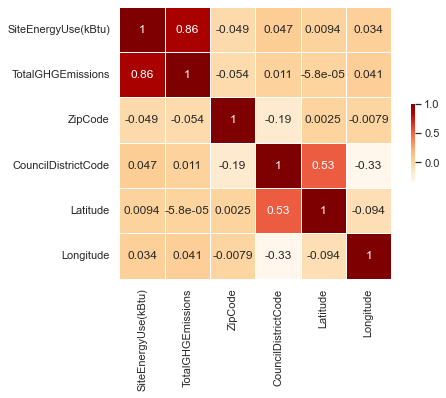

In [138]:


corr_mat = buildingnr[['SiteEnergyUse(kBtu)','TotalGHGEmissions','ZipCode','CouncilDistrictCode','Neighborhood','Latitude','Longitude']].corr()

# Set plot size
plt.subplots(figsize=(7,5))

# Plot heatmap
sns.heatmap(corr_mat, 
            square=True, 
            robust=True, 
            annot = True,
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1) # space between cells
#peu de corrélation géographique 

In [139]:
buildingnr['Neighborhood'].describe()

count         1634
unique          19
top       DOWNTOWN
freq           354
Name: Neighborhood, dtype: object

<AxesSubplot:>

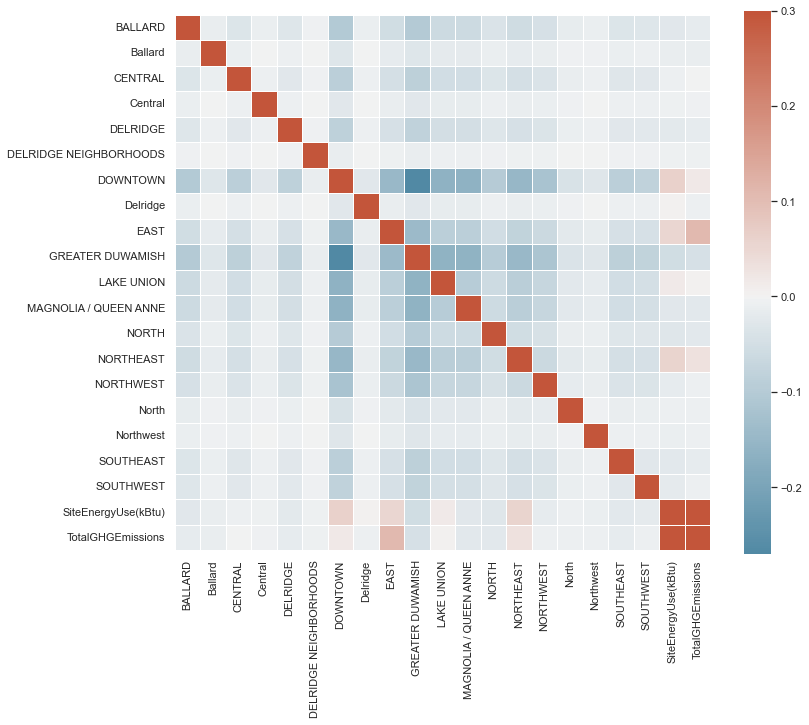

In [140]:
import seaborn as sns
base_dum = pd.get_dummies(buildingnr['Neighborhood']) #récupération de l'information usage en colonne 0 / 1 plutot qu'en Catégorie pour faire tourner régression 
base_dum

corrbase=  pd.concat([base_dum,buildingnr[['SiteEnergyUse(kBtu)','TotalGHGEmissions']]], axis = 1)
corrbase.describe(include= 'all' ) 
corr_mat = corrbase.corr()
# Set plot size
plt.subplots(figsize=(12,20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [141]:
#Pour les données géographique nous pouvons retenir : council district code ( éventuellement latitude a tester pour le no log

<AxesSubplot:>

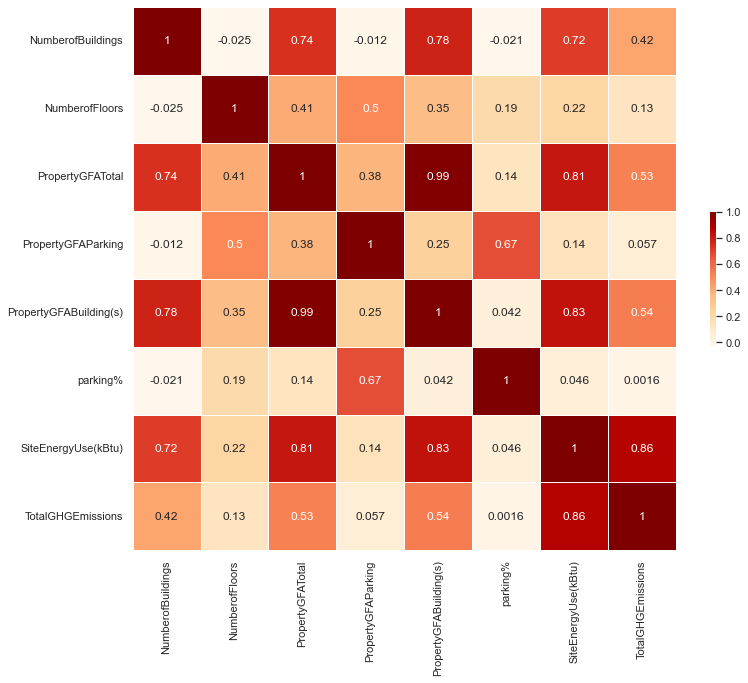

In [142]:

corr_mat = buildingnr[['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking',
                       'PropertyGFABuilding(s)',"parking%",'SiteEnergyUse(kBtu)','TotalGHGEmissions']].corr()


# Set plot size
plt.subplots(figsize=(12,10))

# Plot heatmap
sns.heatmap(corr_mat, 
            square=True, 
            robust=True, 
            annot = True,
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1) # space between cells
#corrélation avec les tailles GFA Building et Total et le nombre de building 

<AxesSubplot:>

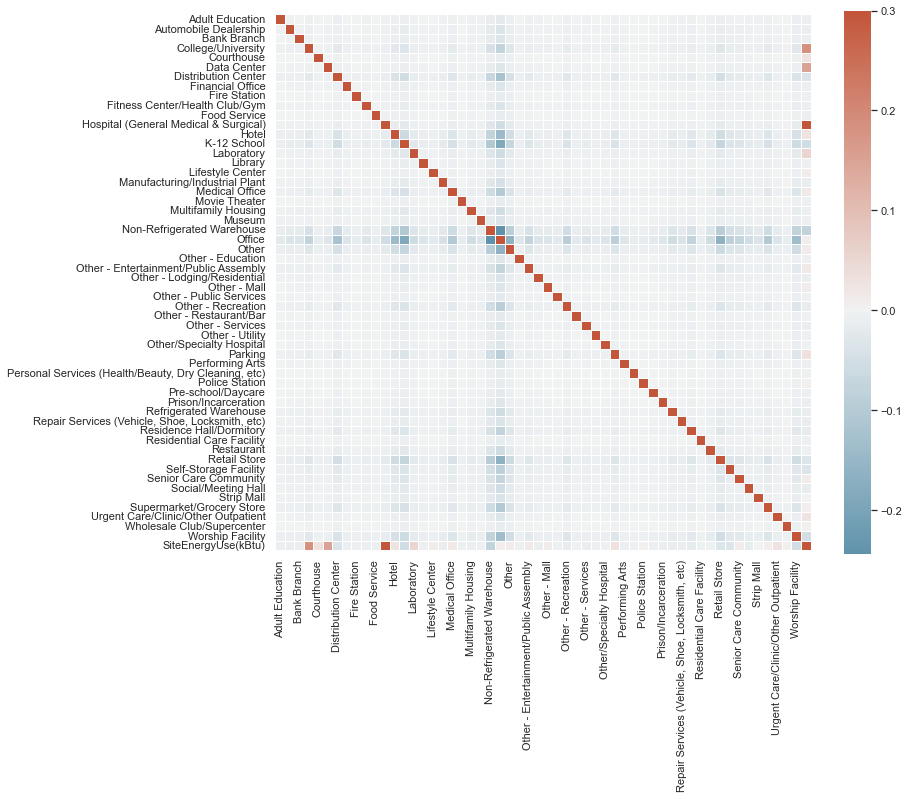

In [143]:
import seaborn as sns
base_dum = pd.get_dummies(buildingnr['LargestPropertyUseType']) #récupération de l'information usage en colonne 0 / 1 plutot qu'en Catégorie pour faire tourner régression 
base_dum

corrbase=  pd.concat([base_dum,buildingnr[['SiteEnergyUse(kBtu)']]], axis = 1)
corrbase.describe(include= 'all' ) 
corr_mat = corrbase.corr()

plt.subplots(figsize=(12,20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr_mat, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



<AxesSubplot:>

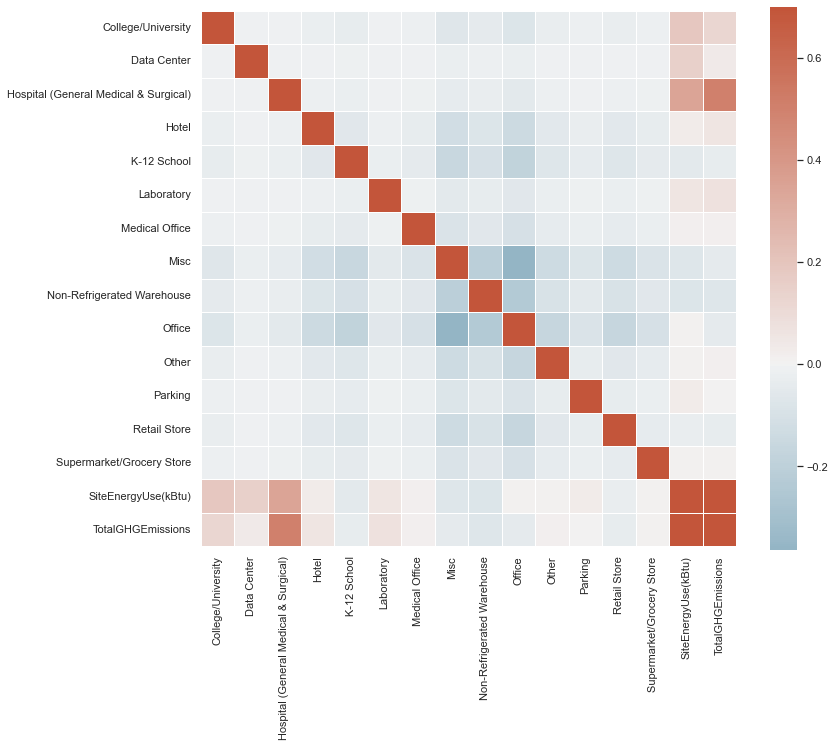

In [144]:
import seaborn as sns
base_dum = pd.get_dummies(buildingnr['LargestUse']) 

corrbase=  pd.concat([base_dum,buildingnr[['SiteEnergyUse(kBtu)','TotalGHGEmissions']]], axis = 1)
corrbase.describe(include= 'all' ) 
corr_mat = corrbase.corr()

plt.subplots(figsize=(12,20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr_mat, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#quelques corrélation avec Hospital, CollegeUniversity  et DataCenter 

CHI2 contingency analyse

In [145]:
colonnes = buildingnr.select_dtypes(include= 'object').columns.tolist()
for col in colonnes : 
    mask = buildingnr[col].isna()
    buildingnr.loc[mask,col]= 'missing'
    
colonnes = buildingnr.select_dtypes(include= 'number').columns.tolist()
for col in colonnes : 
    mask = buildingnr[col].isna()
    buildingnr.loc[mask,col]= 0    
    
    
colonne_to_drop = ['verif_eui','totalenergy','verif_eui/sfwopark','verif_eui/sfcalc','eui/sfwopark','eui/sfcalc',
                   'verifgfausetotal','verifgfausebuilding','usetype_sumSF','verif_eui%'] 
temp= buildingnr.drop(columns =colonne_to_drop)

colonne_to_drop_interdite = ['GHGEmissionsIntensity','TotalGHGEmissions','NaturalGas(kBtu)',
                   'log_TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                    'ENERGYSTARScore','YearsENERGYSTARCertified',
                   'SiteEUIWN(kBtu/sf)','Electricity(kBtu)','SiteEUI(kBtu/sf)','SiteEUI(kBtu/sf)','NaturalGas(therms)',
                     'Electricity(kWh)', 'SteamUse(kBtu)'] 
temp2= temp.drop(columns =colonne_to_drop_interdite)
UseType_to_drop = [col for col in buildingnr.columns.tolist()  if "UseType%" in col]
temp = temp2.drop(UseType_to_drop, axis=1)

Report = pd.DataFrame(columns=['Feature', 'P-value','dof','chi square']) 

colonnes = temp.columns.tolist()
for col in colonnes :
    chi2, p, dof, expected = chi2_contingency((pd.crosstab(temp['log_SiteEnergyUse(kBtu)'], temp[col])))
    Append= pd.DataFrame([[col,p,dof,chi2]],columns=['Feature', 'P-value','dof','chi square'])
    Report = pd.concat([Report,Append])

    
pd.set_option('display.max_rows', 15)   
Report.sort_values(by=['P-value'])


Feature   P-value      dof chi square
0                                OSEBuildingID  0.239705  2666689  2668322.0
0                          SiteEnergyUse(kBtu)  0.239705  2666689  2668322.0
0                      log_SiteEnergyUse(kBtu)  0.239705  2666689  2668322.0
0                                 PropertyName  0.239974  2660157  2661786.0
0                                      Address  0.241124  2632396  2634008.0
..                                         ...       ...      ...        ...
0                                     Comments       1.0        0        0.0
0                           Swimming Pool_eui%       1.0        0        0.0
0                                     DataYear       1.0        0        0.0
0                              Food Sales_GFA%       1.0        0        0.0
0   Convenience Store without Gas Station_GFA%       1.0        0        0.0

[243 rows x 4 columns]

In [146]:
Report[Report['P-value']<5/100].sort_values(by=['P-value'])['Feature'].tolist()
#L’hypothèse nulle est que les variables sont indépendantes. rejetons l’hypothèse nulle au seuil de 5%,pour une pvaleur inférieure à 0.05
#Les plus petites P-value sont supérieurs à 5% nous ne pouvons pas rejeter l'hypothése que les variables sont indépendantes.

[]

In [147]:
colonnes = buildingnr.select_dtypes(include= 'object').columns.tolist()
for col in colonnes : 
    mask = buildingnr[col].isna()
    buildingnr.loc[mask,col]= 'missing'
    
colonnes = buildingnr.select_dtypes(include= 'number').columns.tolist()
for col in colonnes : 
    mask = buildingnr[col].isna()
    buildingnr.loc[mask,col]= 0    
    
    
colonne_to_drop = ['verif_eui','totalenergy','verif_eui/sfwopark','verif_eui/sfcalc','eui/sfwopark','eui/sfcalc',
                   'verifgfausetotal','verifgfausebuilding','usetype_sumSF','verif_eui%'] 
temp= buildingnr.drop(columns =colonne_to_drop)

colonne_to_drop_interdite = ['GHGEmissionsIntensity','eui_log','NaturalGas(kBtu)',
                   'TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                    'ENERGYSTARScore','YearsENERGYSTARCertified',
                   'SiteEUIWN(kBtu/sf)','Electricity(kBtu)','SiteEUI(kBtu/sf)','SiteEUI(kBtu/sf)','NaturalGas(therms)',
                     'Electricity(kWh)','SiteEnergyUse(kBtu)', 'SteamUse(kBtu)'] 
temp2= temp.drop(columns =colonne_to_drop_interdite)
UseType_to_drop = [col for col in buildingnr.columns.tolist()  if "UseType%" in col]
temp = temp2.drop(UseType_to_drop, axis=1)

       


Report = pd.DataFrame(columns=['Feature', 'P-value','dof','chi square']) 


colonnes = temp.columns.tolist()
for col in colonnes :
    chi2, p, dof, expected = chi2_contingency((pd.crosstab(temp['log_TotalGHGEmissions'], temp[col])))
    Append= pd.DataFrame([[col,p,dof,chi2]],columns=['Feature', 'P-value','dof','chi square'])
    Report = pd.concat([Report,Append])

pd.set_option('display.max_rows', 5)    
Report.sort_values(by=['P-value'])

Feature P-value      dof      chi square
0             log_TotalGHGEmissions     0.0  2449225       2557210.0
0                       NaturalGas%     0.0  1843570  1872528.166667
..                              ...     ...      ...             ...
0   Other - Technology/Science_GFA%     1.0        0             0.0
0          Prison/Incarceration_GFA     1.0     4695     3266.998161

[242 rows x 4 columns]

In [148]:
Report[Report['P-value']<5/100].sort_values(by=['P-value'])['Feature'].count()
#132 features ont une P-value inférieures à 5% et sont donc corrélés aux Emissions de GES

132

In [149]:
pd.set_option('display.max_rows', 5)
buildingnr.reset_index().drop(columns='index')

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
1632          50225      2016  Nonresidential COS  Mixed Use Property   
1633          50226      2016  Nonresidential COS  Mixed Use Property   

                     PropertyName           Address     City State  ZipCode  \
0            Mayflower park hotel     405 Olive way  Seattle    WA  98101.0   
1                 Paramount Hotel   724 Pine street  Seattle    WA  98101.0   
...                           ...               ...      ...   ...      ...   
1632  South Park Community Center    8319 8th Ave S  Seattle    WA      0.0   
1633  Van Asselt Community Center  2820 S Myrtle St  Seattle    WA      0.0   

     TaxParcelIdentificationNumber  ...  log_SecondLargestPropertyUseTypeGFA  \
0                       0659000030  ...                             0.000000   
1                       0659000220  ...                             9.620063   
...                            ...  ...                                  ...   
1632                    7883603155  ...                             8.779711   
1633                    7857002030  ...                             8.987197   

     log_ThirdLargestPropertyUseTypeGFA  log_TotalGHGEmissions  \
0                              0.000000               5.521381   
1                              8.438583               5.689886   
...                                 ...                    ...   
1632                           6.182085               3.096030   
1633                           7.010312               3.720136   

      log_GHGEmissionsIntensity  log_parking%  log_Steam%  log_Electricity%  \
0                      1.040277      0.000000   -1.282649         -0.605027   
1                      1.050822     -1.927901    0.000000         -0.950341   
...                         ...           ...         ...               ...   
1632                   0.451076      0.000000    0.000000         -0.723817   
1633                   0.815365      0.000000    0.000000         -0.980325   

      log_NaturalGas%  log_SiteEnergyUse(kBtu)   eui_log  
0           -1.733651                15.793246  4.403054  
1           -0.488753                15.942305  4.551769  
...               ...                      ...       ...  
1632        -0.663390                13.486272  3.931826  
1633        -0.470306                13.957788  4.144721  

[1634 rows x 409 columns]

Export buildingnr pour selectionner les features et effectuer les analyses

In [150]:
buildingnr.reset_index().drop(columns='index').to_csv("buildingnr.csv")